# Busqueda de huellas
En este código intentaremos buscar los patrones que constituyen las huellas pertenecientes a cada electrodomestico de cada
casa, es vital guardar la huella, el tiempo en que se encendio el dispositivo y cuanto duro en estado estable.

In [26]:
#Cargar los datos
#Librerias 
#Cargar las librerias para procesar los datos
import os
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline
import time
from tensorflow import keras
from tensorflow.keras import layers
import scipy
import statsmodels
import sklearn
import seaborn as sns

In [2]:
#Ruta de la carpeta base
wdirectory = os.getcwd()
wdirectory = wdirectory + '\low_freq'
print(f'{wdirectory}')
list_dir = os.listdir(wdirectory)
print(list_dir)

C:\Users\josel\SmartMeter\OrdenandoTodo\low_freq
['house_1', 'house_2', 'house_3', 'house_4', 'house_5', 'house_6']


In [3]:
#Casas en low_freq
casas = [casa for casa in list_dir if casa.find('house_', 0, len(casa)) != -1]
print(casas)

['house_1', 'house_2', 'house_3', 'house_4', 'house_5', 'house_6']


In [4]:
#Guardar direcciones de cada casa
dir_casas = [os.path.join(wdirectory, casa) for casa in casas]
print(dir_casas)

['C:\\Users\\josel\\SmartMeter\\OrdenandoTodo\\low_freq\\house_1', 'C:\\Users\\josel\\SmartMeter\\OrdenandoTodo\\low_freq\\house_2', 'C:\\Users\\josel\\SmartMeter\\OrdenandoTodo\\low_freq\\house_3', 'C:\\Users\\josel\\SmartMeter\\OrdenandoTodo\\low_freq\\house_4', 'C:\\Users\\josel\\SmartMeter\\OrdenandoTodo\\low_freq\\house_5', 'C:\\Users\\josel\\SmartMeter\\OrdenandoTodo\\low_freq\\house_6']


In [5]:
#Guardar ruta de direcciones de los dispositivos chanel de cada casa
def directorio_dispositivos(casa):
    #Direccion de casa
    list_devices = os.listdir(dir_casas[casa-1])
    max = len(list_devices)
    dir_devices = [os.path.join(dir_casas[casa-1], "channel_"+str(i) + ".dat") for i in range(1,max)]
    return dir_devices

In [6]:
#Listas con direcciones de dispositivos por cada casa
casa_1 = directorio_dispositivos(1)
casa_2 = directorio_dispositivos(2)
casa_3 = directorio_dispositivos(3)
casa_4 = directorio_dispositivos(4)
casa_5 = directorio_dispositivos(5)
casa_6 = directorio_dispositivos(6)

In [7]:
def imprimir_rutas(directorio):
    i = 0
    for dispositivo in directorio:
        i += 1
        print(dispositivo)
    print(f'Dispositivos totales {i} \n')
print("House_1")
imprimir_rutas(casa_1)
'''
print("House_2\n")
imprimir_rutas(casa_2)
print("House_3\n")
imprimir_rutas(casa_3)
print("House_4\n")
imprimir_rutas(casa_4)
print("House_5\n")
imprimir_rutas(casa_5)
'''

House_1
C:\Users\josel\SmartMeter\OrdenandoTodo\low_freq\house_1\channel_1.dat
C:\Users\josel\SmartMeter\OrdenandoTodo\low_freq\house_1\channel_2.dat
C:\Users\josel\SmartMeter\OrdenandoTodo\low_freq\house_1\channel_3.dat
C:\Users\josel\SmartMeter\OrdenandoTodo\low_freq\house_1\channel_4.dat
C:\Users\josel\SmartMeter\OrdenandoTodo\low_freq\house_1\channel_5.dat
C:\Users\josel\SmartMeter\OrdenandoTodo\low_freq\house_1\channel_6.dat
C:\Users\josel\SmartMeter\OrdenandoTodo\low_freq\house_1\channel_7.dat
C:\Users\josel\SmartMeter\OrdenandoTodo\low_freq\house_1\channel_8.dat
C:\Users\josel\SmartMeter\OrdenandoTodo\low_freq\house_1\channel_9.dat
C:\Users\josel\SmartMeter\OrdenandoTodo\low_freq\house_1\channel_10.dat
C:\Users\josel\SmartMeter\OrdenandoTodo\low_freq\house_1\channel_11.dat
C:\Users\josel\SmartMeter\OrdenandoTodo\low_freq\house_1\channel_12.dat
C:\Users\josel\SmartMeter\OrdenandoTodo\low_freq\house_1\channel_13.dat
C:\Users\josel\SmartMeter\OrdenandoTodo\low_freq\house_1\channel_

'\nprint("House_2\n")\nimprimir_rutas(casa_2)\nprint("House_3\n")\nimprimir_rutas(casa_3)\nprint("House_4\n")\nimprimir_rutas(casa_4)\nprint("House_5\n")\nimprimir_rutas(casa_5)\n'

In [8]:
#Extraccion de nombres de etiquetas de dipositivo por cada casa
def nombre_dispositivos(casa):
    #directorio de la casa con etiquetas
    dir_casa = dir_casas[casa-1] + "\\labels.dat"    
    #Diccionario con nombres dispositivos
    label = {}
    #Carga el directorio
    with open(dir_casa) as f:
        #Lee el archivo
        for line in f:
            #Separo las palabras mediante espacios quedando indice y nombre
            splitted_line = line.split(' ')
            #Guarda las palabras encontradas usando el indice como key y el nombre como value
            label[int(splitted_line[0])] = splitted_line[1].strip() + '_' + splitted_line[0]
    #Retorna el diccionario con las etiquetas
    return label

In [9]:
labels_casa_1 = nombre_dispositivos(1)
labels_casa_2 = nombre_dispositivos(2)
labels_casa_3 = nombre_dispositivos(3)
labels_casa_4 = nombre_dispositivos(4)
labels_casa_5 = nombre_dispositivos(5)
labels_casa_6 = nombre_dispositivos(6)

In [10]:
print('Casa 1\n')
print(labels_casa_1)
print(f'\nCasa 2\n')
print(labels_casa_2)
print(f'\nCasa 3\n')
print(labels_casa_3)
print(f'\nCasa 4\n')
print(labels_casa_4)
print(f'\nCasa 5\n')
print(labels_casa_5)

Casa 1

{1: 'mains_1', 2: 'mains_2', 3: 'oven_3', 4: 'oven_4', 5: 'refrigerator_5', 6: 'dishwaser_6', 7: 'kitchen_outlets_7', 8: 'kitchen_outlets_8', 9: 'lighting_9', 10: 'washer_dryer_10', 11: 'microwave_11', 12: 'bathroom_gfi_12', 13: 'electric_heat_13', 14: 'stove_14', 15: 'kitchen_outlets_15', 16: 'kitchen_outlets_16', 17: 'lighting_17', 18: 'lighting_18', 19: 'washer_dryer_19', 20: 'washer_dryer_20'}

Casa 2

{1: 'mains_1', 2: 'mains_2', 3: 'kitchen_outlets_3', 4: 'lighting_4', 5: 'stove_5', 6: 'microwave_6', 7: 'washer_dryer_7', 8: 'kitchen_outlets_8', 9: 'refrigerator_9', 10: 'dishwaser_10', 11: 'disposal_11'}

Casa 3

{1: 'mains_1', 2: 'mains_2', 3: 'outlets_unknown_3', 4: 'outlets_unknown_4', 5: 'lighting_5', 6: 'electronics_6', 7: 'refrigerator_7', 8: 'disposal_8', 9: 'dishwaser_9', 10: 'furance_10', 11: 'lighting_11', 12: 'outlets_unknown_12', 13: 'washer_dryer_13', 14: 'washer_dryer_14', 15: 'lighting_15', 16: 'microwave_16', 17: 'lighting_17', 18: 'smoke_alarms_18', 19: 'l

## Función huellas para detectar cambios de estado on off

In [156]:
def huellas(df, label, impulso, caida = 20):
    on_off = []
    bandera_inicio = False
    potencia = df[label]
    for i in range(len(df[label])-1):
        a = 10
        if i > len(df)-10 or i - 10 <= 0:
            a = 0
        if type(i) != 'int':
            i = int(i)
        if i +10 > len(df[label]):
            break
        if df.loc[i,label] > impulso and bandera_inicio == False:
            inicio = i - a
            bandera_inicio = True
        if df.loc[i,label] <= caida and bandera_inicio == True:
            fin = i + a
            bandera_inicio = False
            on_off.append([inicio, fin, df.loc[inicio, 'UTC_Unix'], df.loc[fin, 'UTC_Unix']])
    return on_off

## Función para graficar la huella encontrada en la potencia

In [149]:
def graficar_huella(df, huella, index):
    #label = df.columns
    #datos = df.loc[huella[index][0]:huella[index][1],:]
    datos = df.loc[huella[index][0]:huella[index][1],:]
    label = datos.columns[1]
    print(datos.columns[1])
    #Grafica tiempo vs potencia
    plt.figure(figsize=(18, 6), dpi=80)
    plt.plot(datos['UTC_Unix'], datos[label])
    plt.title(label)
    plt.show()

### Archivos por cada casa
**Casa 1:**

In [150]:
#Carga de los datos por cada casa
dispositivo_H1L1 = pd.read_csv(casa_1[0], sep=r' ', encoding='utf-8', names=['UTC_Unix',labels_casa_1[1]], header=None)
dispositivo_H1L2 = pd.read_csv(casa_1[1], sep=r' ', encoding='utf-8', names=['UTC_Unix',labels_casa_1[2]], header=None)
dispositivo_H1L3 = pd.read_csv(casa_1[2], sep=r' ', encoding='utf-8', names=['UTC_Unix',labels_casa_1[3]], header=None)
dispositivo_H1L4 = pd.read_csv(casa_1[3], sep=r' ', encoding='utf-8', names=['UTC_Unix',labels_casa_1[4]], header=None)
dispositivo_H1L5 = pd.read_csv(casa_1[4], sep=r' ', encoding='utf-8', names=['UTC_Unix',labels_casa_1[5]], header=None)
dispositivo_H1L6 = pd.read_csv(casa_1[5], sep=r' ', encoding='utf-8', names=['UTC_Unix',labels_casa_1[6]], header=None)
dispositivo_H1L7 = pd.read_csv(casa_1[6], sep=r' ', encoding='utf-8', names=['UTC_Unix',labels_casa_1[7]], header=None)
dispositivo_H1L8 = pd.read_csv(casa_1[7], sep=r' ', encoding='utf-8', names=['UTC_Unix',labels_casa_1[8]], header=None)
dispositivo_H1L9 = pd.read_csv(casa_1[8], sep=r' ', encoding='utf-8', names=['UTC_Unix',labels_casa_1[9]], header=None)
dispositivo_H1L10 = pd.read_csv(casa_1[9], sep=r' ', encoding='utf-8', names=['UTC_Unix',labels_casa_1[10]], header=None)
dispositivo_H1L11 = pd.read_csv(casa_1[10], sep=r' ', encoding='utf-8', names=['UTC_Unix',labels_casa_1[11]], header=None)
dispositivo_H1L12 = pd.read_csv(casa_1[11], sep=r' ', encoding='utf-8', names=['UTC_Unix',labels_casa_1[12]], header=None)
dispositivo_H1L13 = pd.read_csv(casa_1[12], sep=r' ', encoding='utf-8', names=['UTC_Unix',labels_casa_1[13]], header=None)
dispositivo_H1L14 = pd.read_csv(casa_1[13], sep=r' ', encoding='utf-8', names=['UTC_Unix',labels_casa_1[14]], header=None)
dispositivo_H1L15 = pd.read_csv(casa_1[14], sep=r' ', encoding='utf-8', names=['UTC_Unix',labels_casa_1[15]], header=None)
dispositivo_H1L16 = pd.read_csv(casa_1[15], sep=r' ', encoding='utf-8', names=['UTC_Unix',labels_casa_1[16]], header=None)
dispositivo_H1L17 = pd.read_csv(casa_1[16], sep=r' ', encoding='utf-8', names=['UTC_Unix',labels_casa_1[17]], header=None)
dispositivo_H1L18 = pd.read_csv(casa_1[17], sep=r' ', encoding='utf-8', names=['UTC_Unix',labels_casa_1[18]], header=None)
dispositivo_H1L19 = pd.read_csv(casa_1[18], sep=r' ', encoding='utf-8', names=['UTC_Unix',labels_casa_1[19]], header=None)
dispositivo_H1L20 = pd.read_csv(casa_1[19], sep=r' ', encoding='utf-8', names=['UTC_Unix',labels_casa_1[20]], header=None)

In [151]:
media_mains_1 = dispositivo_H1L1['mains_1'].mean() #Promedio media
mediana_mains_1 = dispositivo_H1L1['mains_1'].median() #Dato central mediana
moda_mains_1 = dispositivo_H1L1['mains_1'].mode()
max_mains_1 = dispositivo_H1L1['mains_1'].max()
min_mains_1 = dispositivo_H1L1['mains_1'].min()
print(f'\nmedia_mains_1 = {media_mains_1} \nmediana_mains_1 = {mediana_mains_1} \nmoda_mains_1 = {moda_mains_1} \nmax_mains_1 = {max_mains_1} \nmin_mains_1 = {min_mains_1}')


media_mains_1 = 226.89719783435967 
mediana_mains_1 = 130.22 
moda_mains_1 = 0    56.23
dtype: float64 
max_mains_1 = 6081.36 
min_mains_1 = 51.77


## Analisis de la muestra por dispositivos casa 1

**Paso 1**

In [152]:
media_refrigerator_5 = dispositivo_H1L5['refrigerator_5'].mean() #Promedio media
mediana_refrigerator_5 = dispositivo_H1L5['refrigerator_5'].median() #Dato central mediana
moda_refrigerator_5 = dispositivo_H1L5['refrigerator_5'].mode()
max_refrigerator_5 = dispositivo_H1L5['refrigerator_5'].max()
min_refrigerator_5 = dispositivo_H1L5['refrigerator_5'].min()
print(f'\nmedia_refrigerator_5 = {media_refrigerator_5} \nmediana_refrigerator_5 = {mediana_refrigerator_5} \nmoda_refrigerator_5 = {moda_refrigerator_5} \nmax_refrigerator_5 = {max_refrigerator_5} \nmin_refrigerator_5  = {min_refrigerator_5}')


media_refrigerator_5 = 56.71375881846629 
mediana_refrigerator_5 = 7.0 
moda_refrigerator_5 = 0    7.0
dtype: float64 
max_refrigerator_5 = 2359.0 
min_refrigerator_5  = 0.0


**Paso 2** 

Verifiquemos los datos graficamente por intervalor pequeños ya sea dias de medición del dispositivo 86400 segundos, un dia 172800 segundos dos dias,  o 1800 segundos 30 minutos, para verificar el momento donde se enciende el dispositivo. 

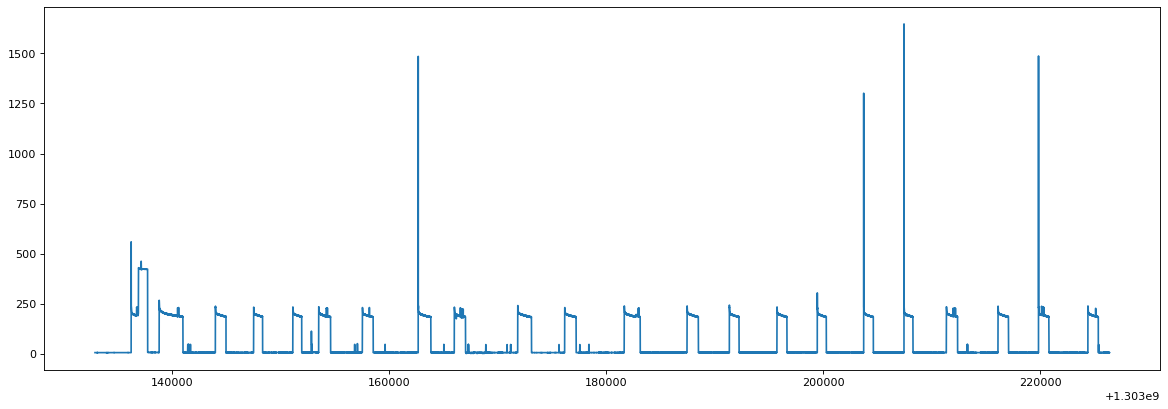

In [153]:
refrigerador_2_dias = dispositivo_H1L5.iloc[:24400, :]
tiempo = refrigerador_2_dias['UTC_Unix']
potencia =  refrigerador_2_dias['refrigerator_5']
#Grafica tiempo vs potencia
plt.figure(figsize=(18, 6), dpi=80)
plt.plot(tiempo, potencia)
plt.show()

Conclusión: De acuerdo a los valores estadisticos y al análisis visual de los datos se determino que el estado encendido esta por encima de los 160 Wats y el de caida al menos por debajo de los 20 Wats

**Paso 3: Encontrar las huellas On Off**

In [154]:
huellas_H1L5 = huellas(dispositivo_H1L5, labels_casa_1[5], 160, 20)
print(f'Huella H1L5: {len(huellas_H1L5)}')

Huella H1L5: 643


**Paso 4: Graficando los datos encontrados** 

Requiere el dataframe, la lista de huellas y el indice de posición

refrigerator_5


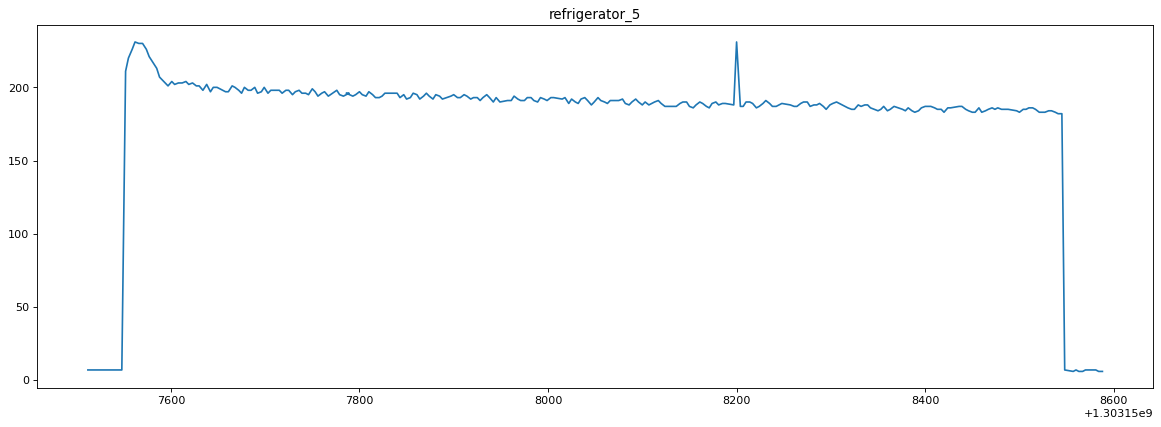

In [155]:
graficar_huella(dispositivo_H1L5, huellas_H1L5, 6)

## Guardar las huellas por casa y dispositivo

In [41]:
raiz="C:\\Users\\josel\\SmartMeter\\OrdenandoTodo\\huellas\\"

In [28]:
huellas_chanel_5 = DataFrame(huellas_H1L5,columns=['on', 'off', 'UTC_Unix_1','UTC_Unix_2'])
huellas_chanel_5.to_csv(raiz + "\\house_1\\huellas_chanel_5.csv", index=True,sep=r' ',header= True, encoding='utf-8' )

## Huellas para la casa 3
**Archivos casa 3:** 

In [29]:
#Carga de los datos por cada casa
dispositivo_H3L1 = pd.read_csv(casa_3[0], sep=r' ', encoding='utf-8', names=['UTC_Unix',labels_casa_3[1]], header=None)
dispositivo_H3L2 = pd.read_csv(casa_3[1], sep=r' ', encoding='utf-8', names=['UTC_Unix',labels_casa_3[2]], header=None)
dispositivo_H3L3 = pd.read_csv(casa_3[2], sep=r' ', encoding='utf-8', names=['UTC_Unix',labels_casa_3[3]], header=None)
dispositivo_H3L4 = pd.read_csv(casa_3[3], sep=r' ', encoding='utf-8', names=['UTC_Unix',labels_casa_3[4]], header=None)
dispositivo_H3L5 = pd.read_csv(casa_3[4], sep=r' ', encoding='utf-8', names=['UTC_Unix',labels_casa_3[5]], header=None)
dispositivo_H3L6 = pd.read_csv(casa_3[5], sep=r' ', encoding='utf-8', names=['UTC_Unix',labels_casa_3[6]], header=None)
dispositivo_H3L7 = pd.read_csv(casa_3[6], sep=r' ', encoding='utf-8', names=['UTC_Unix',labels_casa_3[7]], header=None)
dispositivo_H3L8 = pd.read_csv(casa_3[7], sep=r' ', encoding='utf-8', names=['UTC_Unix',labels_casa_3[8]], header=None)
dispositivo_H3L9 = pd.read_csv(casa_3[8], sep=r' ', encoding='utf-8', names=['UTC_Unix',labels_casa_3[9]], header=None)
dispositivo_H3L10 = pd.read_csv(casa_3[9], sep=r' ', encoding='utf-8', names=['UTC_Unix',labels_casa_3[10]], header=None)
dispositivo_H3L11 = pd.read_csv(casa_3[10], sep=r' ', encoding='utf-8', names=['UTC_Unix',labels_casa_3[11]], header=None)
dispositivo_H3L12 = pd.read_csv(casa_3[11], sep=r' ', encoding='utf-8', names=['UTC_Unix',labels_casa_3[12]], header=None)
dispositivo_H3L13 = pd.read_csv(casa_3[12], sep=r' ', encoding='utf-8', names=['UTC_Unix',labels_casa_3[13]], header=None)
dispositivo_H3L14 = pd.read_csv(casa_3[13], sep=r' ', encoding='utf-8', names=['UTC_Unix',labels_casa_3[14]], header=None)
dispositivo_H3L15 = pd.read_csv(casa_3[14], sep=r' ', encoding='utf-8', names=['UTC_Unix',labels_casa_3[15]], header=None)
dispositivo_H3L16 = pd.read_csv(casa_3[15], sep=r' ', encoding='utf-8', names=['UTC_Unix',labels_casa_3[16]], header=None)
dispositivo_H3L17 = pd.read_csv(casa_3[16], sep=r' ', encoding='utf-8', names=['UTC_Unix',labels_casa_3[17]], header=None)
dispositivo_H3L18 = pd.read_csv(casa_3[17], sep=r' ', encoding='utf-8', names=['UTC_Unix',labels_casa_3[18]], header=None)
dispositivo_H3L19 = pd.read_csv(casa_3[18], sep=r' ', encoding='utf-8', names=['UTC_Unix',labels_casa_3[19]], header=None)
dispositivo_H3L20 = pd.read_csv(casa_3[19], sep=r' ', encoding='utf-8', names=['UTC_Unix',labels_casa_3[20]], header=None)
dispositivo_H3L21 = pd.read_csv(casa_3[20], sep=r' ', encoding='utf-8', names=['UTC_Unix',labels_casa_3[21]], header=None)
dispositivo_H3L22 = pd.read_csv(casa_3[21], sep=r' ', encoding='utf-8', names=['UTC_Unix',labels_casa_3[22]], header=None)

In [30]:
print(f'\nLabels Casa 3\n')
print(labels_casa_3)


Labels Casa 3

{1: 'mains_1', 2: 'mains_2', 3: 'outlets_unknown_3', 4: 'outlets_unknown_4', 5: 'lighting_5', 6: 'electronics_6', 7: 'refrigerator_7', 8: 'disposal_8', 9: 'dishwaser_9', 10: 'furance_10', 11: 'lighting_11', 12: 'outlets_unknown_12', 13: 'washer_dryer_13', 14: 'washer_dryer_14', 15: 'lighting_15', 16: 'microwave_16', 17: 'lighting_17', 18: 'smoke_alarms_18', 19: 'lighting_19', 20: 'bathroom_gfi_20', 21: 'kitchen_outlets_21', 22: 'kitchen_outlets_22'}


## Analisis de la muestra por dispositivos casa 3

**Dispositivo 3 = outlets_unknown_3** Toma corriente desconocido?

**Paso 1:** Estadisticas

In [59]:
media = dispositivo_H3L3[labels_casa_3[3]].mean() #Promedio media
mediana = dispositivo_H3L3[labels_casa_3[3]].median() #Dato central mediana
moda = dispositivo_H3L3[labels_casa_3[3]].mode()
maximo = dispositivo_H3L3[labels_casa_3[3]].max()
minimo = dispositivo_H3L3[labels_casa_3[3]].min()
print(f'\nmedia = {media} \nmediana = {mediana} \nmoda = {moda} \nmax = {maximo} \nmin  = {minimo}')


media = 2.916487464953589 
mediana = 0.0 
moda = 0    0.0
dtype: float64 
max = 973.0 
min  = 0.0


**Paso 2:** Análisis grafico 

Verifiquemos los datos graficamente por intervalor pequeños ya sea dias de medición del dispositivo 86400 segundos, un dia 172800 segundos dos dias,  o 1800 segundos 30 minutos, para verificar el momento donde se enciende el dispositivo. 

**3: outlets_unknown_3**

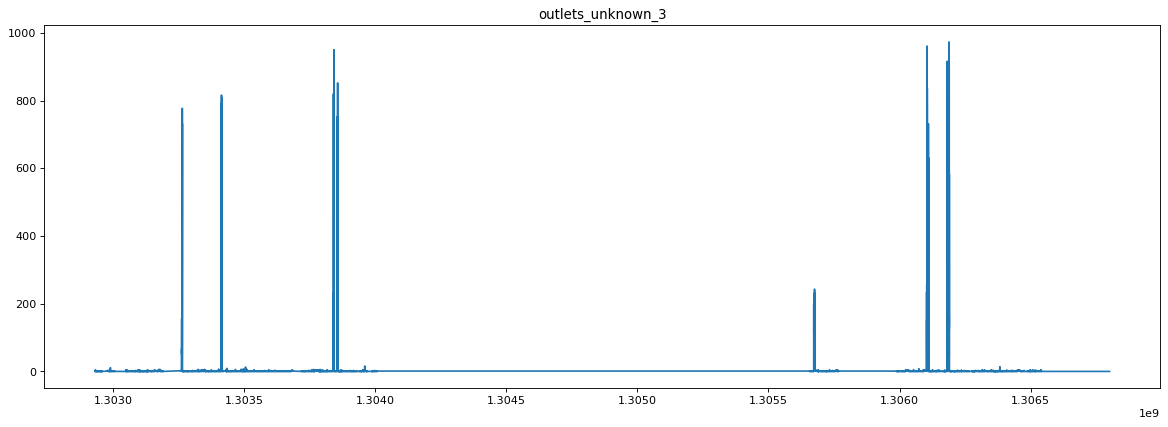

In [61]:
seccion = dispositivo_H3L3.iloc[:, :]
tiempo = seccion['UTC_Unix']
potencia =  seccion[seccion.columns[1]]
#Grafica tiempo vs potencia
plt.figure(figsize=(18, 6), dpi=80)
plt.plot(tiempo, potencia)
plt.title(seccion.columns[1])
plt.show()

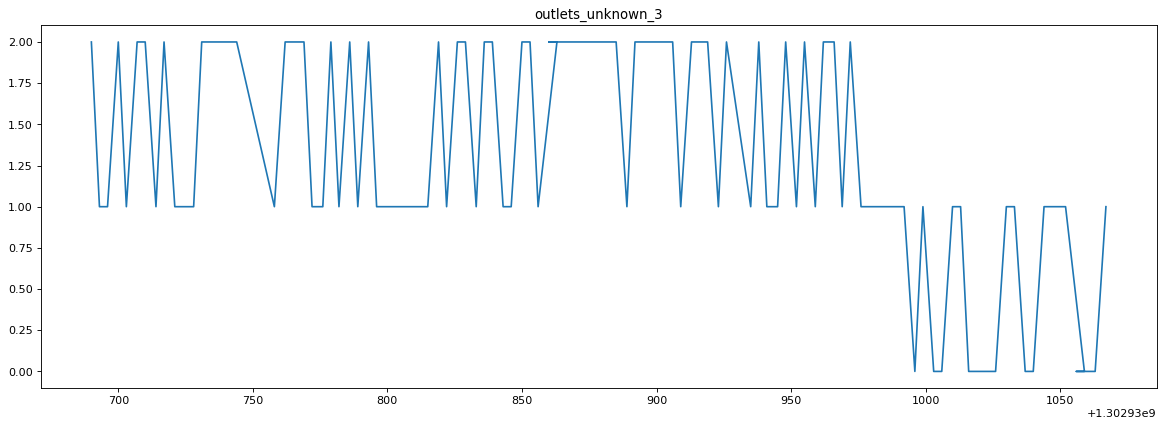

In [102]:
seccion = dispositivo_H3L3.iloc[:100, :]
tiempo = seccion['UTC_Unix']
potencia =  seccion[seccion.columns[1]]
#Grafica tiempo vs potencia
plt.figure(figsize=(18, 6), dpi=80)
plt.plot(tiempo, potencia)
plt.title(seccion.columns[1])
plt.show()

Conclusión: Los valores toman formas con patrones demasiado al azar, no logro identificar un valor coherente para tomarlo como estado On y cuando seria OFF. Se toma como desición On > 0 off = 0

**4: outlets_unknown_4**

In [145]:
media = dispositivo_H3L4[labels_casa_3[4]].mean() #Promedio media
mediana = dispositivo_H3L4[labels_casa_3[4]].median() #Dato central mediana
moda = dispositivo_H3L4[labels_casa_3[4]].mode()
maximo = dispositivo_H3L4[labels_casa_3[4]].max()
minimo = dispositivo_H3L4[labels_casa_3[4]].min()
print(f'\n media = {media} \n mediana = {mediana} \n moda = {moda} \n max = {maximo} \n min  = {minimo}')


 media = 0.09986216521861783 
 mediana = 0.0 
 moda = 0    0.0
dtype: float64 
 max = 18.0 
 min  = 0.0


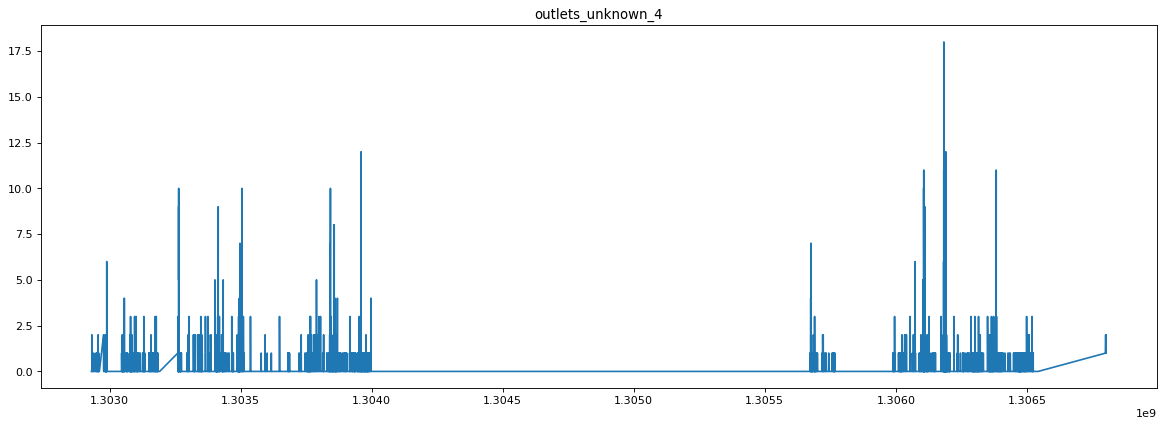

In [146]:
seccion = dispositivo_H3L4.iloc[:, :]
tiempo = seccion['UTC_Unix']
potencia =  seccion[seccion.columns[1]]
#Grafica tiempo vs potencia
plt.figure(figsize=(18, 6), dpi=80)
plt.plot(tiempo, potencia)
plt.title(seccion.columns[1])
plt.show()

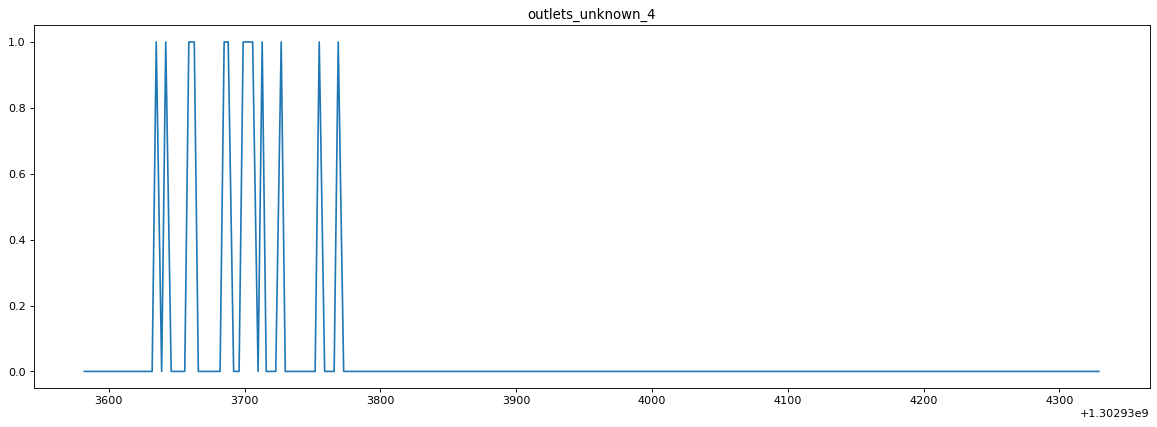

In [110]:
seccion = dispositivo_H3L4.iloc[400:600, :]
tiempo = seccion['UTC_Unix']
potencia =  seccion[seccion.columns[1]]
#Grafica tiempo vs potencia
plt.figure(figsize=(18, 6), dpi=80)
plt.plot(tiempo, potencia)
plt.title(seccion.columns[1])
plt.show()

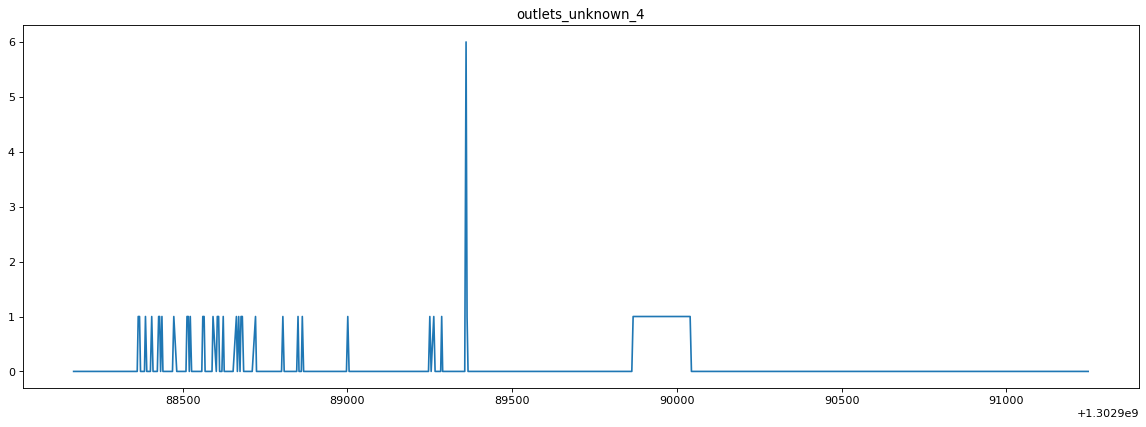

In [120]:
seccion = dispositivo_H3L4.iloc[8200:9000, :]
tiempo = seccion['UTC_Unix']
potencia =  seccion[seccion.columns[1]]
#Grafica tiempo vs potencia
plt.figure(figsize=(18, 6), dpi=80)
plt.plot(tiempo, potencia)
plt.title(seccion.columns[1])
plt.show()

**Conclusión:** Los cambios en este caso se producen cuando la potencia es mayor a 0 y caen rapidamente nuevamente a un valor de cero. Los estados On seran datos > 0 y OFF = 0

**5:lighting_5**

In [132]:
media = dispositivo_H3L5[labels_casa_3[5]].mean() #Promedio media
mediana = dispositivo_H3L5[labels_casa_3[5]].median() #Dato central mediana
moda = dispositivo_H3L5[labels_casa_3[5]].mode()
maximo = dispositivo_H3L5[labels_casa_3[5]].max()
minimo = dispositivo_H3L5[labels_casa_3[5]].min()
print(f'\nmedia = {media} \nmediana = {mediana} \nmoda = {moda} \nmax = {maximo} \nmin  = {minimo}')


media = 0.7900754008220595 
mediana = 0.0 
moda = 0    0.0
dtype: float64 
max = 1156.0 
min  = 0.0


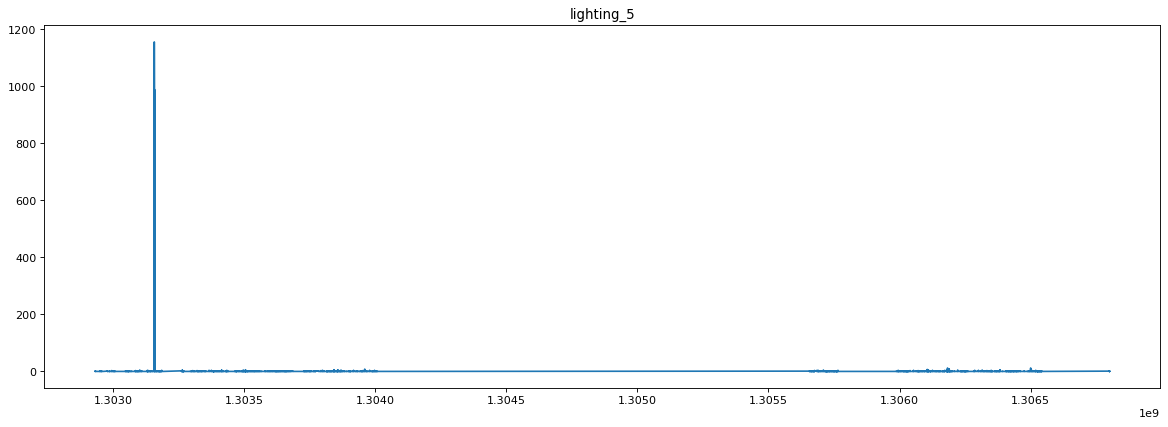

In [121]:
seccion = dispositivo_H3L5.iloc[:, :]
tiempo = seccion['UTC_Unix']
potencia =  seccion[seccion.columns[1]]
#Grafica tiempo vs potencia
plt.figure(figsize=(18, 6), dpi=80)
plt.plot(tiempo, potencia)
plt.title(seccion.columns[1])
plt.show()

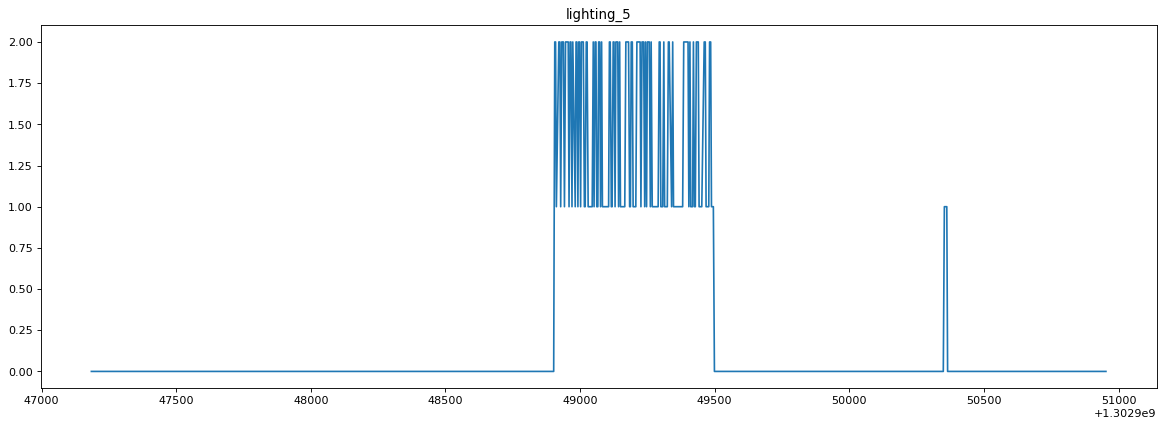

In [125]:
seccion = dispositivo_H3L5.iloc[4000:5000, :]
tiempo = seccion['UTC_Unix']
potencia =  seccion[seccion.columns[1]]
#Grafica tiempo vs potencia
plt.figure(figsize=(18, 6), dpi=80)
plt.plot(tiempo, potencia)
plt.title(seccion.columns[1])
plt.show()

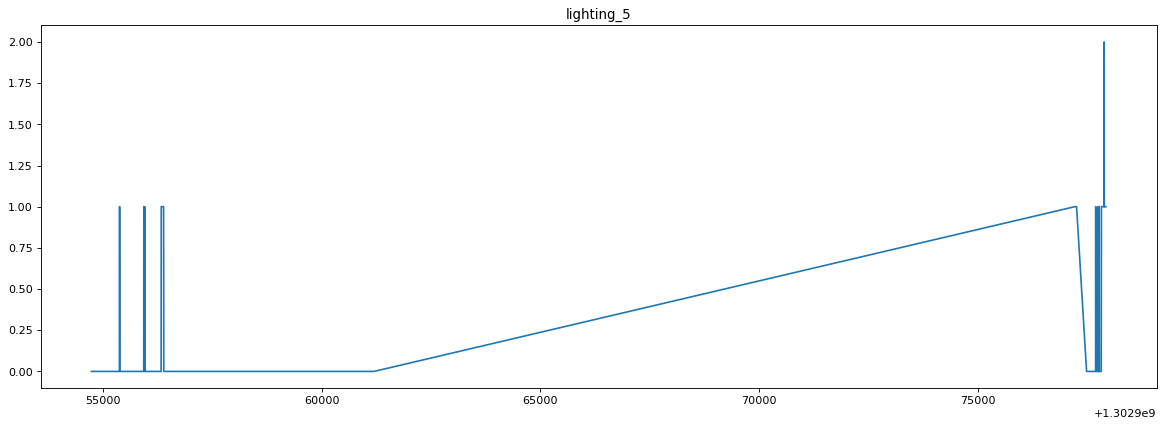

In [126]:
seccion = dispositivo_H3L5.iloc[6000:7000, :]
tiempo = seccion['UTC_Unix']
potencia =  seccion[seccion.columns[1]]
#Grafica tiempo vs potencia
plt.figure(figsize=(18, 6), dpi=80)
plt.plot(tiempo, potencia)
plt.title(seccion.columns[1])
plt.show()

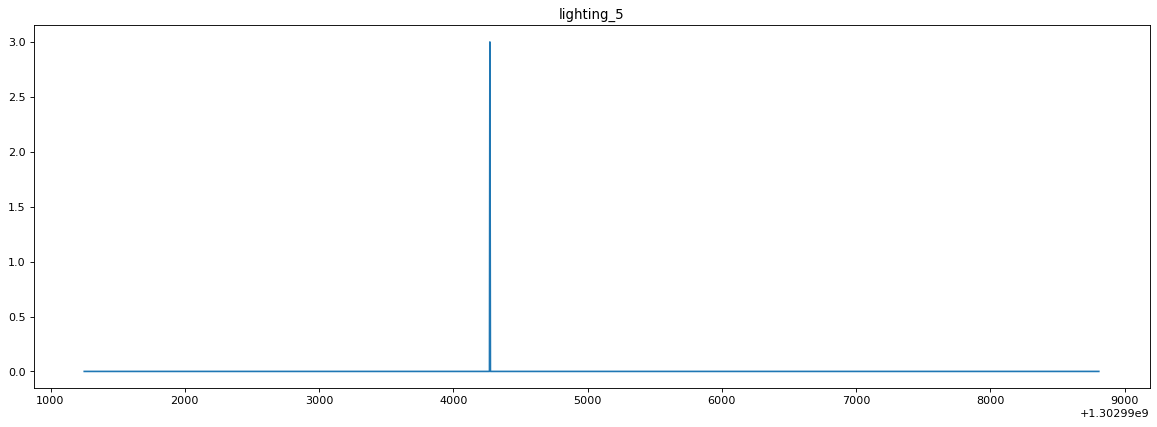

In [157]:
seccion = dispositivo_H3L5.iloc[9000:11000, :]
tiempo = seccion['UTC_Unix']
potencia =  seccion[seccion.columns[1]]
#Grafica tiempo vs potencia
plt.figure(figsize=(18, 6), dpi=80)
plt.plot(tiempo, potencia)
plt.title(seccion.columns[1])
plt.show()

**Conclusión:** On > 0 Off = 0

**6: electronics_6**

In [158]:
media = dispositivo_H3L6[labels_casa_3[6]].mean() #Promedio media
mediana = dispositivo_H3L6[labels_casa_3[6]].median() #Dato central mediana
moda = dispositivo_H3L6[labels_casa_3[6]].mode()
maximo = dispositivo_H3L6[labels_casa_3[6]].max()
minimo = dispositivo_H3L6[labels_casa_3[6]].min()
print(f'\nmedia = {media} \nmediana = {mediana} \nmoda = {moda} \nmax = {maximo} \nmin  = {minimo}')


media = 103.5023372522624 
mediana = 90.0 
moda = 0    73.0
dtype: float64 
max = 1321.0 
min  = 34.0


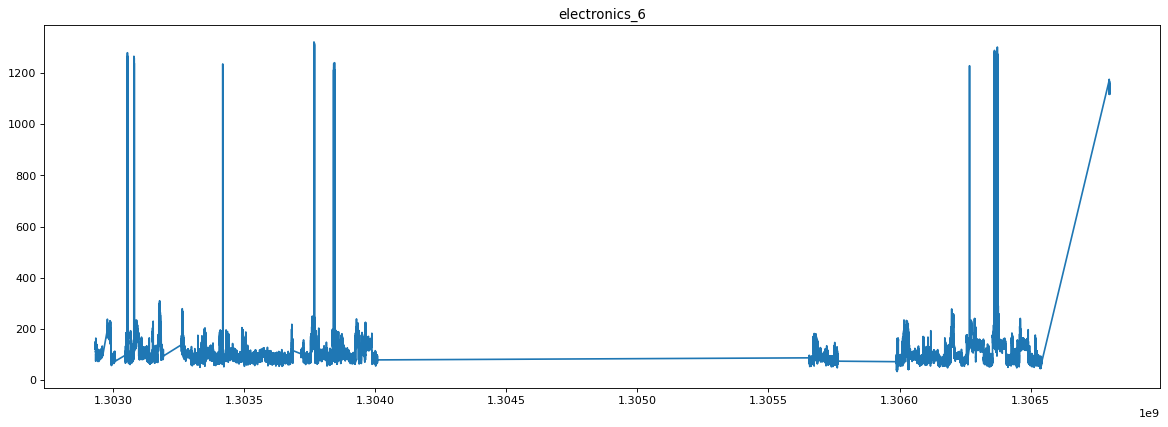

In [127]:
seccion = dispositivo_H3L6.iloc[:, :]
tiempo = seccion['UTC_Unix']
potencia =  seccion[seccion.columns[1]]
#Grafica tiempo vs potencia
plt.figure(figsize=(18, 6), dpi=80)
plt.plot(tiempo, potencia)
plt.title(seccion.columns[1])
plt.show()

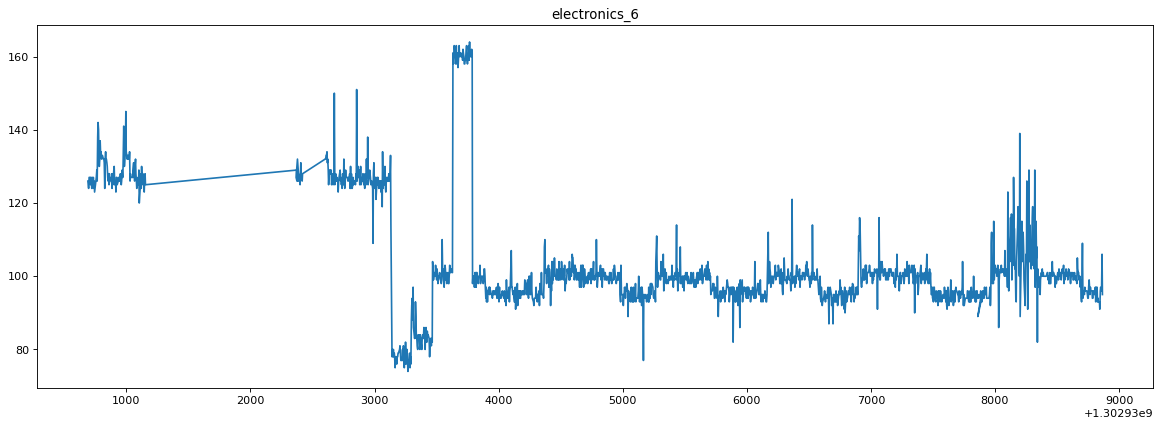

In [77]:
seccion = dispositivo_H3L6.iloc[:1800, :]
tiempo = seccion['UTC_Unix']
potencia =  seccion[seccion.columns[1]]
#Grafica tiempo vs potencia
plt.figure(figsize=(18, 6), dpi=80)
plt.plot(tiempo, potencia)
plt.title(seccion.columns[1])
plt.show()

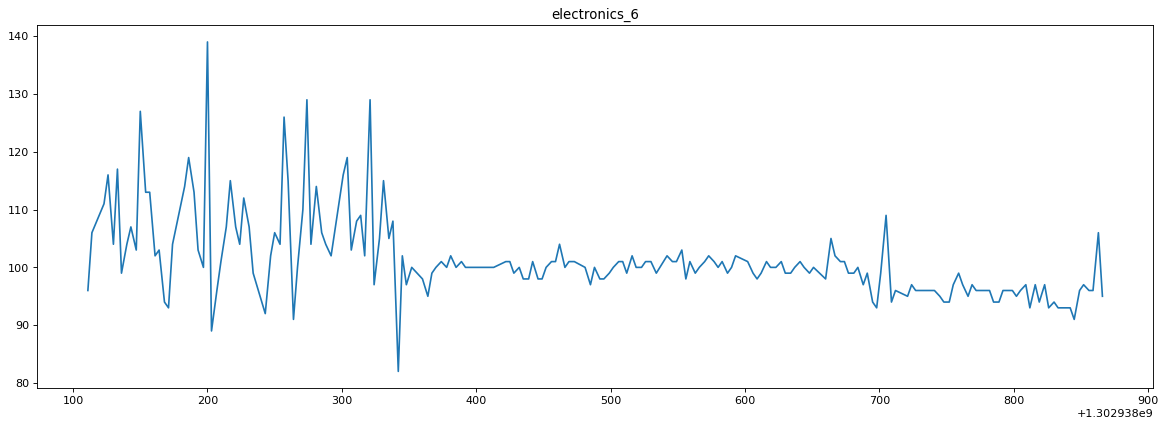

In [128]:
seccion = dispositivo_H3L6.iloc[1600:1800, :]
tiempo = seccion['UTC_Unix']
potencia =  seccion[seccion.columns[1]]
#Grafica tiempo vs potencia
plt.figure(figsize=(18, 6), dpi=80)
plt.plot(tiempo, potencia)
plt.title(seccion.columns[1])
plt.show()

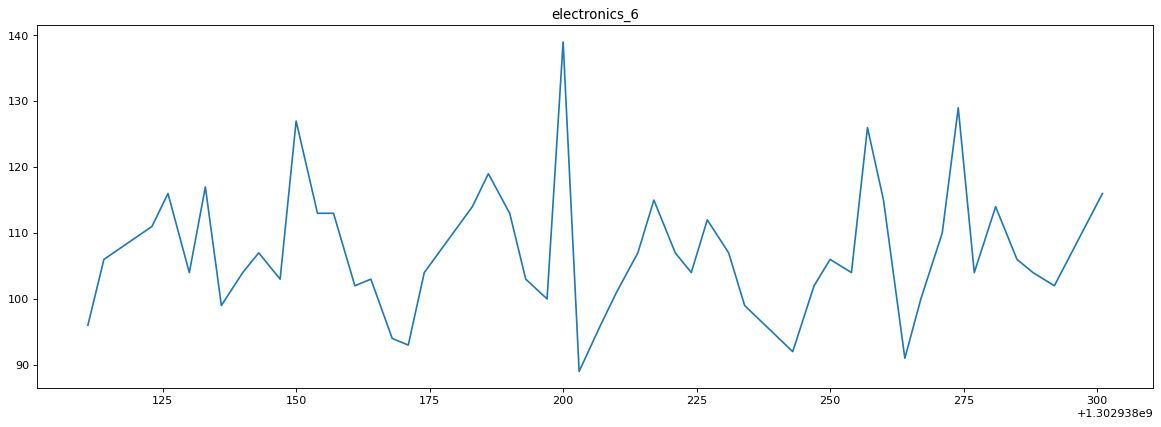

In [167]:
seccion = dispositivo_H3L6.iloc[1600:1650, :]
tiempo = seccion['UTC_Unix']
potencia =  seccion[seccion.columns[1]]
#Grafica tiempo vs potencia
plt.figure(figsize=(18, 6), dpi=80)
plt.plot(tiempo, potencia)
plt.title(seccion.columns[1])
plt.show()

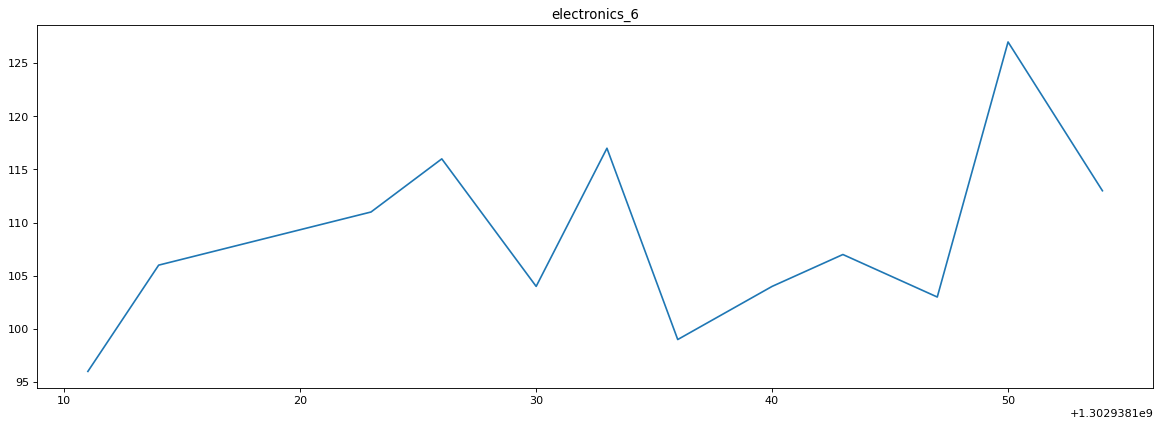

In [168]:
seccion = dispositivo_H3L6.iloc[1600:1612, :]
tiempo = seccion['UTC_Unix']
potencia =  seccion[seccion.columns[1]]
#Grafica tiempo vs potencia
plt.figure(figsize=(18, 6), dpi=80)
plt.plot(tiempo, potencia)
plt.title(seccion.columns[1])
plt.show()

**Conclusión:** En este caso no logro determinar un patron

**7: refrigerator_7**

In [169]:
media = dispositivo_H3L7[labels_casa_3[7]].mean() #Promedio media
mediana = dispositivo_H3L7[labels_casa_3[7]].median() #Dato central mediana
moda = dispositivo_H3L7[labels_casa_3[7]].mode()
maximo = dispositivo_H3L7[labels_casa_3[7]].max()
minimo = dispositivo_H3L7[labels_casa_3[7]].min()
print(f'\nmedia = {media} \nmediana = {mediana} \nmoda = {moda} \nmax = {maximo} \nmin  = {minimo}')


media = 47.04609670211107 
mediana = 1.0 
moda = 0    0.0
dtype: float64 
max = 1582.0 
min  = 0.0


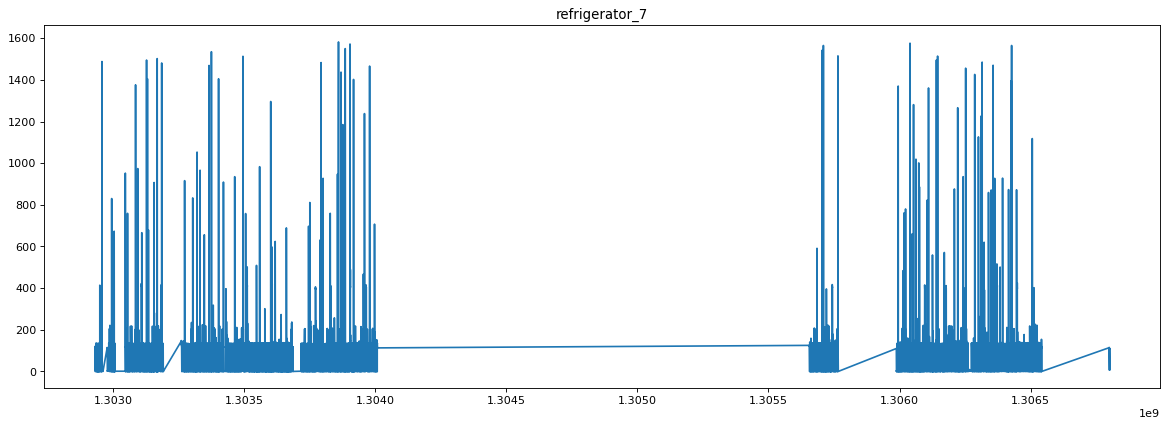

In [170]:
seccion = dispositivo_H3L7.iloc[:, :]
tiempo = seccion['UTC_Unix']
potencia =  seccion[seccion.columns[1]]
#Grafica tiempo vs potencia
plt.figure(figsize=(18, 6), dpi=80)
plt.plot(tiempo, potencia)
plt.title(seccion.columns[1])
plt.show()

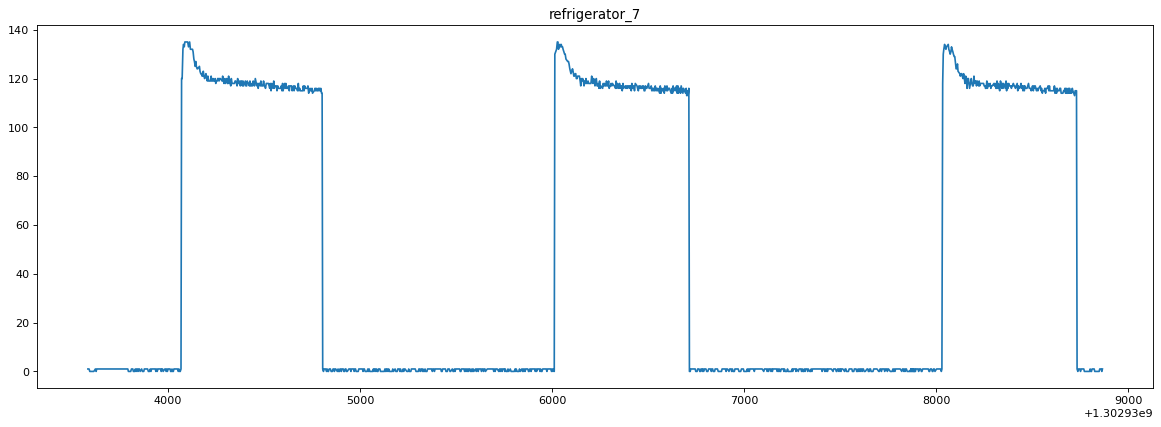

In [175]:
seccion = dispositivo_H3L7.iloc[400:1800, :]
tiempo = seccion['UTC_Unix']
potencia =  seccion[seccion.columns[1]]
#Grafica tiempo vs potencia
plt.figure(figsize=(18, 6), dpi=80)
plt.plot(tiempo, potencia)
plt.title(seccion.columns[1])
plt.show()

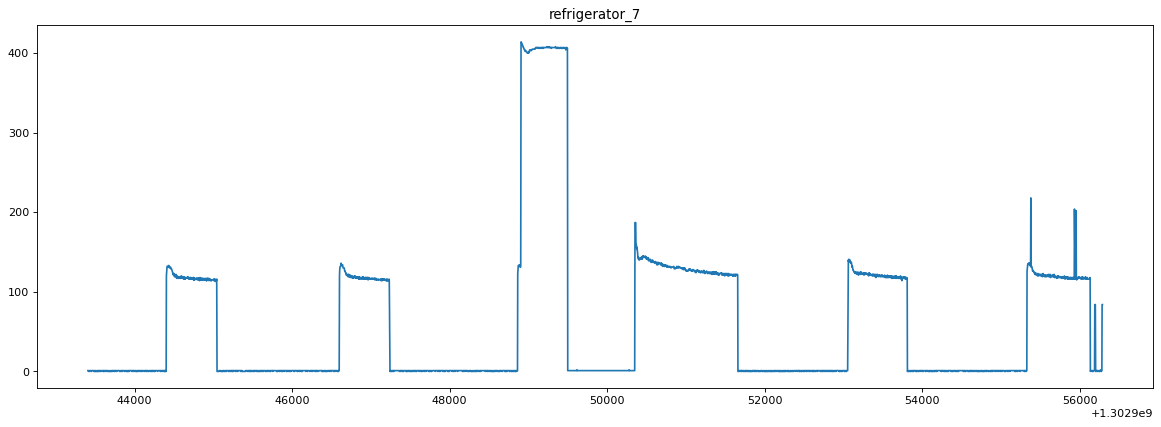

In [176]:
seccion = dispositivo_H3L7.iloc[3000:6400, :]
tiempo = seccion['UTC_Unix']
potencia =  seccion[seccion.columns[1]]
#Grafica tiempo vs potencia
plt.figure(figsize=(18, 6), dpi=80)
plt.plot(tiempo, potencia)
plt.title(seccion.columns[1])
plt.show()

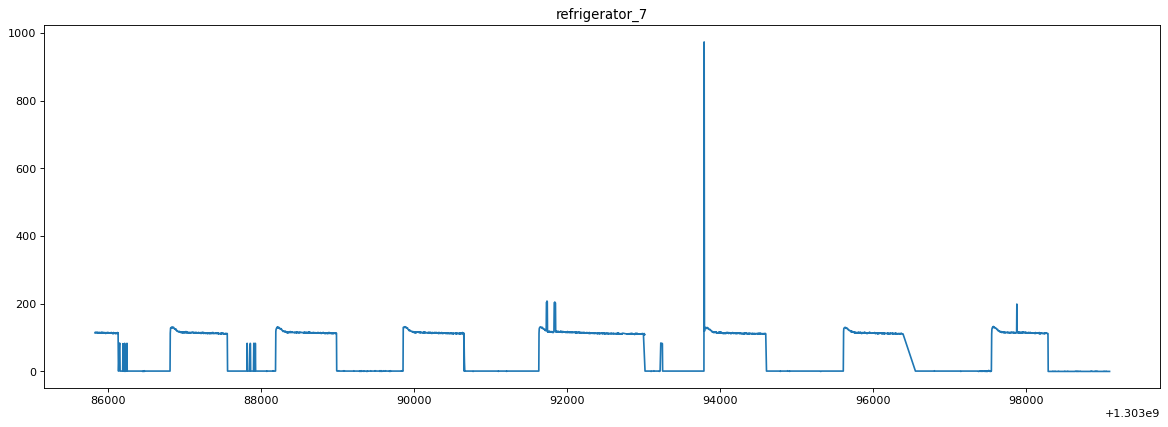

In [177]:
seccion = dispositivo_H3L7.iloc[23000:26400, :]
tiempo = seccion['UTC_Unix']
potencia =  seccion[seccion.columns[1]]
#Grafica tiempo vs potencia
plt.figure(figsize=(18, 6), dpi=80)
plt.plot(tiempo, potencia)
plt.title(seccion.columns[1])
plt.show()

**Conclusión:** Tomaremos como ON>40 y off<=40

**8: disposal_8**

In [178]:
media = dispositivo_H3L8[labels_casa_3[8]].mean() #Promedio media
mediana = dispositivo_H3L8[labels_casa_3[8]].median() #Dato central mediana
moda = dispositivo_H3L8[labels_casa_3[8]].mode()
maximo = dispositivo_H3L8[labels_casa_3[8]].max()
minimo = dispositivo_H3L8[labels_casa_3[8]].min()
print(f'\nmedia = {media} \nmediana = {mediana} \nmoda = {moda} \nmax = {maximo} \nmin  = {minimo}')


media = 0.08586339756549627 
mediana = 0.0 
moda = 0    0.0
dtype: float64 
max = 571.0 
min  = 0.0


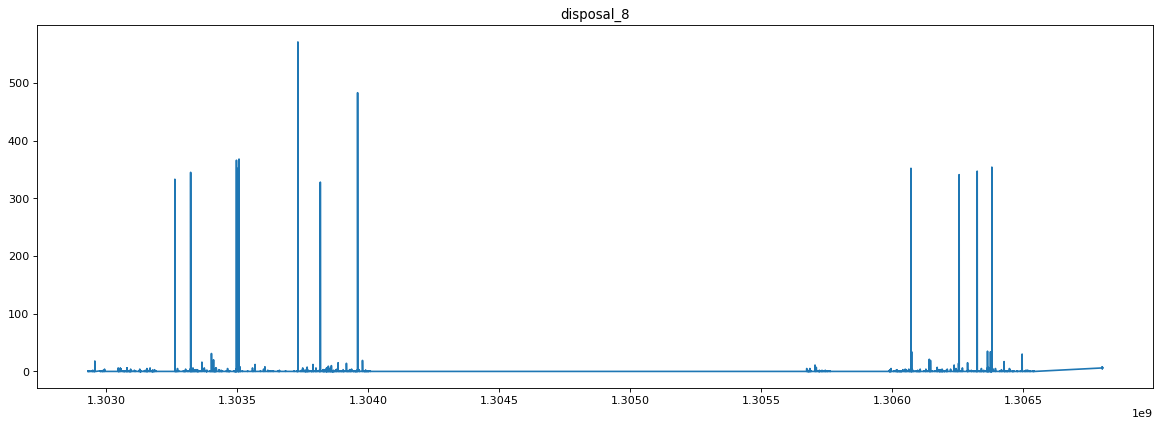

In [180]:
seccion = dispositivo_H3L8.iloc[:, :]
tiempo = seccion['UTC_Unix']
potencia =  seccion[seccion.columns[1]]
#Grafica tiempo vs potencia
plt.figure(figsize=(18, 6), dpi=80)
plt.plot(tiempo, potencia)
plt.title(seccion.columns[1])
plt.show()

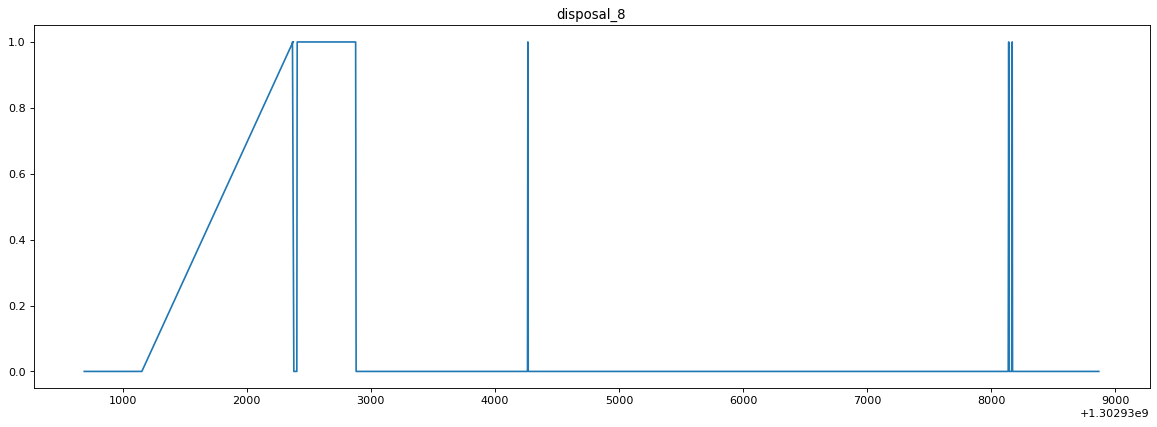

In [183]:
seccion = dispositivo_H3L8.iloc[0:1800, :]
tiempo = seccion['UTC_Unix']
potencia =  seccion[seccion.columns[1]]
#Grafica tiempo vs potencia
plt.figure(figsize=(18, 6), dpi=80)
plt.plot(tiempo, potencia)
plt.title(seccion.columns[1])
plt.show()

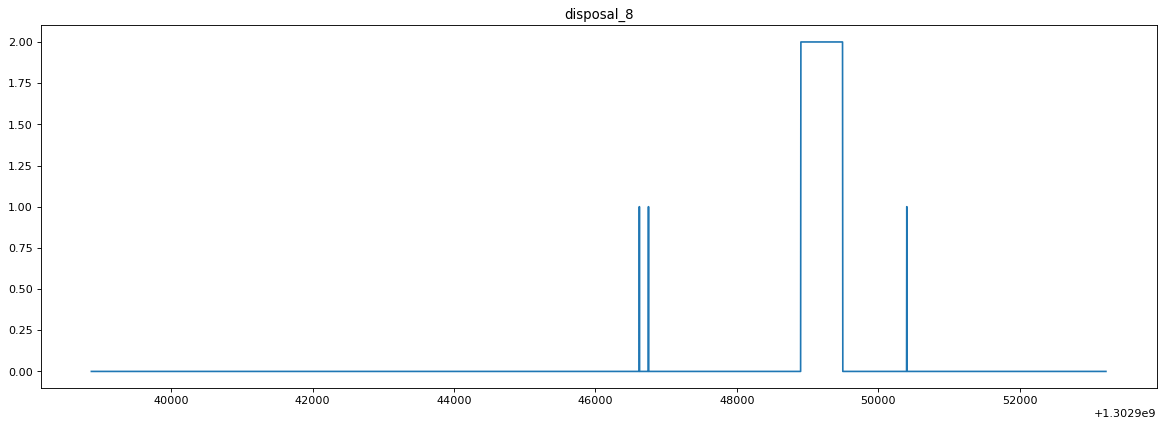

In [182]:
seccion = dispositivo_H3L8.iloc[1800:5600, :]
tiempo = seccion['UTC_Unix']
potencia =  seccion[seccion.columns[1]]
#Grafica tiempo vs potencia
plt.figure(figsize=(18, 6), dpi=80)
plt.plot(tiempo, potencia)
plt.title(seccion.columns[1])
plt.show()

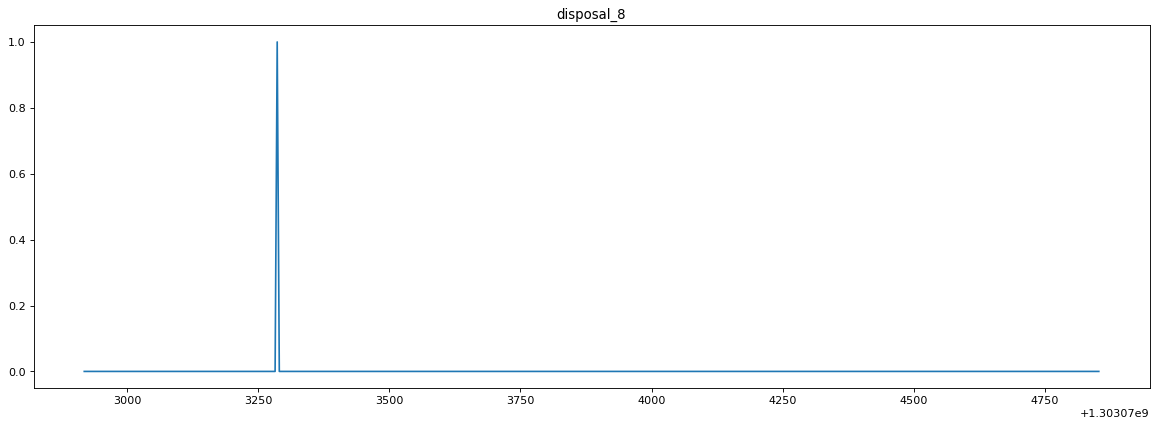

In [184]:
seccion = dispositivo_H3L8.iloc[20000:20500, :]
tiempo = seccion['UTC_Unix']
potencia =  seccion[seccion.columns[1]]
#Grafica tiempo vs potencia
plt.figure(figsize=(18, 6), dpi=80)
plt.plot(tiempo, potencia)
plt.title(seccion.columns[1])
plt.show()

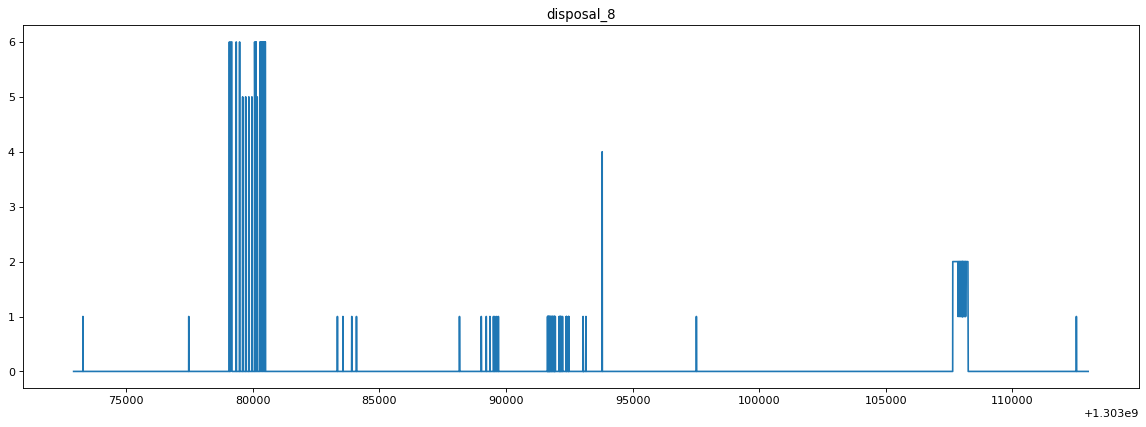

In [186]:
seccion = dispositivo_H3L8.iloc[20000:30000, :]
tiempo = seccion['UTC_Unix']
potencia =  seccion[seccion.columns[1]]
#Grafica tiempo vs potencia
plt.figure(figsize=(18, 6), dpi=80)
plt.plot(tiempo, potencia)
plt.title(seccion.columns[1])
plt.show()

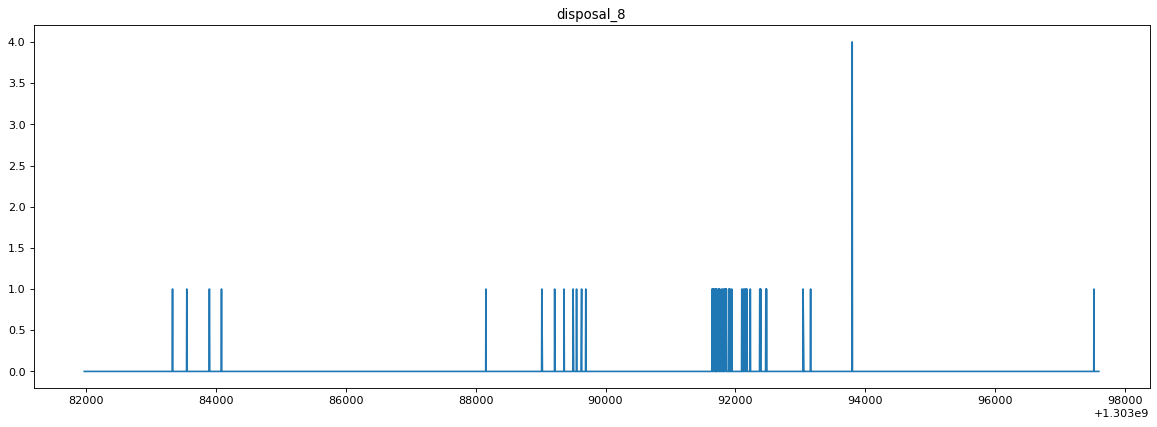

In [190]:
seccion = dispositivo_H3L8.iloc[22000:26000, :]
tiempo = seccion['UTC_Unix']
potencia =  seccion[seccion.columns[1]]
#Grafica tiempo vs potencia
plt.figure(figsize=(18, 6), dpi=80)
plt.plot(tiempo, potencia)
plt.title(seccion.columns[1])
plt.show()

**Conclusión:** Trituradora On > 0 Off = 0

**9: dishwaser_9**

In [191]:
media = dispositivo_H3L9[labels_casa_3[9]].mean() #Promedio media
mediana = dispositivo_H3L9[labels_casa_3[9]].median() #Dato central mediana
moda = dispositivo_H3L9[labels_casa_3[9]].mode()
maximo = dispositivo_H3L9[labels_casa_3[9]].max()
minimo = dispositivo_H3L9[labels_casa_3[9]].min()
print(f'\nmedia = {media} \nmediana = {mediana} \nmoda = {moda} \nmax = {maximo} \nmin  = {minimo}')


media = 7.041179687557999 
mediana = 1.0 
moda = 0    1.0
dtype: float64 
max = 786.0 
min  = 0.0


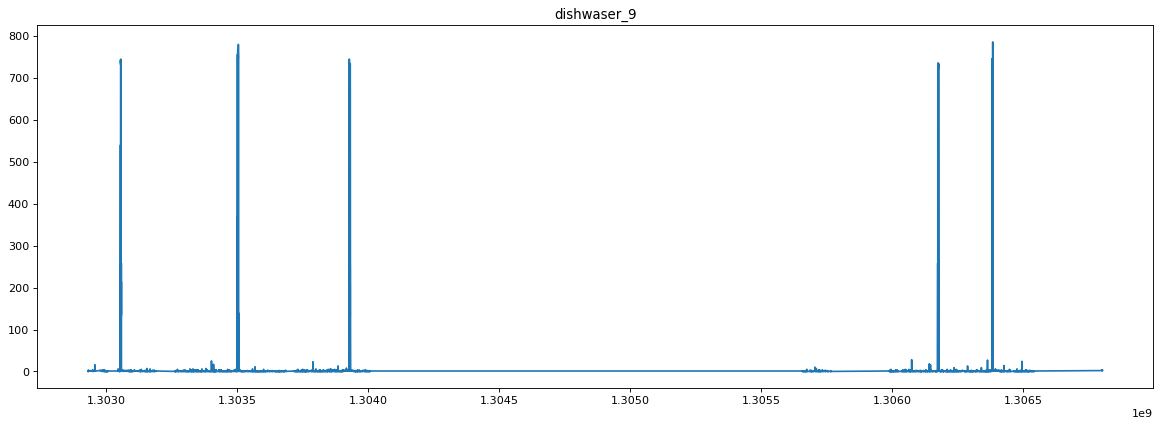

In [192]:
seccion = dispositivo_H3L9.iloc[:, :]
tiempo = seccion['UTC_Unix']
potencia =  seccion[seccion.columns[1]]
#Grafica tiempo vs potencia
plt.figure(figsize=(18, 6), dpi=80)
plt.plot(tiempo, potencia)
plt.title(seccion.columns[1])
plt.show()

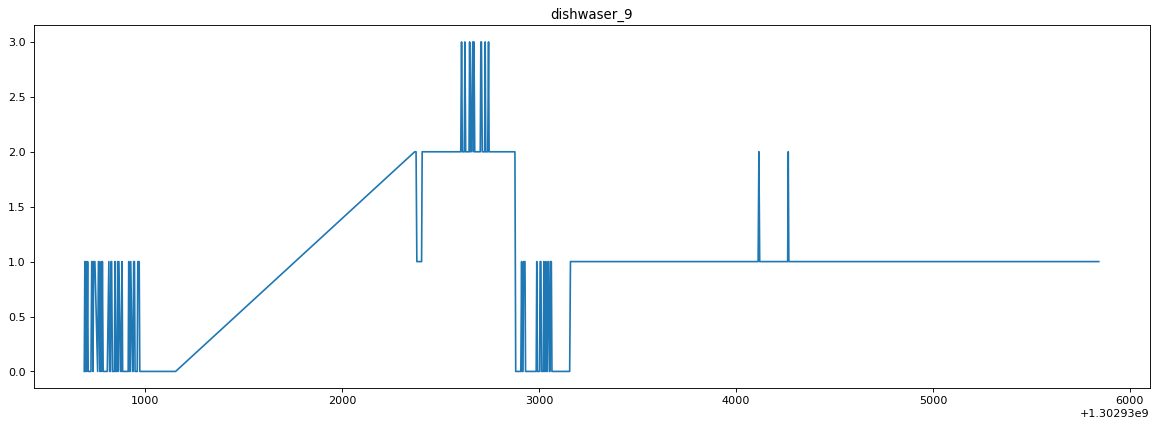

In [193]:
seccion = dispositivo_H3L9.iloc[:1000, :]
tiempo = seccion['UTC_Unix']
potencia =  seccion[seccion.columns[1]]
#Grafica tiempo vs potencia
plt.figure(figsize=(18, 6), dpi=80)
plt.plot(tiempo, potencia)
plt.title(seccion.columns[1])
plt.show()

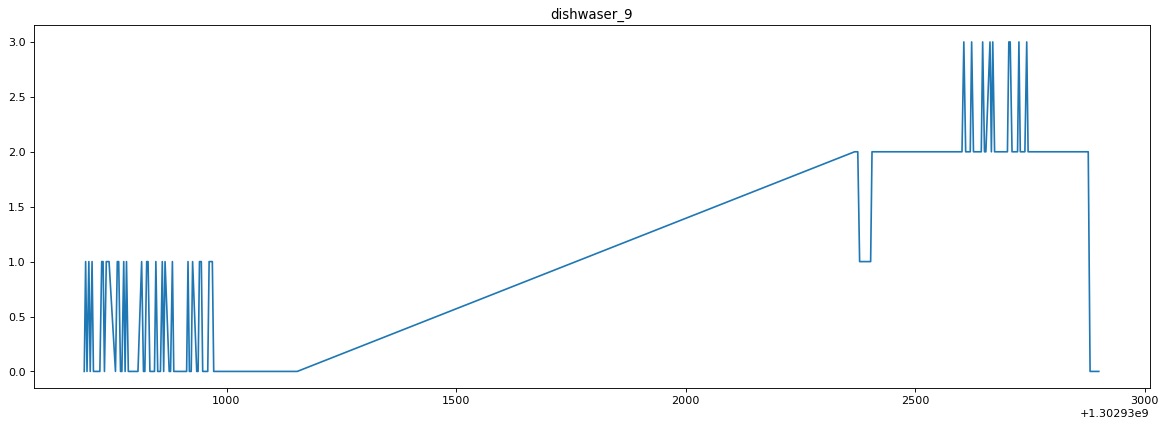

In [201]:
seccion = dispositivo_H3L9.iloc[:220, :]
tiempo = seccion['UTC_Unix']
potencia =  seccion[seccion.columns[1]]
#Grafica tiempo vs potencia
plt.figure(figsize=(18, 6), dpi=80)
plt.plot(tiempo, potencia)
plt.title(seccion.columns[1])
plt.show()

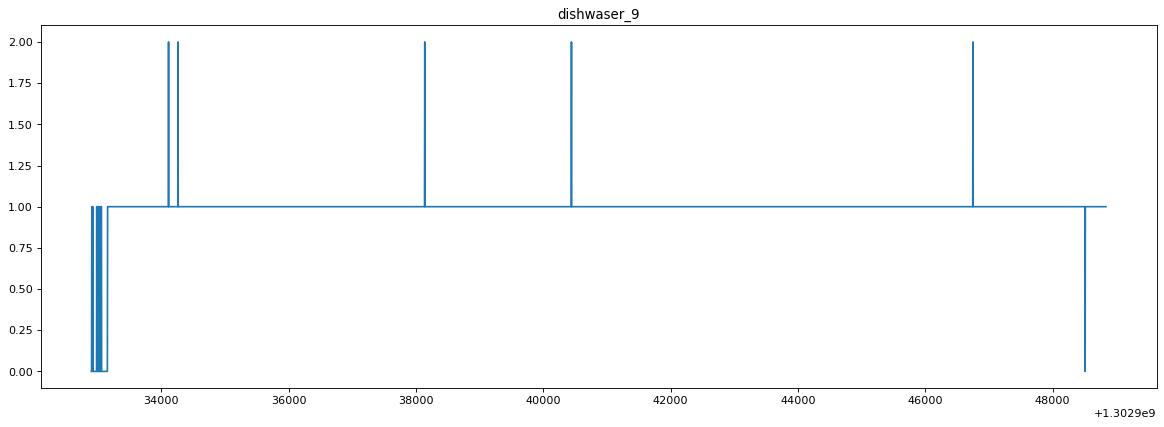

In [214]:
seccion = dispositivo_H3L9.iloc[220:4440, :]
tiempo = seccion['UTC_Unix']
potencia =  seccion[seccion.columns[1]]
#Grafica tiempo vs potencia
plt.figure(figsize=(18, 6), dpi=80)
plt.plot(tiempo, potencia)
plt.title(seccion.columns[1])
plt.show()

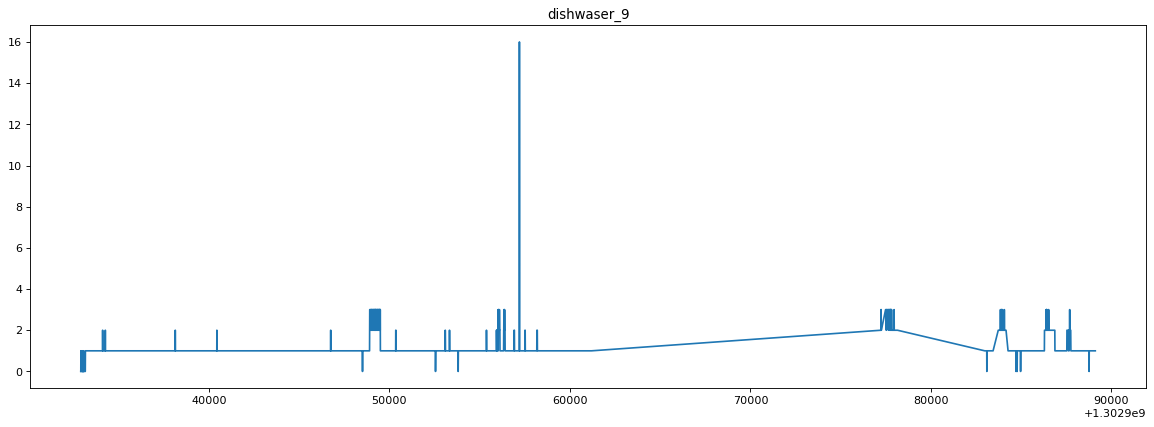

In [213]:
seccion = dispositivo_H3L9.iloc[220:8440, :]
tiempo = seccion['UTC_Unix']
potencia =  seccion[seccion.columns[1]]
#Grafica tiempo vs potencia
plt.figure(figsize=(18, 6), dpi=80)
plt.plot(tiempo, potencia)
plt.title(seccion.columns[1])
plt.show()

**Conclusión:** El lava vajillas se considera un electrodomestico multi estados, consideraremos que el ciclo de este electrodomestico iniciara en el primer estado de cambio mayor que cero y el ciclo terminara una vez el electrodomestico regrese a cero. On > 0 off = 0

**10: furance_10**

In [215]:
media = dispositivo_H3L10[labels_casa_3[10]].mean() #Promedio media
mediana = dispositivo_H3L10[labels_casa_3[10]].median() #Dato central mediana
moda = dispositivo_H3L10[labels_casa_3[10]].mode()
maximo = dispositivo_H3L10[labels_casa_3[10]].max()
minimo = dispositivo_H3L10[labels_casa_3[10]].min()
print(f'\nmedia = {media} \nmediana = {mediana} \nmoda = {moda} \nmax = {maximo} \nmin  = {minimo}')


media = 14.825197286857193 
mediana = 5.0 
moda = 0    5.0
dtype: float64 
max = 1194.0 
min  = 0.0


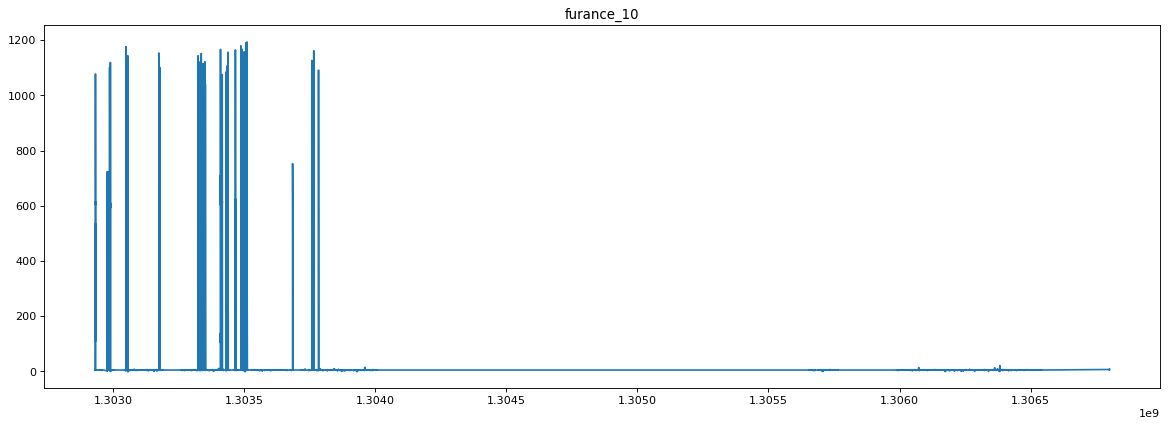

In [216]:
seccion = dispositivo_H3L10.iloc[:, :]
tiempo = seccion['UTC_Unix']
potencia =  seccion[seccion.columns[1]]
#Grafica tiempo vs potencia
plt.figure(figsize=(18, 6), dpi=80)
plt.plot(tiempo, potencia)
plt.title(seccion.columns[1])
plt.show()

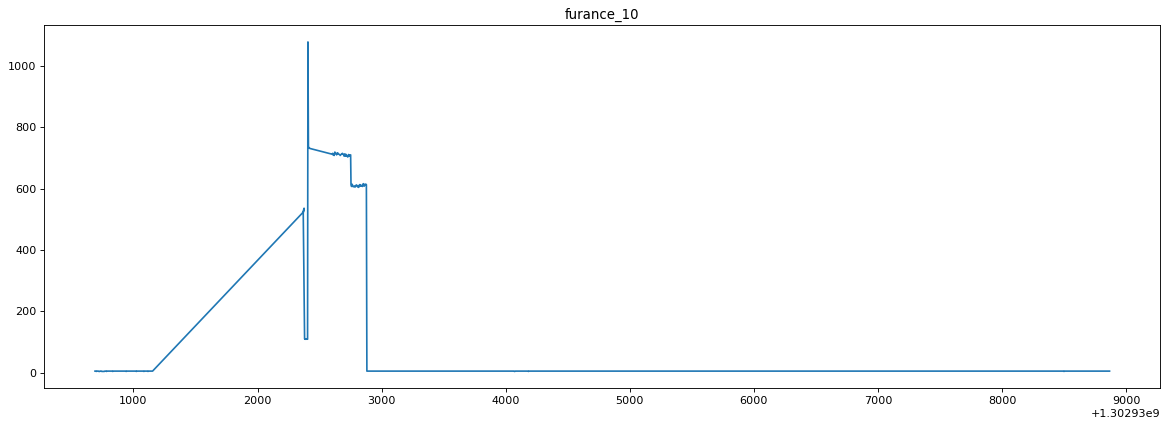

In [83]:
seccion = dispositivo_H3L10.iloc[:1800, :]
tiempo = seccion['UTC_Unix']
potencia =  seccion[seccion.columns[1]]
#Grafica tiempo vs potencia
plt.figure(figsize=(18, 6), dpi=80)
plt.plot(tiempo, potencia)
plt.title(seccion.columns[1])
plt.show()

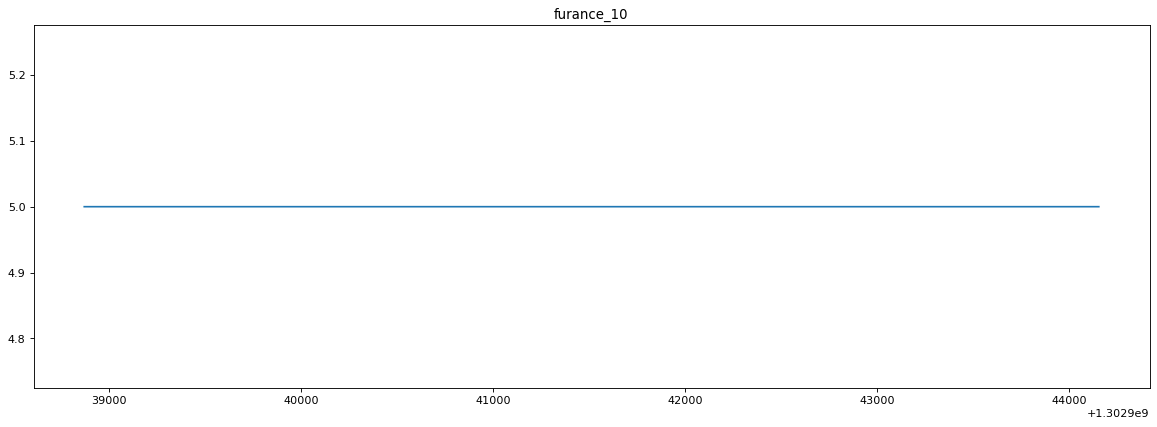

In [217]:
seccion = dispositivo_H3L10.iloc[1800:3200, :]
tiempo = seccion['UTC_Unix']
potencia =  seccion[seccion.columns[1]]
#Grafica tiempo vs potencia
plt.figure(figsize=(18, 6), dpi=80)
plt.plot(tiempo, potencia)
plt.title(seccion.columns[1])
plt.show()

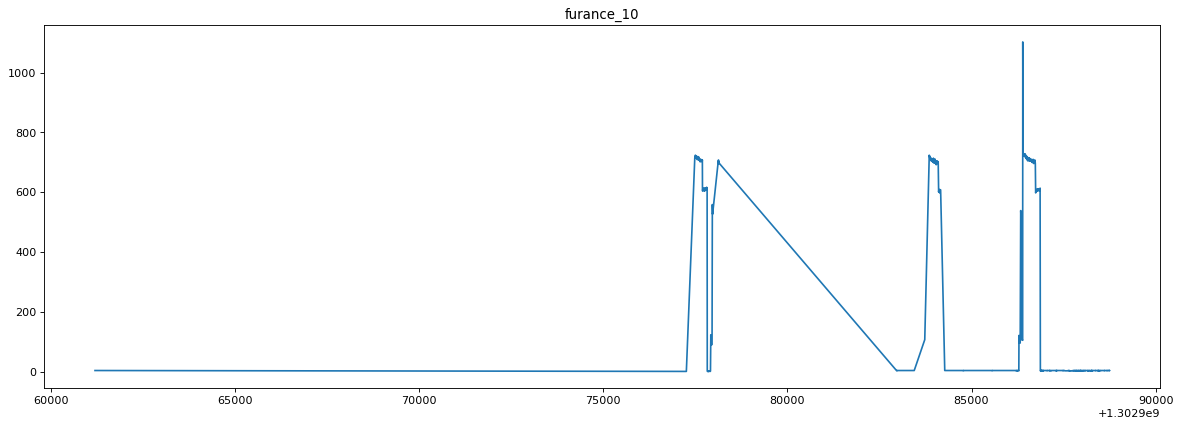

In [243]:
seccion = dispositivo_H3L10.iloc[6870:8350, :]
tiempo = seccion['UTC_Unix']
potencia =  seccion[seccion.columns[1]]
#Grafica tiempo vs potencia
plt.figure(figsize=(18, 6), dpi=80)
plt.plot(tiempo, potencia)
plt.title(seccion.columns[1])
plt.show()

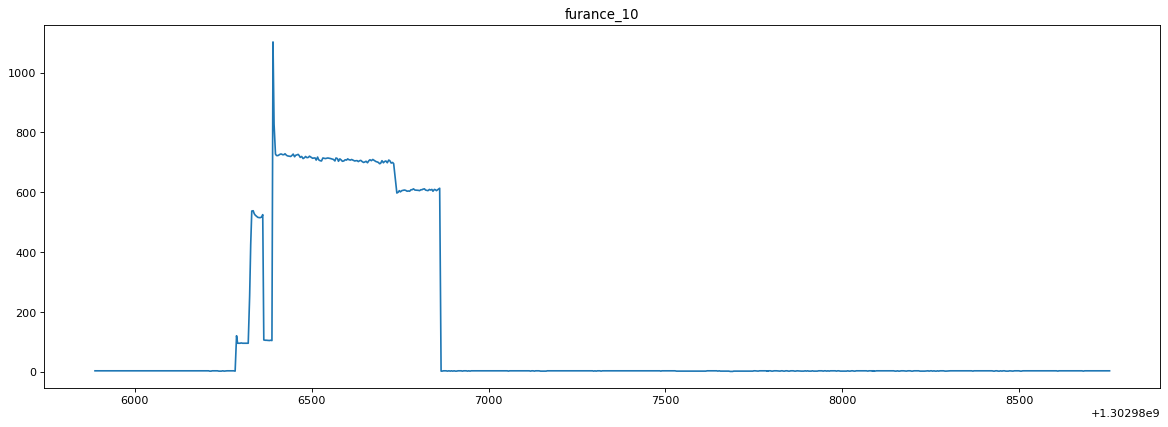

In [245]:
seccion = dispositivo_H3L10.iloc[7611:8352, :]
tiempo = seccion['UTC_Unix']
potencia =  seccion[seccion.columns[1]]
#Grafica tiempo vs potencia
plt.figure(figsize=(18, 6), dpi=80)
plt.plot(tiempo, potencia)
plt.title(seccion.columns[1])
plt.show()

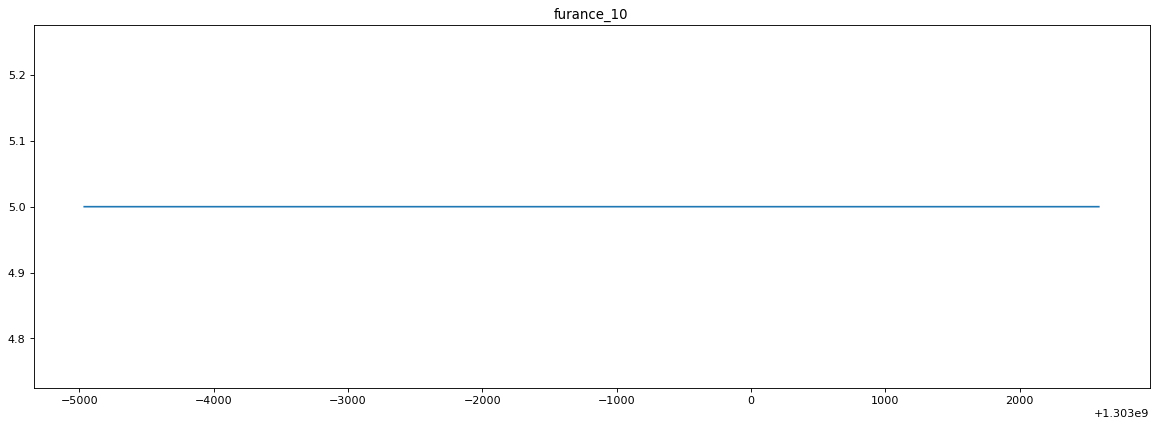

In [244]:
seccion = dispositivo_H3L10.iloc[10000:12000, :]
tiempo = seccion['UTC_Unix']
potencia =  seccion[seccion.columns[1]]
#Grafica tiempo vs potencia
plt.figure(figsize=(18, 6), dpi=80)
plt.plot(tiempo, potencia)
plt.title(seccion.columns[1])
plt.show()

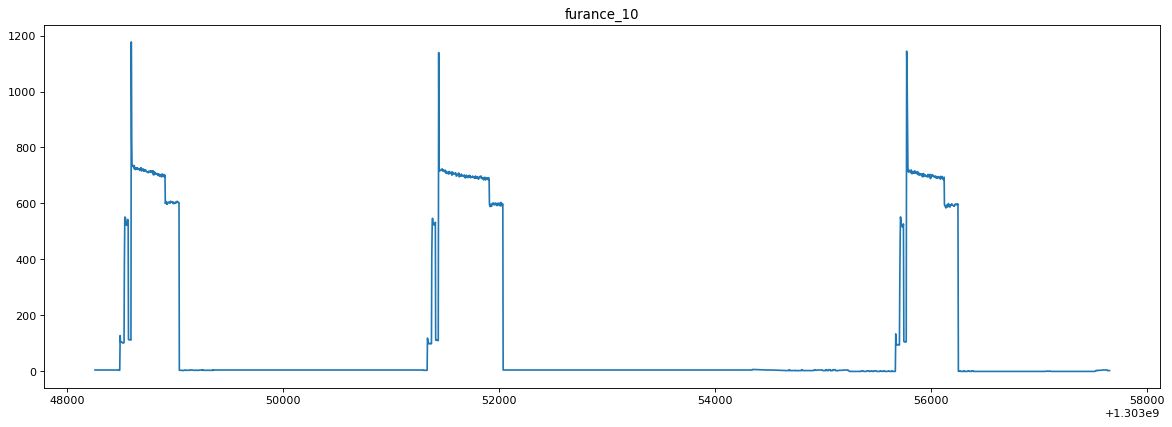

In [251]:
seccion = dispositivo_H3L10.iloc[14000:16000, :]
tiempo = seccion['UTC_Unix']
potencia =  seccion[seccion.columns[1]]
#Grafica tiempo vs potencia
plt.figure(figsize=(18, 6), dpi=80)
plt.plot(tiempo, potencia)
plt.title(seccion.columns[1])
plt.show()

**Conclusión:** hOrno On >10 Off <10

**11: lighting_11**

In [252]:
media = dispositivo_H3L11[labels_casa_3[11]].mean() #Promedio media
mediana = dispositivo_H3L11[labels_casa_3[11]].median() #Dato central mediana
moda = dispositivo_H3L11[labels_casa_3[11]].mode()
maximo = dispositivo_H3L11[labels_casa_3[11]].max()
minimo = dispositivo_H3L11[labels_casa_3[11]].min()
print(f'\nmedia = {media} \nmediana = {mediana} \nmoda = {moda} \nmax = {maximo} \nmin  = {minimo}')


media = 40.44318707669009 
mediana = 0.0 
moda = 0    0.0
dtype: float64 
max = 369.0 
min  = 0.0


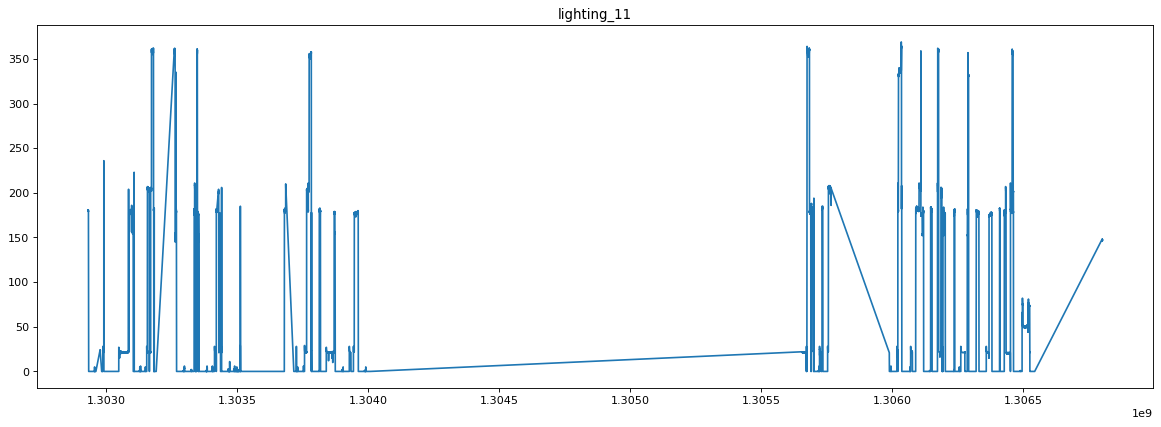

In [253]:
seccion = dispositivo_H3L11.iloc[:, :]
tiempo = seccion['UTC_Unix']
potencia =  seccion[seccion.columns[1]]
#Grafica tiempo vs potencia
plt.figure(figsize=(18, 6), dpi=80)
plt.plot(tiempo, potencia)
plt.title(seccion.columns[1])
plt.show()

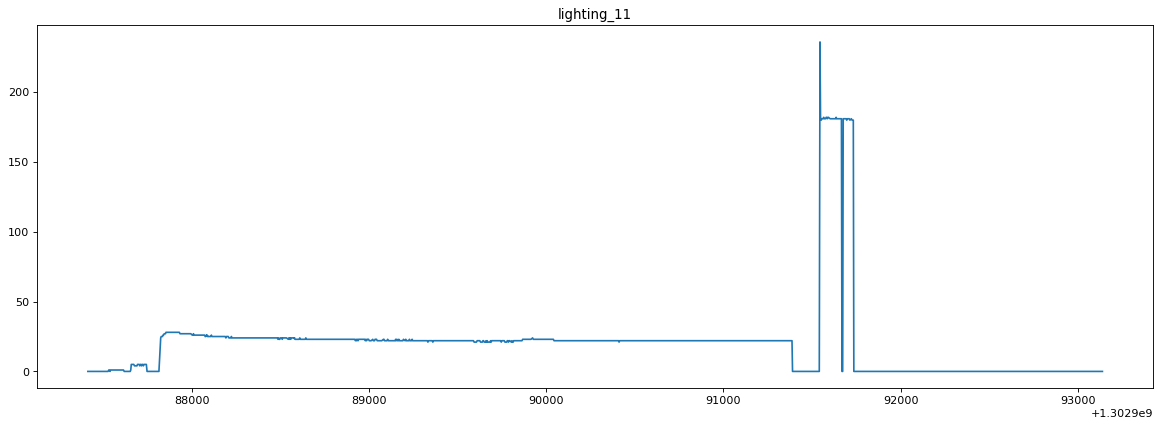

In [264]:
seccion = dispositivo_H3L11.iloc[8000:9500, :]
tiempo = seccion['UTC_Unix']
potencia =  seccion[seccion.columns[1]]
#Grafica tiempo vs potencia
plt.figure(figsize=(18, 6), dpi=80)
plt.plot(tiempo, potencia)
plt.title(seccion.columns[1])
plt.show()

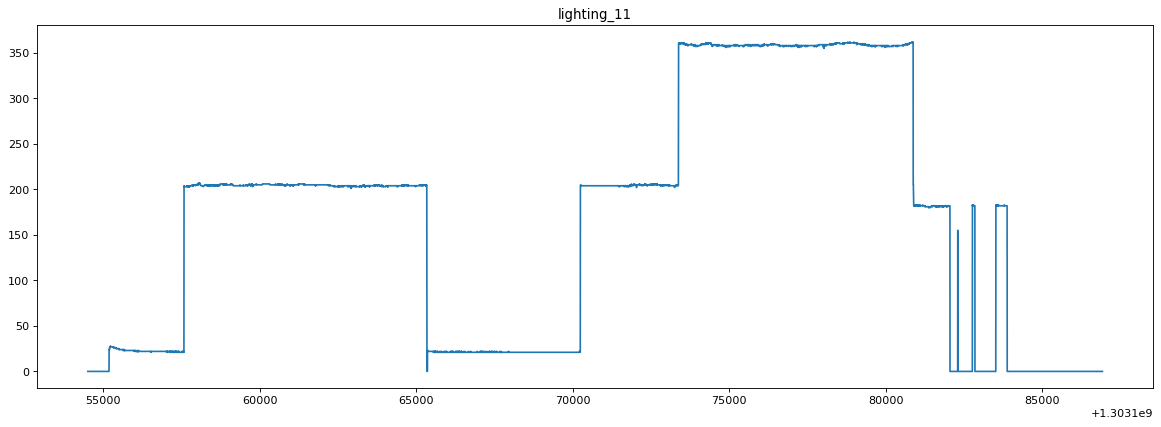

In [265]:
seccion = dispositivo_H3L11.iloc[40000:48000, :]
tiempo = seccion['UTC_Unix']
potencia =  seccion[seccion.columns[1]]
#Grafica tiempo vs potencia
plt.figure(figsize=(18, 6), dpi=80)
plt.plot(tiempo, potencia)
plt.title(seccion.columns[1])
plt.show()

**Conclusión:** La iluminacion cuando se apaga se queda con un valor en la potencia de 0, entonces On >0 Off = 0

**12: outlets_unknown_12**

In [266]:
media = dispositivo_H3L12[labels_casa_3[12]].mean() #Promedio media
mediana = dispositivo_H3L12[labels_casa_3[12]].median() #Dato central mediana
moda = dispositivo_H3L12[labels_casa_3[12]].mode()
maximo = dispositivo_H3L12[labels_casa_3[12]].max()
minimo = dispositivo_H3L12[labels_casa_3[12]].min()
print(f'\nmedia = {media} \nmediana = {mediana} \nmoda = {moda} \nmax = {maximo} \nmin  = {minimo}')


media = 3.6890551264887765 
mediana = 0.0 
moda = 0    0.0
dtype: float64 
max = 923.0 
min  = 0.0


In [269]:
dispositivo_H3L12.shape

(404107, 2)

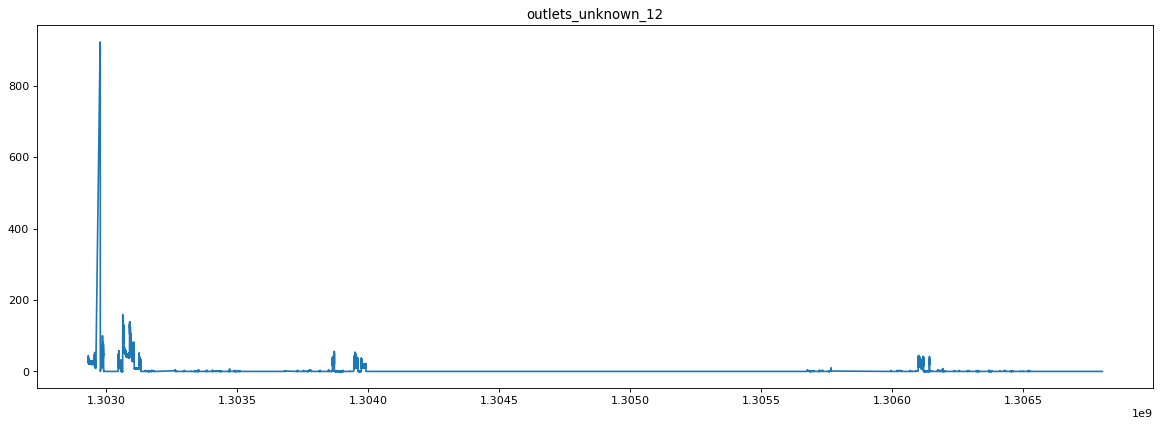

In [267]:
seccion = dispositivo_H3L12.iloc[:, :]
tiempo = seccion['UTC_Unix']
potencia =  seccion[seccion.columns[1]]
#Grafica tiempo vs potencia
plt.figure(figsize=(18, 6), dpi=80)
plt.plot(tiempo, potencia)
plt.title(seccion.columns[1])
plt.show()

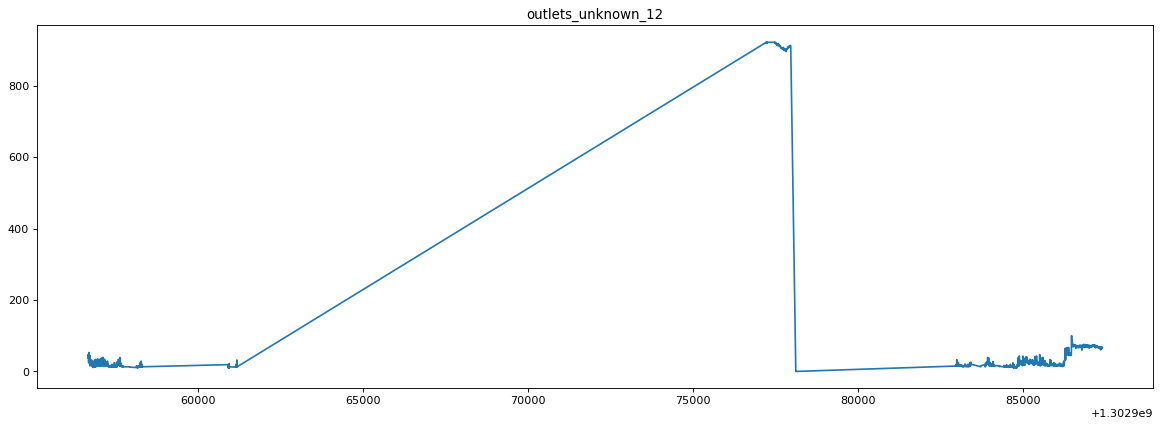

In [275]:
seccion = dispositivo_H3L12.iloc[6500:8000, :]
tiempo = seccion['UTC_Unix']
potencia =  seccion[seccion.columns[1]]
#Grafica tiempo vs potencia
plt.figure(figsize=(18, 6), dpi=80)
plt.plot(tiempo, potencia)
plt.title(seccion.columns[1])
plt.show()

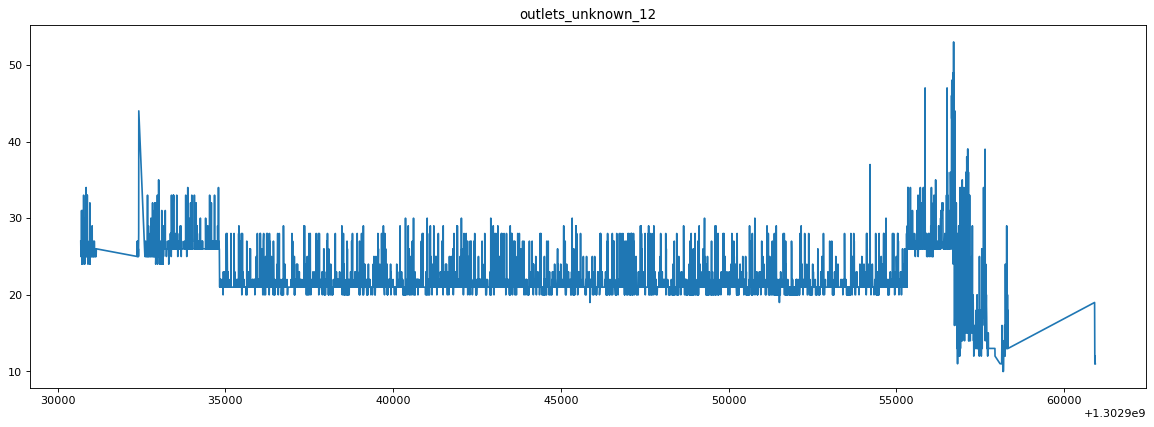

In [289]:
seccion = dispositivo_H3L12.iloc[:6850, :]
tiempo = seccion['UTC_Unix']
potencia =  seccion[seccion.columns[1]]
#Grafica tiempo vs potencia
plt.figure(figsize=(18, 6), dpi=80)
plt.plot(tiempo, potencia)
plt.title(seccion.columns[1])
plt.show()

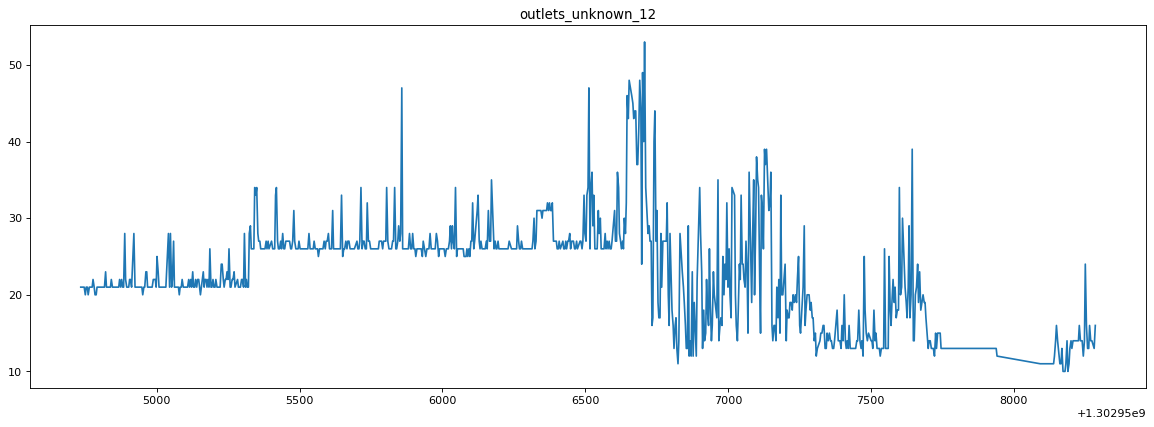

In [291]:
seccion = dispositivo_H3L12.iloc[6000:6830, :]
tiempo = seccion['UTC_Unix']
potencia =  seccion[seccion.columns[1]]
#Grafica tiempo vs potencia
plt.figure(figsize=(18, 6), dpi=80)
plt.plot(tiempo, potencia)
plt.title(seccion.columns[1])
plt.show()

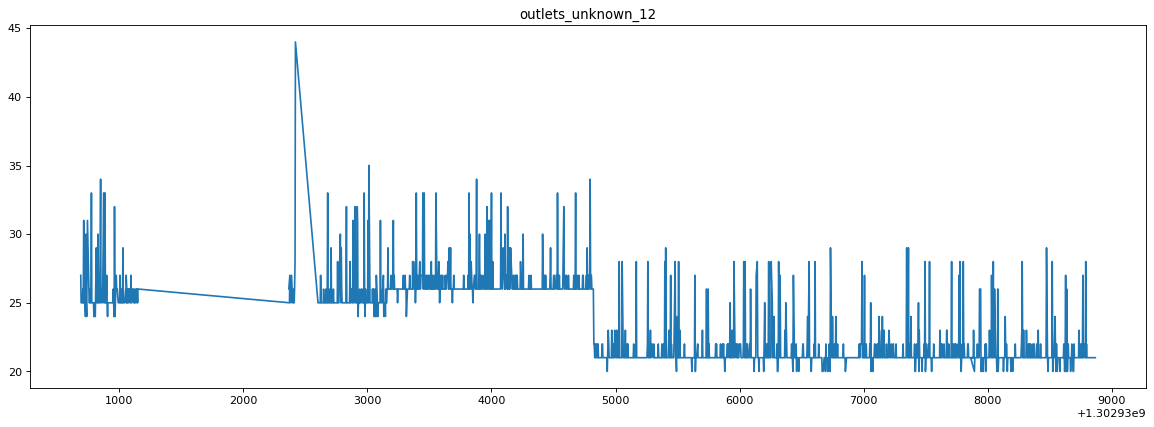

In [85]:
seccion = dispositivo_H3L12.iloc[:1800, :]
tiempo = seccion['UTC_Unix']
potencia =  seccion[seccion.columns[1]]
#Grafica tiempo vs potencia
plt.figure(figsize=(18, 6), dpi=80)
plt.plot(tiempo, potencia)
plt.title(seccion.columns[1])
plt.show()

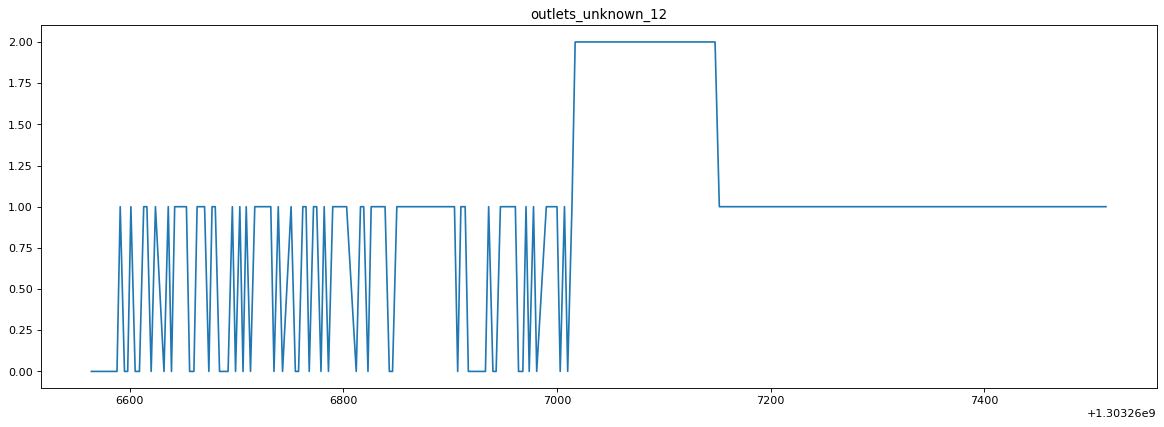

In [294]:
seccion = dispositivo_H3L12.iloc[50750:51000, :]
tiempo = seccion['UTC_Unix']
potencia =  seccion[seccion.columns[1]]
#Grafica tiempo vs potencia
plt.figure(figsize=(18, 6), dpi=80)
plt.plot(tiempo, potencia)
plt.title(seccion.columns[1])
plt.show()

**Conclusión:** Este es un tomacorriente con electrodomestico desconocido, se puede pensar por medio de la inspección grafica y del comportamiento de algunas secciones de datos, que su estado de encendido es por encima de 0 y apagado sera mayor a cero. On > 0 Off = 0

**13: washer_dryer_13**

In [295]:
media = dispositivo_H3L13[labels_casa_3[13]].mean() #Promedio media
mediana = dispositivo_H3L13[labels_casa_3[13]].median() #Dato central mediana
moda = dispositivo_H3L13[labels_casa_3[13]].mode()
maximo = dispositivo_H3L13[labels_casa_3[13]].max()
minimo = dispositivo_H3L13[labels_casa_3[13]].min()
print(f'\nmedia = {media} \nmediana = {mediana} \nmoda = {moda} \nmax = {maximo} \nmin  = {minimo}')


media = 33.71518558203644 
mediana = 0.0 
moda = 0    0.0
dtype: float64 
max = 2707.5 
min  = 0.0


In [298]:
dispositivo_H3L13.shape

(404107, 2)

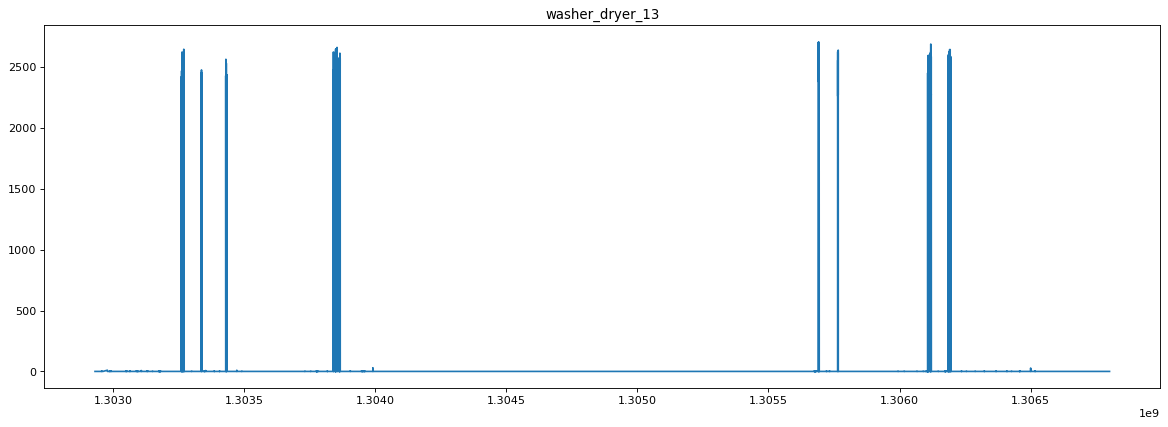

In [296]:
seccion = dispositivo_H3L13.iloc[:, :]
tiempo = seccion['UTC_Unix']
potencia =  seccion[seccion.columns[1]]
#Grafica tiempo vs potencia
plt.figure(figsize=(18, 6), dpi=80)
plt.plot(tiempo, potencia)
plt.title(seccion.columns[1])
plt.show()

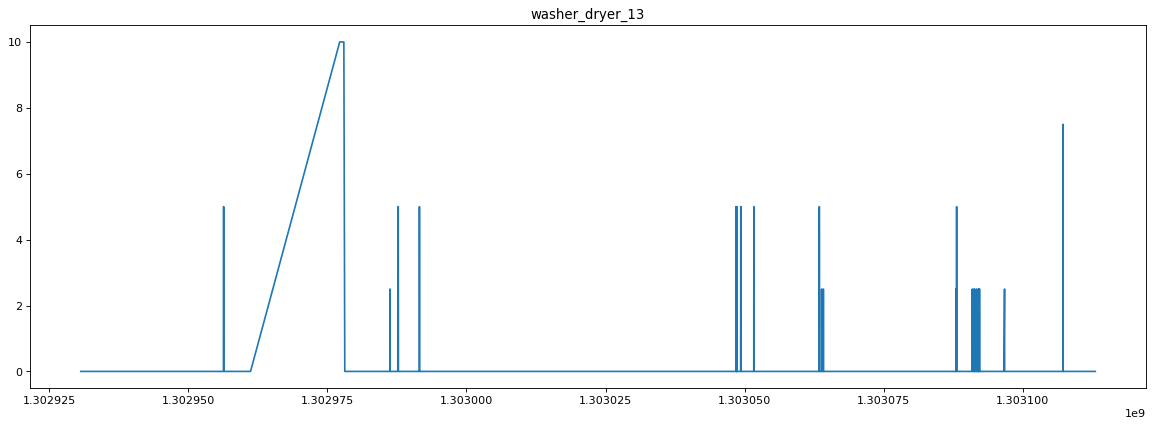

In [300]:
seccion = dispositivo_H3L13.iloc[:30000, :]
tiempo = seccion['UTC_Unix']
potencia =  seccion[seccion.columns[1]]
#Grafica tiempo vs potencia
plt.figure(figsize=(18, 6), dpi=80)
plt.plot(tiempo, potencia)
plt.title(seccion.columns[1])
plt.show()

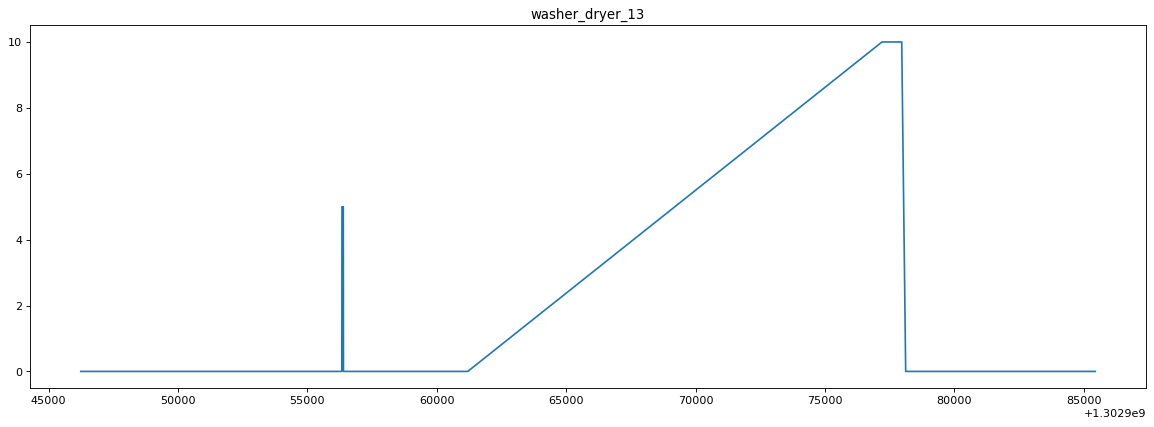

In [301]:
seccion = dispositivo_H3L13.iloc[3750:7500, :]
tiempo = seccion['UTC_Unix']
potencia =  seccion[seccion.columns[1]]
#Grafica tiempo vs potencia
plt.figure(figsize=(18, 6), dpi=80)
plt.plot(tiempo, potencia)
plt.title(seccion.columns[1])
plt.show()

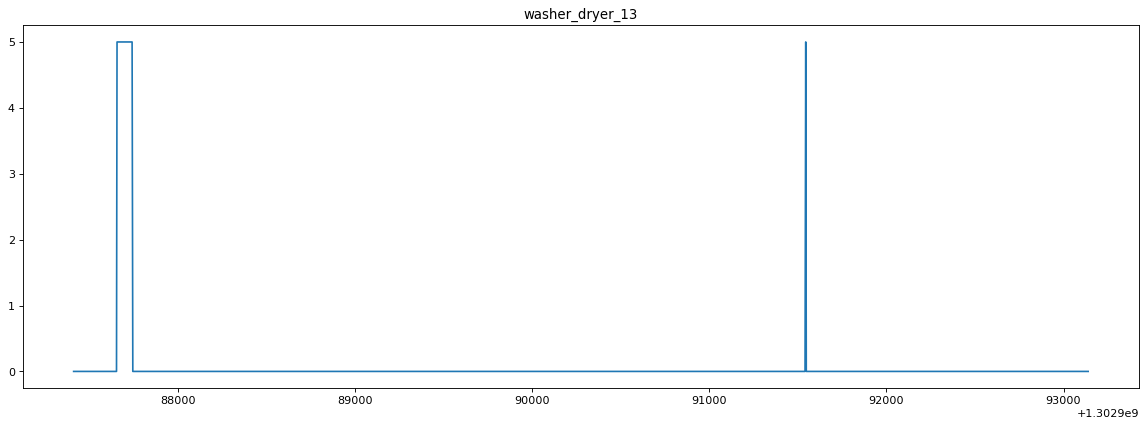

In [304]:
seccion = dispositivo_H3L13.iloc[8000:9500, :]
tiempo = seccion['UTC_Unix']
potencia =  seccion[seccion.columns[1]]
#Grafica tiempo vs potencia
plt.figure(figsize=(18, 6), dpi=80)
plt.plot(tiempo, potencia)
plt.title(seccion.columns[1])
plt.show()

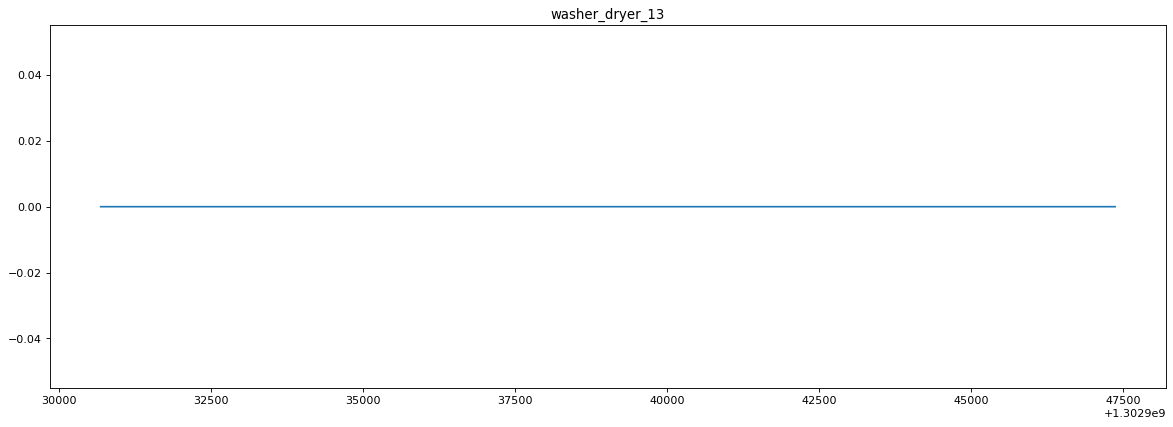

In [303]:
seccion = dispositivo_H3L13.iloc[:4050, :]
tiempo = seccion['UTC_Unix']
potencia =  seccion[seccion.columns[1]]
#Grafica tiempo vs potencia
plt.figure(figsize=(18, 6), dpi=80)
plt.plot(tiempo, potencia)
plt.title(seccion.columns[1])
plt.show()

**Conclusión:** La lavadora secadora On > 0 Off = 0

**14: washer_dryer_14**

In [305]:
media = dispositivo_H3L14[labels_casa_3[14]].mean() #Promedio media
mediana = dispositivo_H3L14[labels_casa_3[14]].median() #Dato central mediana
moda = dispositivo_H3L14[labels_casa_3[14]].mode()
maximo = dispositivo_H3L14[labels_casa_3[14]].max()
minimo = dispositivo_H3L14[labels_casa_3[14]].min()
print(f'\nmedia = {media} \nmediana = {mediana} \nmoda = {moda} \nmax = {maximo} \nmin  = {minimo}')


media = 44.02418171424895 
mediana = 0.0 
moda = 0    0.0
dtype: float64 
max = 4007.5 
min  = 0.0


In [308]:
dispositivo_H3L14.shape

(404107, 2)

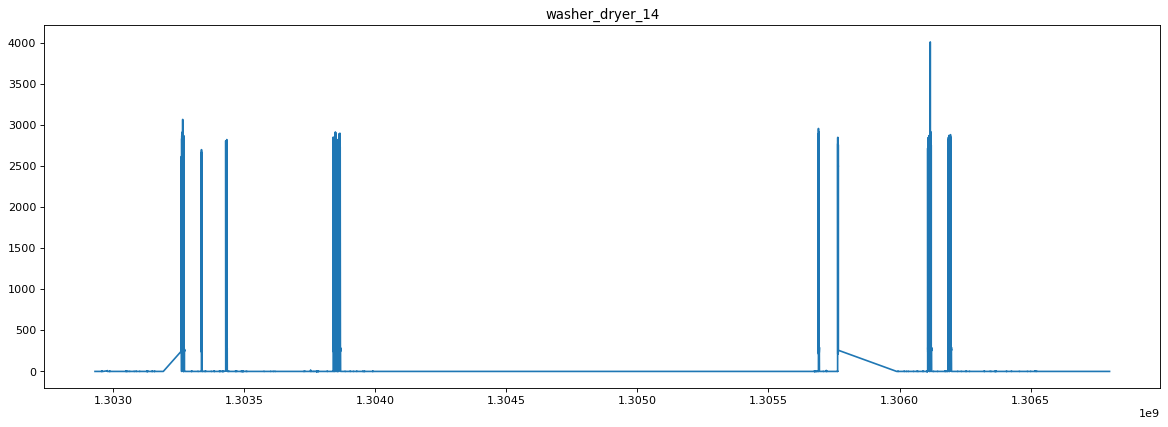

In [307]:
seccion = dispositivo_H3L14.iloc[:, :]
tiempo = seccion['UTC_Unix']
potencia =  seccion[seccion.columns[1]]
#Grafica tiempo vs potencia
plt.figure(figsize=(18, 6), dpi=80)
plt.plot(tiempo, potencia)
plt.title(seccion.columns[1])
plt.show()

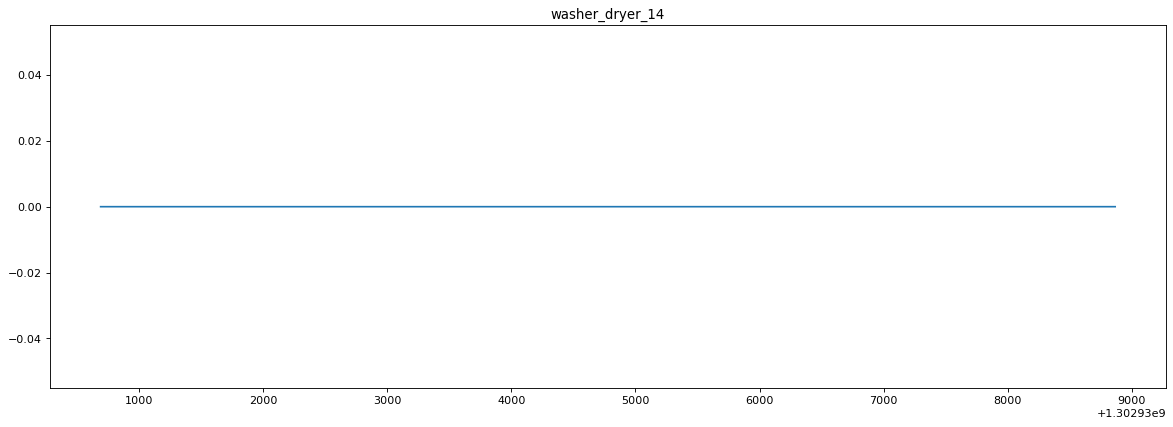

In [309]:
seccion = dispositivo_H3L14.iloc[:1800, :]
tiempo = seccion['UTC_Unix']
potencia =  seccion[seccion.columns[1]]
#Grafica tiempo vs potencia
plt.figure(figsize=(18, 6), dpi=80)
plt.plot(tiempo, potencia)
plt.title(seccion.columns[1])
plt.show()

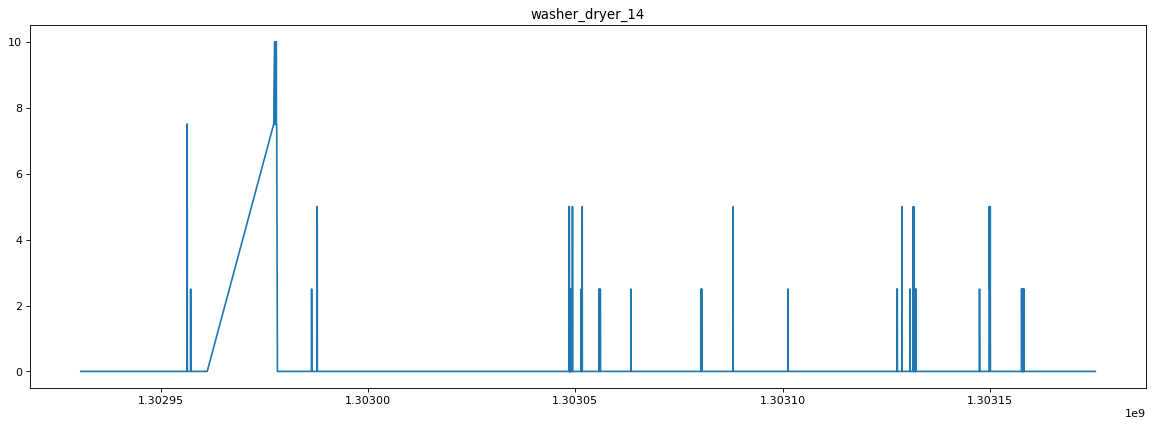

In [313]:
seccion = dispositivo_H3L14.iloc[:45000, :]
tiempo = seccion['UTC_Unix']
potencia =  seccion[seccion.columns[1]]
#Grafica tiempo vs potencia
plt.figure(figsize=(18, 6), dpi=80)
plt.plot(tiempo, potencia)
plt.title(seccion.columns[1])
plt.show()

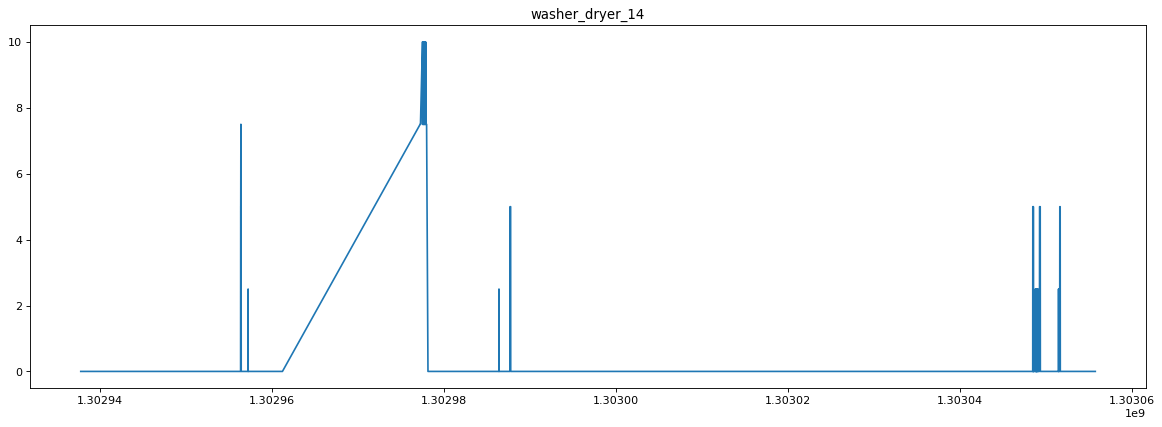

In [318]:
seccion = dispositivo_H3L14.iloc[1500:15500, :]
tiempo = seccion['UTC_Unix']
potencia =  seccion[seccion.columns[1]]
#Grafica tiempo vs potencia
plt.figure(figsize=(18, 6), dpi=80)
plt.plot(tiempo, potencia)
plt.title(seccion.columns[1])
plt.show()

**Conclusión:** On > 1 Off = 0

15: lighting_15

In [319]:
media = dispositivo_H3L15[labels_casa_3[15]].mean() #Promedio media
mediana = dispositivo_H3L15[labels_casa_3[15]].median() #Dato central mediana
moda = dispositivo_H3L15[labels_casa_3[15]].mode()
maximo = dispositivo_H3L15[labels_casa_3[15]].max()
minimo = dispositivo_H3L15[labels_casa_3[15]].min()
print(f'\nmedia = {media} \nmediana = {mediana} \nmoda = {moda} \nmax = {maximo} \nmin  = {minimo}')


media = 0.17449586371926248 
mediana = 0.0 
moda = 0    0.0
dtype: float64 
max = 49.0 
min  = 0.0


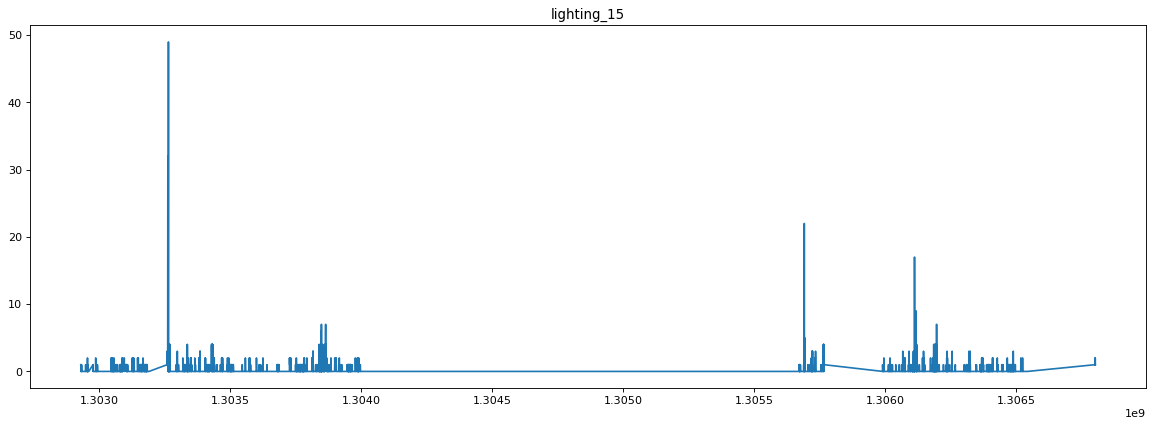

In [321]:
seccion = dispositivo_H3L15.iloc[:, :]
tiempo = seccion['UTC_Unix']
potencia =  seccion[seccion.columns[1]]
#Grafica tiempo vs potencia
plt.figure(figsize=(18, 6), dpi=80)
plt.plot(tiempo, potencia)
plt.title(seccion.columns[1])
plt.show()

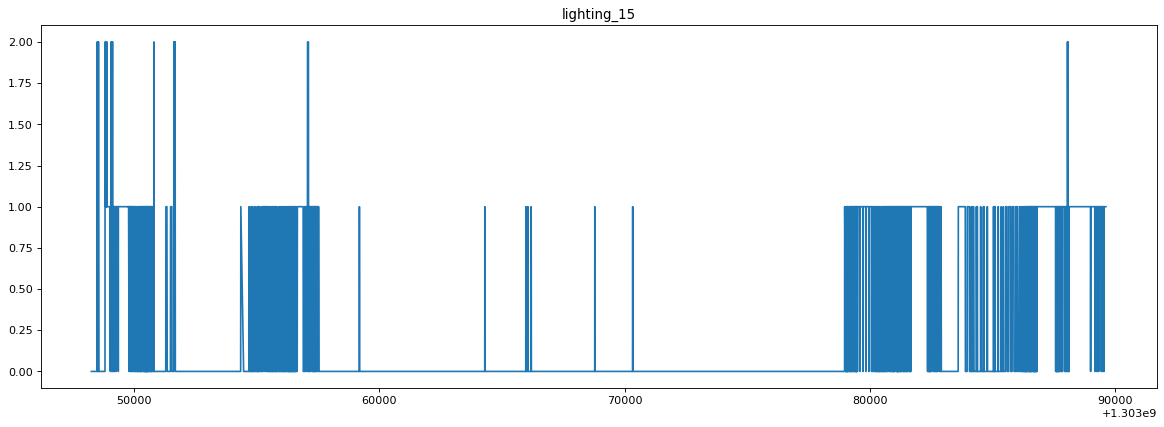

In [323]:
seccion = dispositivo_H3L15.iloc[14000:24000, :]
tiempo = seccion['UTC_Unix']
potencia =  seccion[seccion.columns[1]]
#Grafica tiempo vs potencia
plt.figure(figsize=(18, 6), dpi=80)
plt.plot(tiempo, potencia)
plt.title(seccion.columns[1])
plt.show()

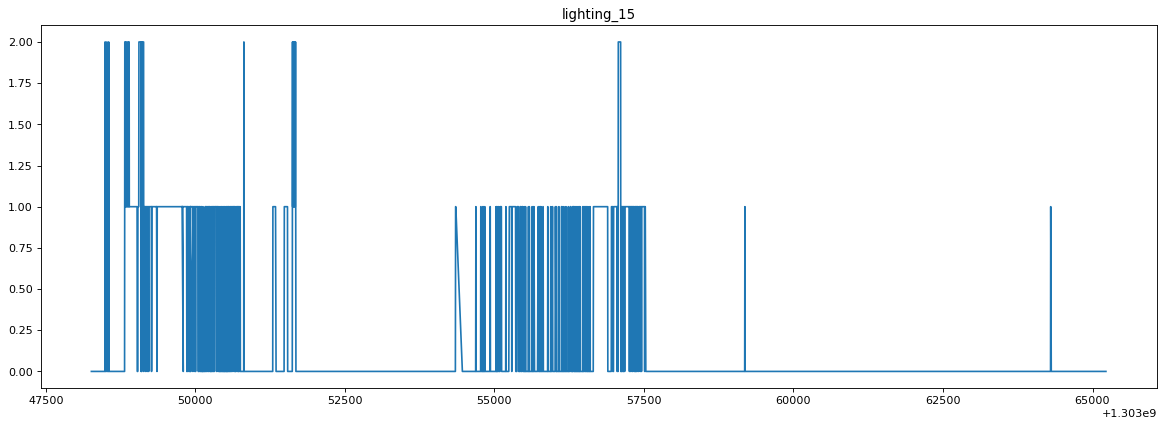

In [324]:
seccion = dispositivo_H3L15.iloc[14000:18000, :]
tiempo = seccion['UTC_Unix']
potencia =  seccion[seccion.columns[1]]
#Grafica tiempo vs potencia
plt.figure(figsize=(18, 6), dpi=80)
plt.plot(tiempo, potencia)
plt.title(seccion.columns[1])
plt.show()

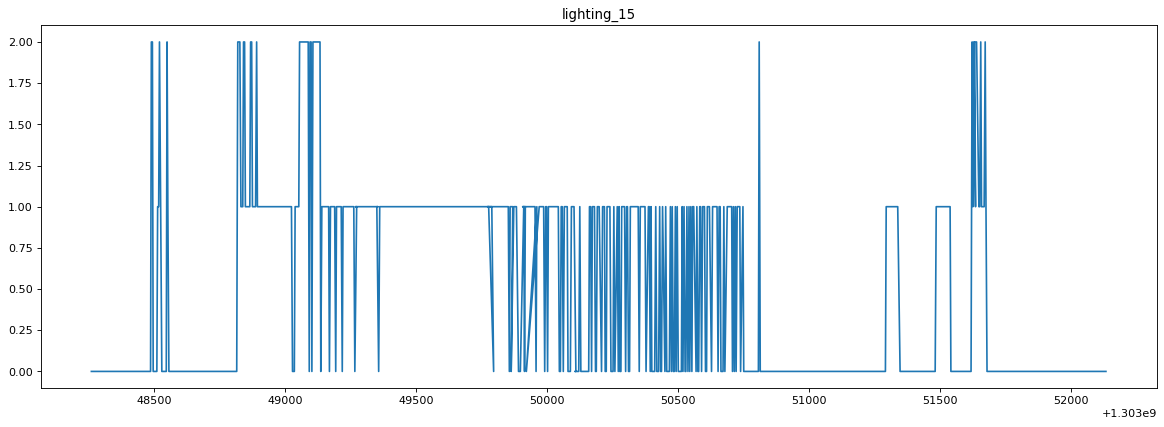

In [326]:
seccion = dispositivo_H3L15.iloc[14000:15000, :]
tiempo = seccion['UTC_Unix']
potencia =  seccion[seccion.columns[1]]
#Grafica tiempo vs potencia
plt.figure(figsize=(18, 6), dpi=80)
plt.plot(tiempo, potencia)
plt.title(seccion.columns[1])
plt.show()

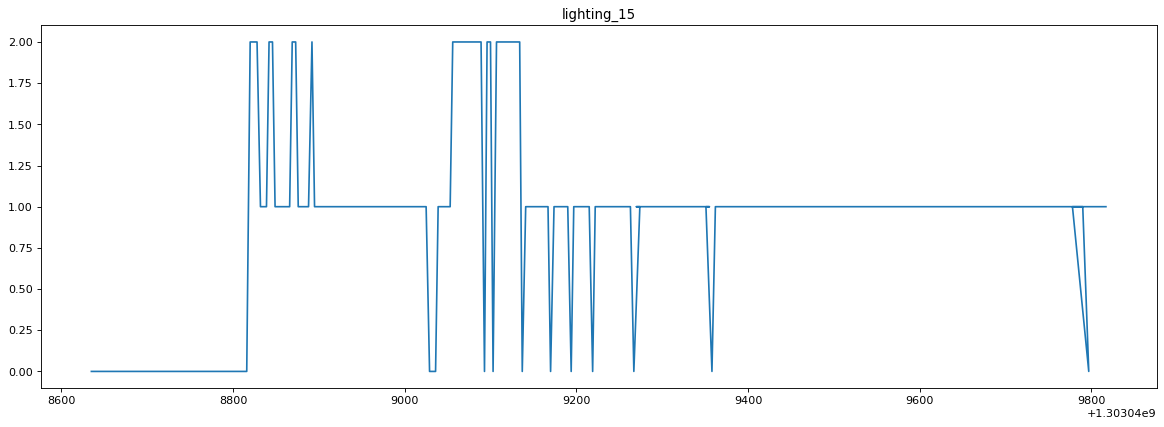

In [327]:
seccion = dispositivo_H3L15.iloc[14100:14400, :]
tiempo = seccion['UTC_Unix']
potencia =  seccion[seccion.columns[1]]
#Grafica tiempo vs potencia
plt.figure(figsize=(18, 6), dpi=80)
plt.plot(tiempo, potencia)
plt.title(seccion.columns[1])
plt.show()

**Conclusión:** On > 0 Off = 0

**16: microwave_16**

In [328]:
media = dispositivo_H3L16[labels_casa_3[16]].mean() #Promedio media
mediana = dispositivo_H3L16[labels_casa_3[16]].median() #Dato central mediana
moda = dispositivo_H3L16[labels_casa_3[16]].mode()
maximo = dispositivo_H3L16[labels_casa_3[16]].max()
minimo = dispositivo_H3L16[labels_casa_3[16]].min()
print(f'\nmedia = {media} \nmediana = {mediana} \nmoda = {moda} \nmax = {maximo} \nmin  = {minimo}')


media = 8.227419965504186 
mediana = 2.0 
moda = 0    2.0
dtype: float64 
max = 1817.0 
min  = 0.0


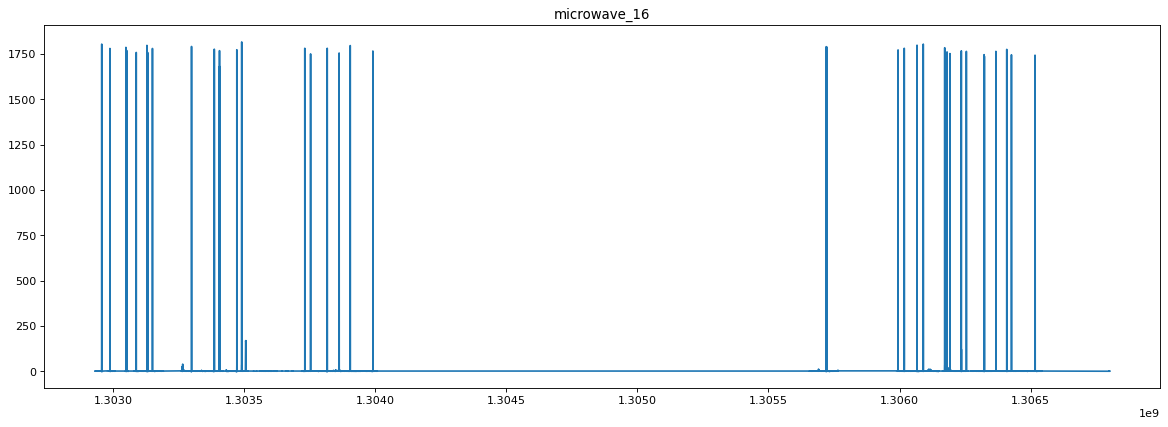

In [329]:
seccion = dispositivo_H3L16.iloc[:, :]
tiempo = seccion['UTC_Unix']
potencia =  seccion[seccion.columns[1]]
#Grafica tiempo vs potencia
plt.figure(figsize=(18, 6), dpi=80)
plt.plot(tiempo, potencia)
plt.title(seccion.columns[1])
plt.show()

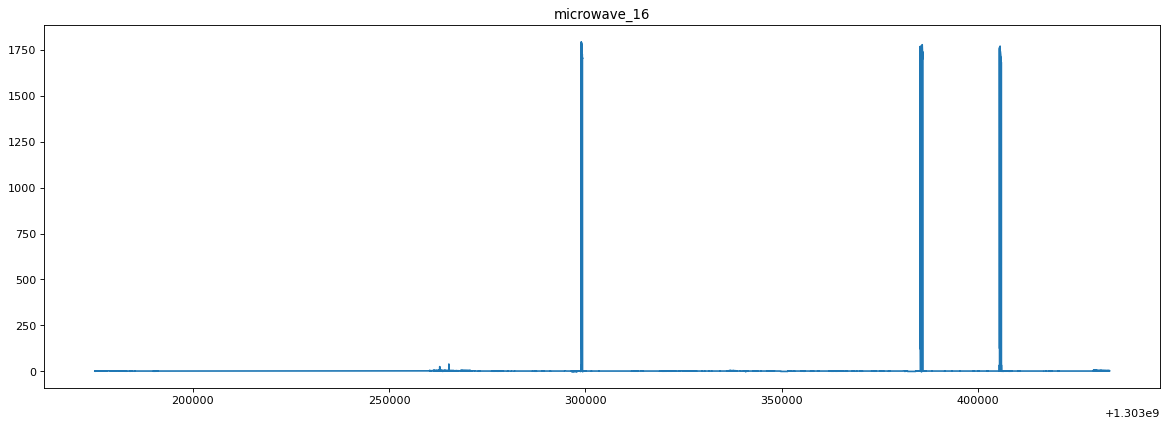

In [330]:
seccion = dispositivo_H3L16.iloc[44900:89800, :]
tiempo = seccion['UTC_Unix']
potencia =  seccion[seccion.columns[1]]
#Grafica tiempo vs potencia
plt.figure(figsize=(18, 6), dpi=80)
plt.plot(tiempo, potencia)
plt.title(seccion.columns[1])
plt.show()

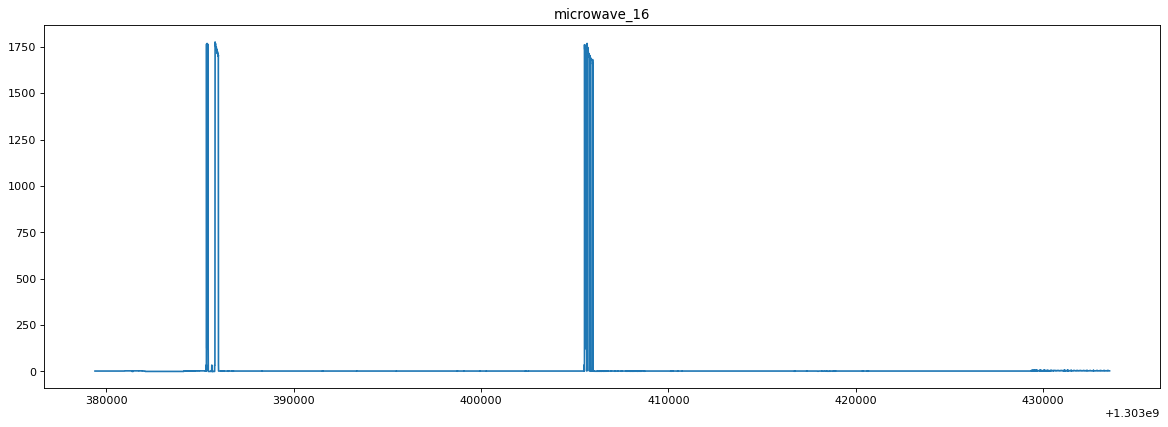

In [336]:
seccion = dispositivo_H3L16.iloc[77350:89800, :]
tiempo = seccion['UTC_Unix']
potencia =  seccion[seccion.columns[1]]
#Grafica tiempo vs potencia
plt.figure(figsize=(18, 6), dpi=80)
plt.plot(tiempo, potencia)
plt.title(seccion.columns[1])
plt.show()

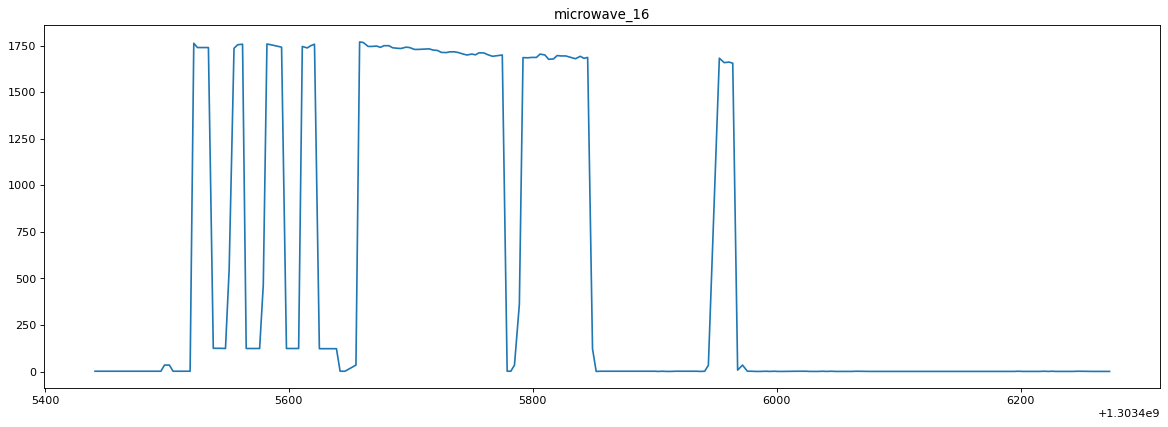

In [344]:
seccion = dispositivo_H3L16.iloc[84220:84440, :]
tiempo = seccion['UTC_Unix']
potencia =  seccion[seccion.columns[1]]
#Grafica tiempo vs potencia
plt.figure(figsize=(18, 6), dpi=80)
plt.plot(tiempo, potencia)
plt.title(seccion.columns[1])
plt.show()

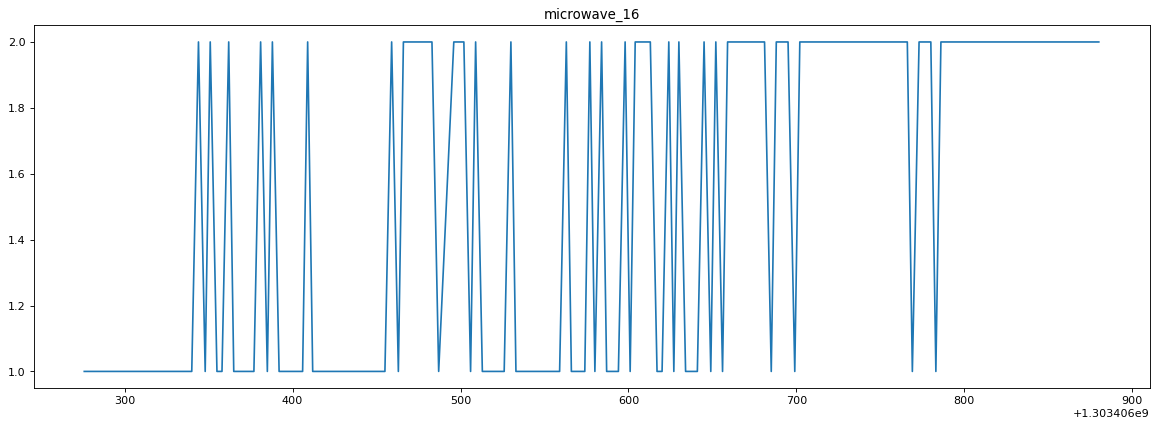

In [345]:
seccion = dispositivo_H3L16.iloc[84440:84600, :]
tiempo = seccion['UTC_Unix']
potencia =  seccion[seccion.columns[1]]
#Grafica tiempo vs potencia
plt.figure(figsize=(18, 6), dpi=80)
plt.plot(tiempo, potencia)
plt.title(seccion.columns[1])
plt.show()

**Conclusión:** On > 2 Off <= 2

**17: lighting_17**

In [140]:
media = dispositivo_H3L17[labels_casa_3[17]].mean() #Promedio media
mediana = dispositivo_H3L17[labels_casa_3[17]].median() #Dato central mediana
moda = dispositivo_H3L17[labels_casa_3[17]].mode()
maximo = dispositivo_H3L17[labels_casa_3[17]].max()
minimo = dispositivo_H3L17[labels_casa_3[17]].min()
print(f'\nmedia = {media} \nmediana = {mediana} \nmoda = {moda} \nmax = {maximo} \nmin  = {minimo}')


media = 35.85641921570277 
mediana = 0.0 
moda = 0    0.0
dtype: float64 
max = 447.0 
min  = 0.0


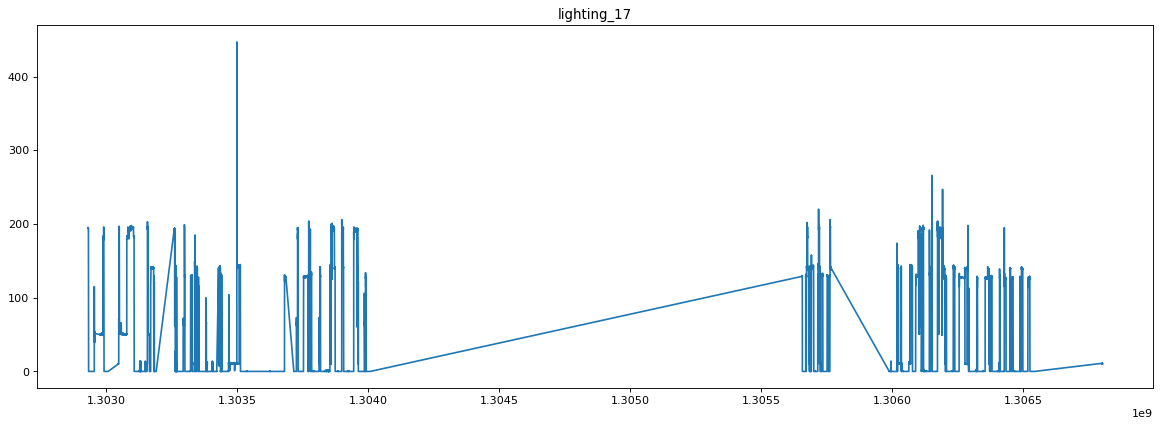

In [346]:
seccion = dispositivo_H3L17.iloc[:, :]
tiempo = seccion['UTC_Unix']
potencia =  seccion[seccion.columns[1]]
#Grafica tiempo vs potencia
plt.figure(figsize=(18, 6), dpi=80)
plt.plot(tiempo, potencia)
plt.title(seccion.columns[1])
plt.show()

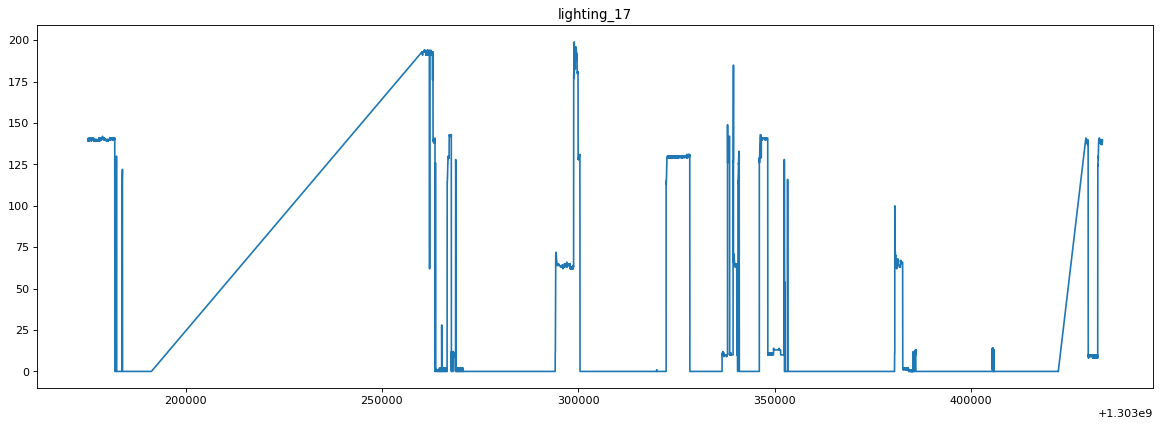

In [347]:
seccion = dispositivo_H3L17.iloc[44900:89801, :]
tiempo = seccion['UTC_Unix']
potencia =  seccion[seccion.columns[1]]
#Grafica tiempo vs potencia
plt.figure(figsize=(18, 6), dpi=80)
plt.plot(tiempo, potencia)
plt.title(seccion.columns[1])
plt.show()

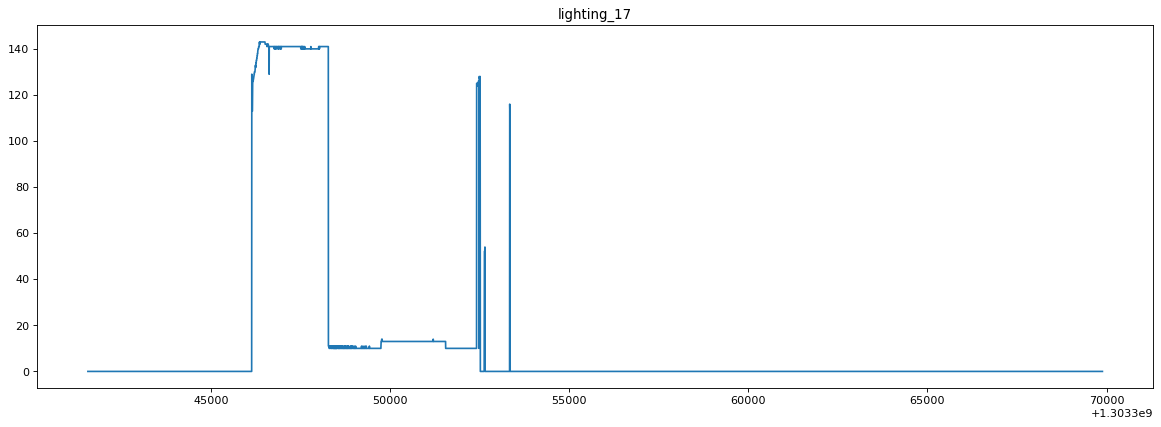

In [349]:
seccion = dispositivo_H3L17.iloc[67350:74833, :]
tiempo = seccion['UTC_Unix']
potencia =  seccion[seccion.columns[1]]
#Grafica tiempo vs potencia
plt.figure(figsize=(18, 6), dpi=80)
plt.plot(tiempo, potencia)
plt.title(seccion.columns[1])
plt.show()

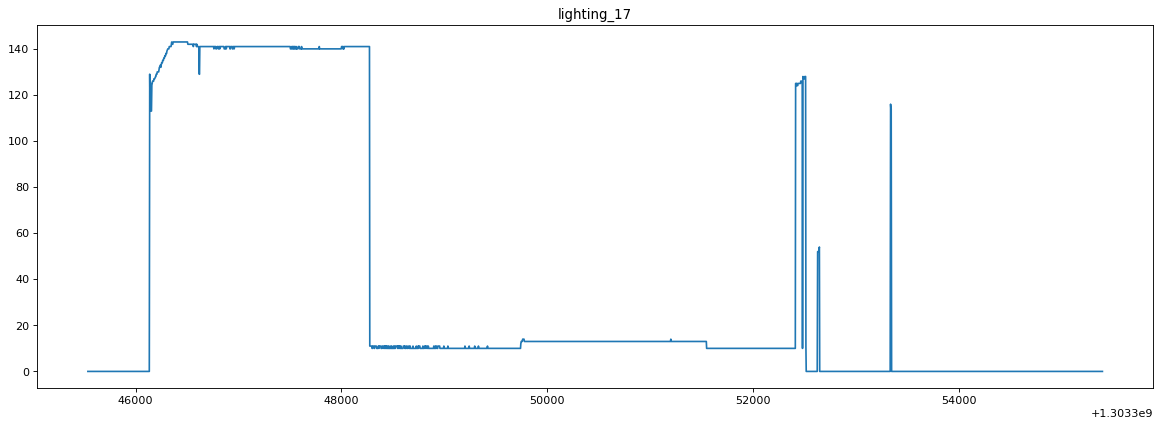

In [352]:
seccion = dispositivo_H3L17.iloc[68400:71000, :]
tiempo = seccion['UTC_Unix']
potencia =  seccion[seccion.columns[1]]
#Grafica tiempo vs potencia
plt.figure(figsize=(18, 6), dpi=80)
plt.plot(tiempo, potencia)
plt.title(seccion.columns[1])
plt.show()

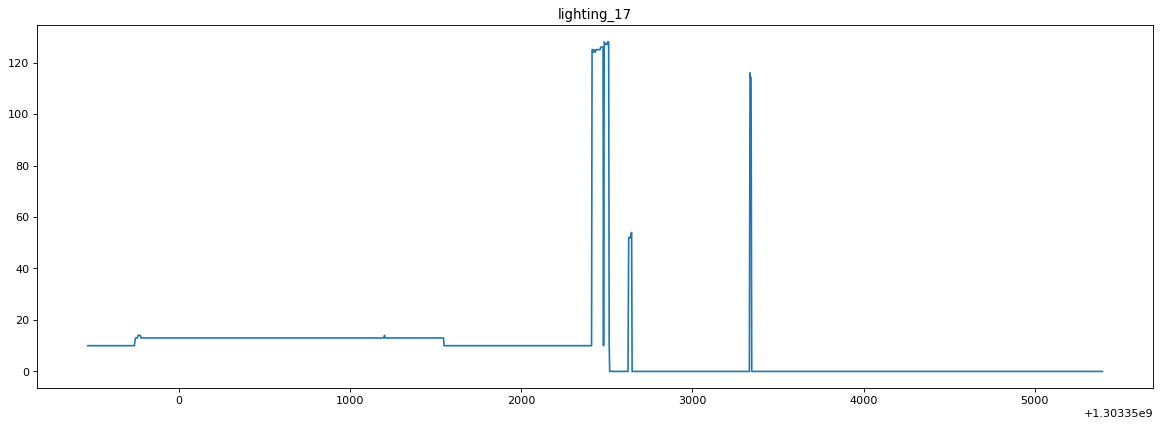

In [354]:
seccion = dispositivo_H3L17.iloc[69440:71000, :]
tiempo = seccion['UTC_Unix']
potencia =  seccion[seccion.columns[1]]
#Grafica tiempo vs potencia
plt.figure(figsize=(18, 6), dpi=80)
plt.plot(tiempo, potencia)
plt.title(seccion.columns[1])
plt.show()

**Conclusión:** ON > 5 Off <=5

18: **smoke_alarms_18**

In [355]:
media = dispositivo_H3L18[labels_casa_3[18]].mean() #Promedio media
mediana = dispositivo_H3L18[labels_casa_3[18]].median() #Dato central mediana
moda = dispositivo_H3L18[labels_casa_3[18]].mode()
maximo = dispositivo_H3L18[labels_casa_3[18]].max()
minimo = dispositivo_H3L18[labels_casa_3[18]].min()
print(f'\nmedia = {media} \nmediana = {mediana} \nmoda = {moda} \nmax = {maximo} \nmin  = {minimo}')


media = 0.9308945403073938 
mediana = 1.0 
moda = 0    1.0
dtype: float64 
max = 44.0 
min  = 0.0


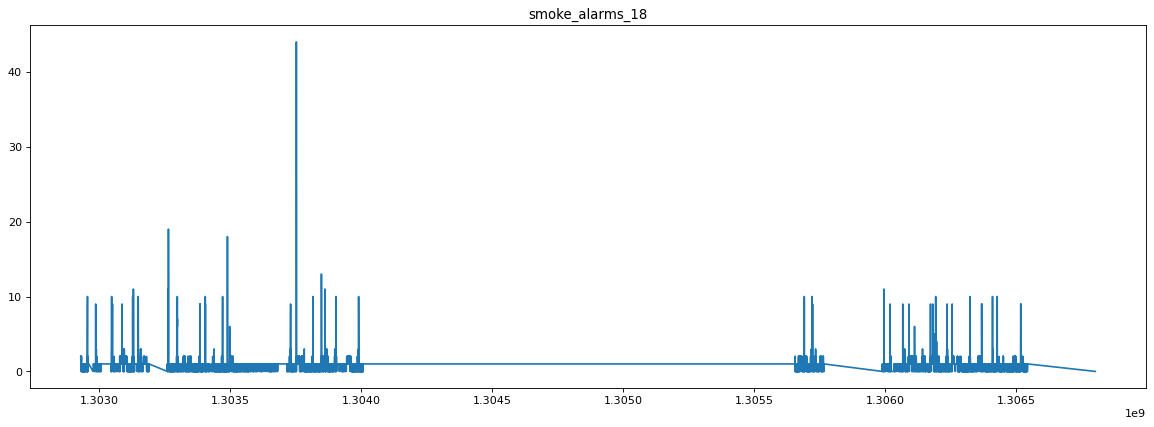

In [357]:
seccion = dispositivo_H3L18.iloc[:, :]
tiempo = seccion['UTC_Unix']
potencia =  seccion[seccion.columns[1]]
#Grafica tiempo vs potencia
plt.figure(figsize=(18, 6), dpi=80)
plt.plot(tiempo, potencia)
plt.title(seccion.columns[1])
plt.show()

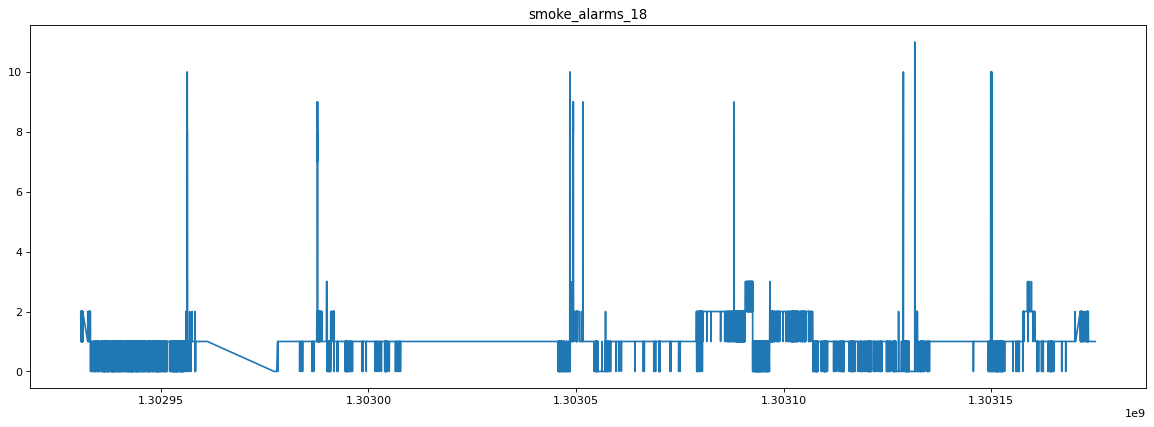

In [358]:
seccion = dispositivo_H3L18.iloc[:44900, :]
tiempo = seccion['UTC_Unix']
potencia =  seccion[seccion.columns[1]]
#Grafica tiempo vs potencia
plt.figure(figsize=(18, 6), dpi=80)
plt.plot(tiempo, potencia)
plt.title(seccion.columns[1])
plt.show()

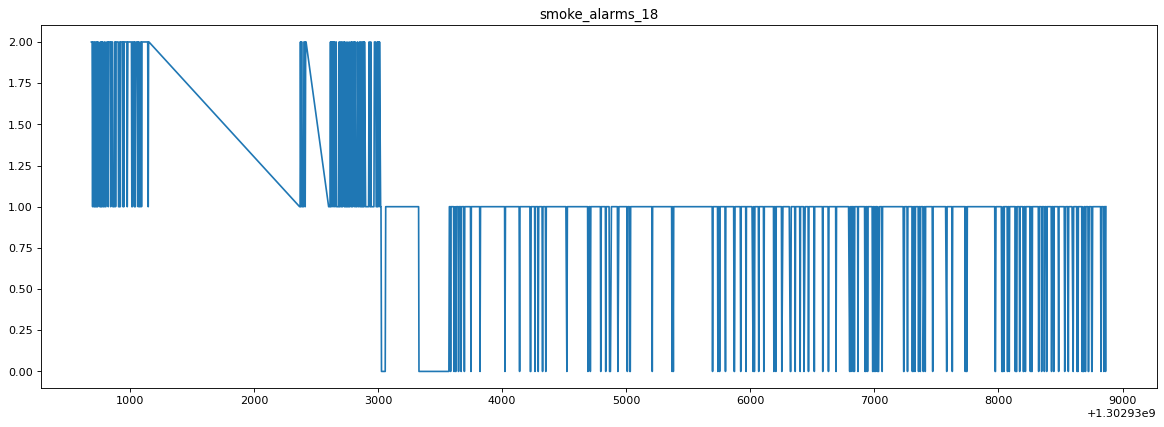

In [93]:
seccion = dispositivo_H3L18.iloc[:1800, :]
tiempo = seccion['UTC_Unix']
potencia =  seccion[seccion.columns[1]]
#Grafica tiempo vs potencia
plt.figure(figsize=(18, 6), dpi=80)
plt.plot(tiempo, potencia)
plt.title(seccion.columns[1])
plt.show()

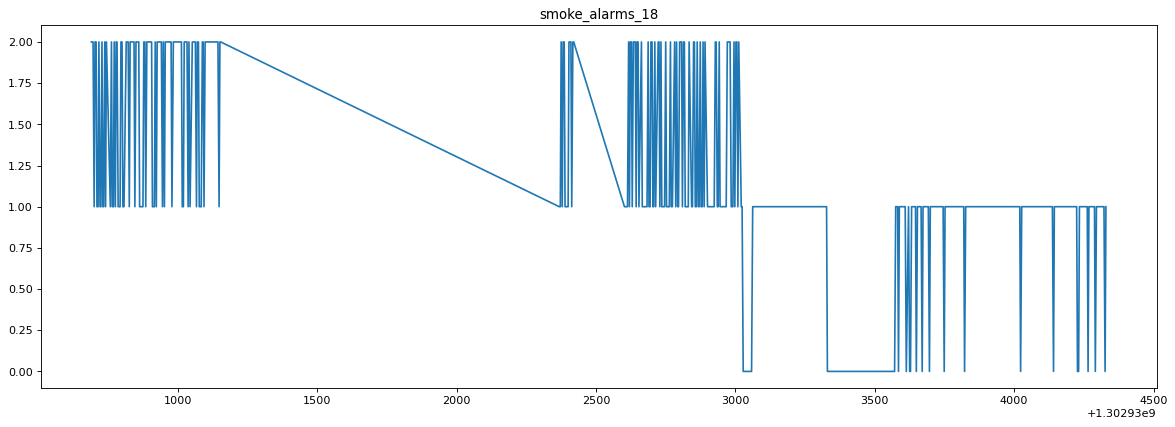

In [359]:
seccion = dispositivo_H3L18.iloc[:600, :]
tiempo = seccion['UTC_Unix']
potencia =  seccion[seccion.columns[1]]
#Grafica tiempo vs potencia
plt.figure(figsize=(18, 6), dpi=80)
plt.plot(tiempo, potencia)
plt.title(seccion.columns[1])
plt.show()

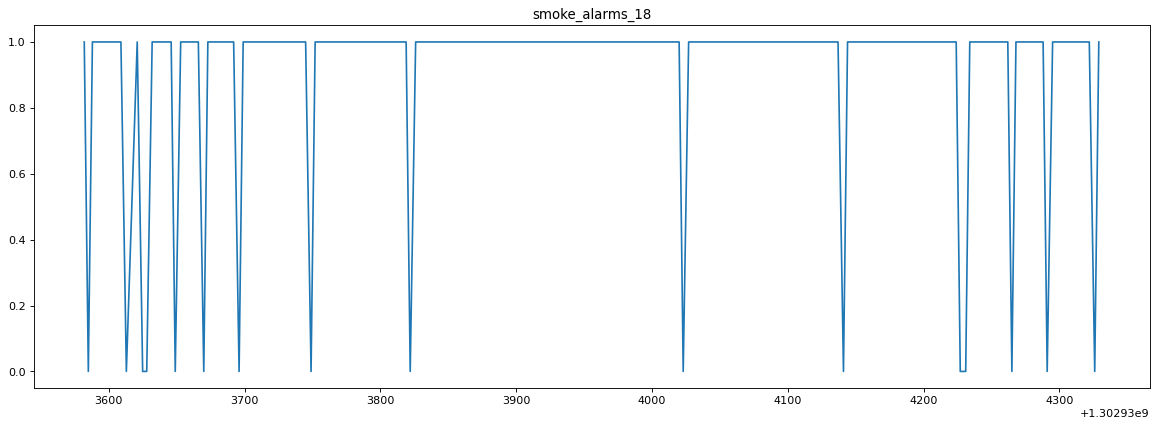

In [360]:
seccion = dispositivo_H3L18.iloc[400:600, :]
tiempo = seccion['UTC_Unix']
potencia =  seccion[seccion.columns[1]]
#Grafica tiempo vs potencia
plt.figure(figsize=(18, 6), dpi=80)
plt.plot(tiempo, potencia)
plt.title(seccion.columns[1])
plt.show()

**Conclusión:** On > 0 Off <= 0

**19: lighting_19**

In [141]:
media = dispositivo_H3L19[labels_casa_3[19]].mean() #Promedio media
mediana = dispositivo_H3L19[labels_casa_3[19]].median() #Dato central mediana
moda = dispositivo_H3L19[labels_casa_3[19]].mode()
maximo = dispositivo_H3L19[labels_casa_3[19]].max()
minimo = dispositivo_H3L19[labels_casa_3[19]].min()
print(f'\nmedia = {media} \nmediana = {mediana} \nmoda = {moda} \nmax = {maximo} \nmin  = {minimo}')


media = 15.545724275996209 
mediana = 1.0 
moda = 0    1.0
dtype: float64 
max = 226.0 
min  = 0.0


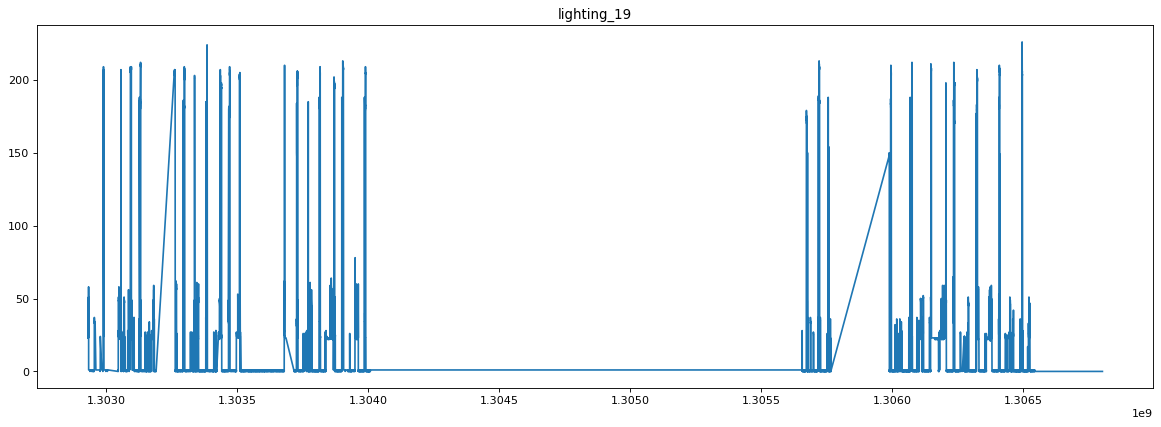

In [361]:
seccion = dispositivo_H3L19.iloc[:, :]
tiempo = seccion['UTC_Unix']
potencia =  seccion[seccion.columns[1]]
#Grafica tiempo vs potencia
plt.figure(figsize=(18, 6), dpi=80)
plt.plot(tiempo, potencia)
plt.title(seccion.columns[1])
plt.show()

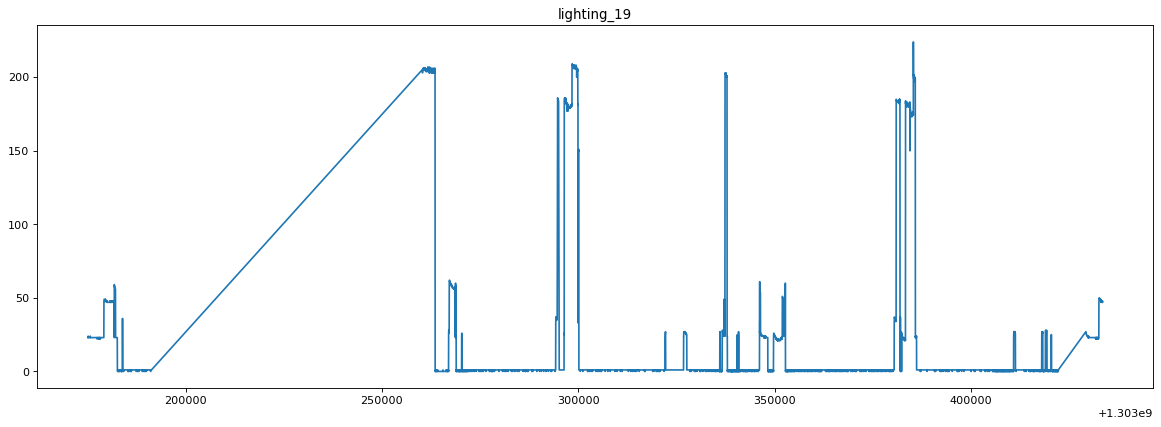

In [362]:
seccion = dispositivo_H3L19.iloc[44900:89800, :]
tiempo = seccion['UTC_Unix']
potencia =  seccion[seccion.columns[1]]
#Grafica tiempo vs potencia
plt.figure(figsize=(18, 6), dpi=80)
plt.plot(tiempo, potencia)
plt.title(seccion.columns[1])
plt.show()

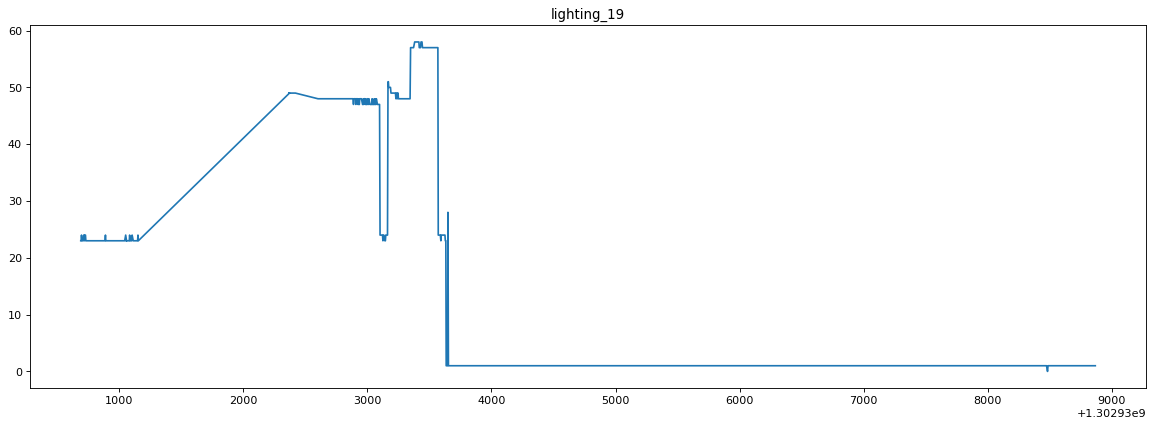

In [94]:
seccion = dispositivo_H3L19.iloc[:1800, :]
tiempo = seccion['UTC_Unix']
potencia =  seccion[seccion.columns[1]]
#Grafica tiempo vs potencia
plt.figure(figsize=(18, 6), dpi=80)
plt.plot(tiempo, potencia)
plt.title(seccion.columns[1])
plt.show()

**Conclusión:** On > 10 Off <= 10

**20: bathroom_gfi_20** Tomacorriente gcfi?

In [363]:
media = dispositivo_H3L20[labels_casa_3[20]].mean() #Promedio media
mediana = dispositivo_H3L20[labels_casa_3[20]].median() #Dato central mediana
moda = dispositivo_H3L20[labels_casa_3[20]].mode()
maximo = dispositivo_H3L20[labels_casa_3[20]].max()
minimo = dispositivo_H3L20[labels_casa_3[20]].min()
print(f'\nmedia = {media} \nmediana = {mediana} \nmoda = {moda} \nmax = {maximo} \nmin  = {minimo}')


media = 16.978608388372386 
mediana = 0.0 
moda = 0    0.0
dtype: float64 
max = 1670.0 
min  = 0.0


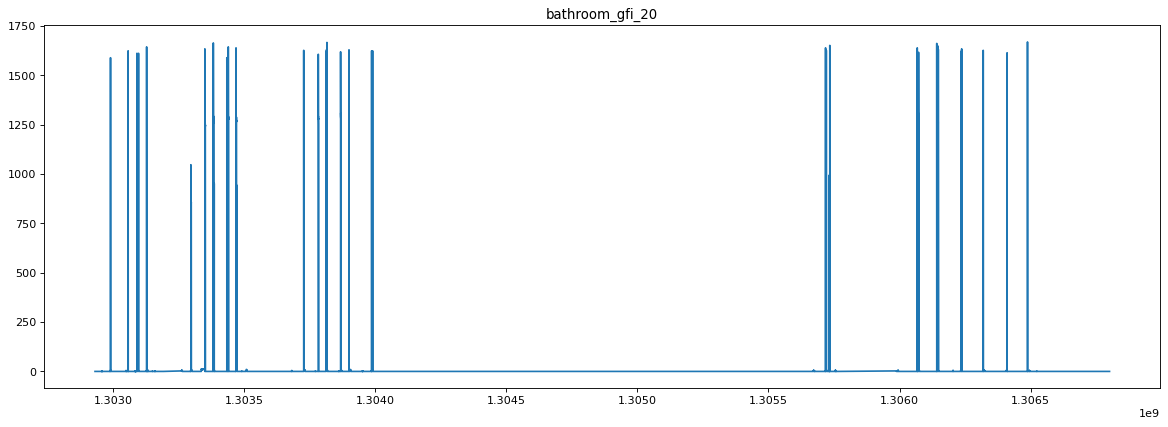

In [364]:
seccion = dispositivo_H3L20.iloc[:, :]
tiempo = seccion['UTC_Unix']
potencia =  seccion[seccion.columns[1]]
#Grafica tiempo vs potencia
plt.figure(figsize=(18, 6), dpi=80)
plt.plot(tiempo, potencia)
plt.title(seccion.columns[1])
plt.show()

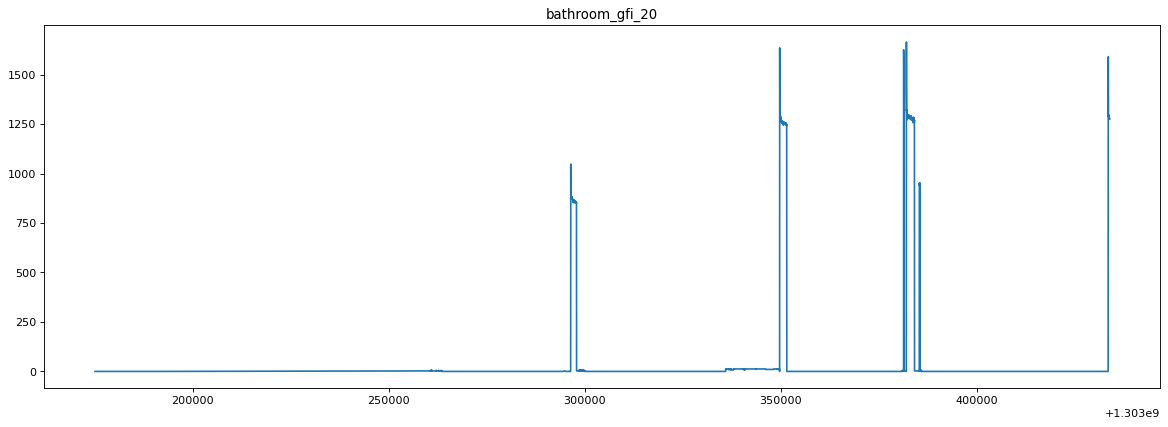

In [365]:
seccion = dispositivo_H3L20.iloc[44900:89900, :]
tiempo = seccion['UTC_Unix']
potencia =  seccion[seccion.columns[1]]
#Grafica tiempo vs potencia
plt.figure(figsize=(18, 6), dpi=80)
plt.plot(tiempo, potencia)
plt.title(seccion.columns[1])
plt.show()

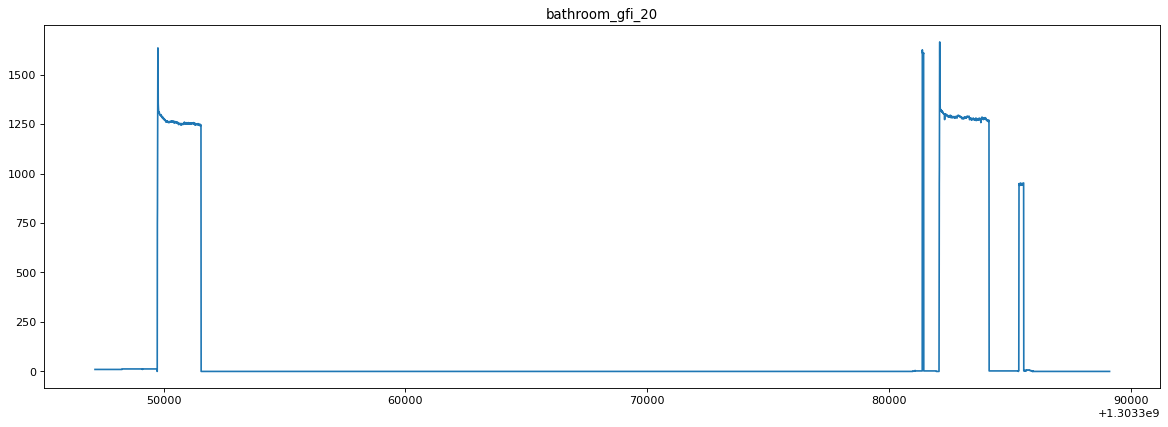

In [368]:
seccion = dispositivo_H3L20.iloc[68833:79900, :]
tiempo = seccion['UTC_Unix']
potencia =  seccion[seccion.columns[1]]
#Grafica tiempo vs potencia
plt.figure(figsize=(18, 6), dpi=80)
plt.plot(tiempo, potencia)
plt.title(seccion.columns[1])
plt.show()

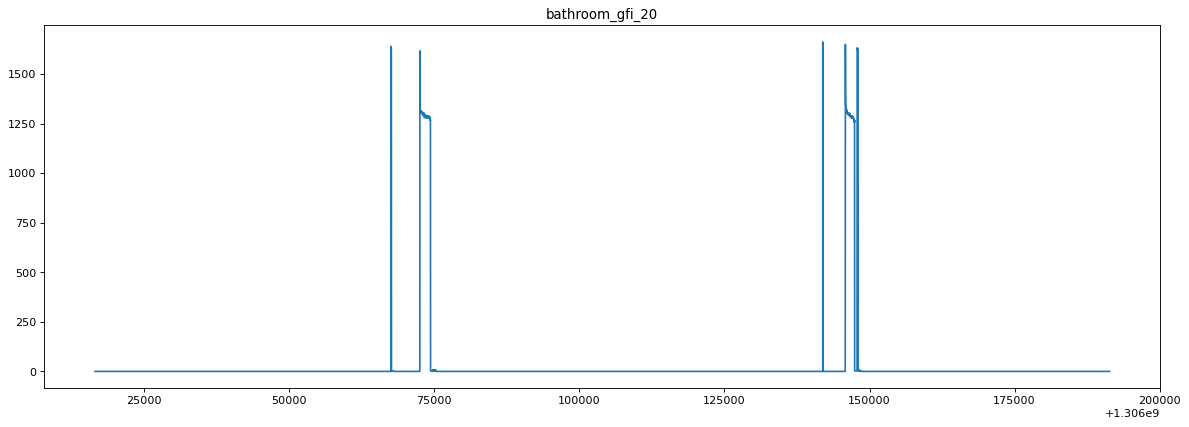

In [369]:
seccion = dispositivo_H3L20.iloc[269400:314300, :]
tiempo = seccion['UTC_Unix']
potencia =  seccion[seccion.columns[1]]
#Grafica tiempo vs potencia
plt.figure(figsize=(18, 6), dpi=80)
plt.plot(tiempo, potencia)
plt.title(seccion.columns[1])
plt.show()

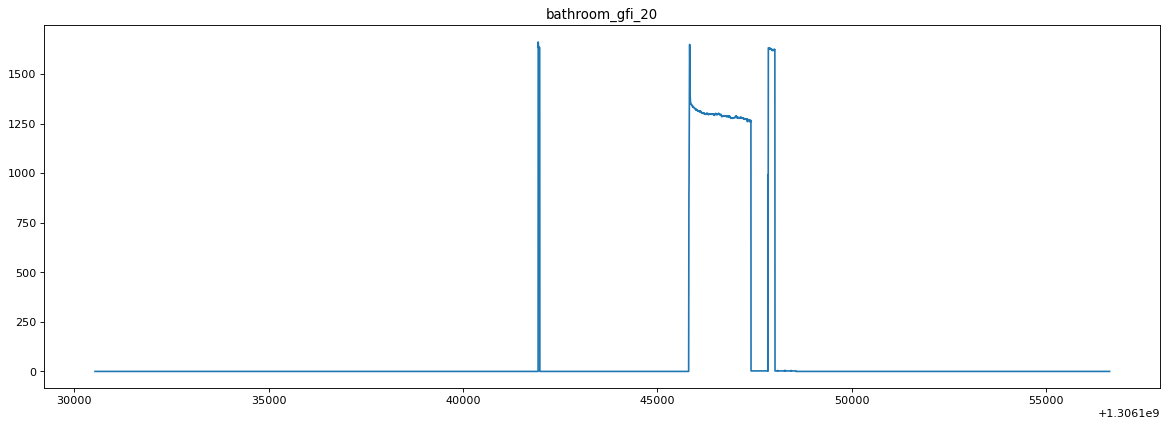

In [379]:
seccion = dispositivo_H3L20.iloc[299400:306300, :]
tiempo = seccion['UTC_Unix']
potencia =  seccion[seccion.columns[1]]
#Grafica tiempo vs potencia
plt.figure(figsize=(18, 6), dpi=80)
plt.plot(tiempo, potencia)
plt.title(seccion.columns[1])
plt.show()

**Conclusión:** On > 0 Off <= 0

**21: kitchen_outlets_21** Tomacorriente

In [380]:
media = dispositivo_H3L21[labels_casa_3[21]].mean() #Promedio media
mediana = dispositivo_H3L21[labels_casa_3[21]].median() #Dato central mediana
moda = dispositivo_H3L21[labels_casa_3[21]].mode()
maximo = dispositivo_H3L21[labels_casa_3[21]].max()
minimo = dispositivo_H3L21[labels_casa_3[21]].min()
print(f'\nmedia = {media} \nmediana = {mediana} \nmoda = {moda} \nmax = {maximo} \nmin  = {minimo}')


media = 2.3202567636789264 
mediana = 0.0 
moda = 0    0.0
dtype: float64 
max = 140.0 
min  = 0.0


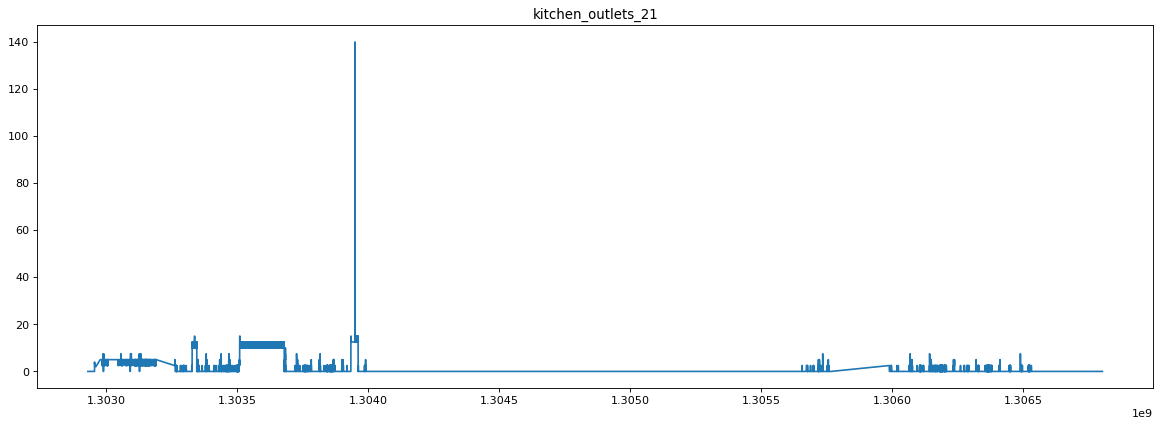

In [381]:
seccion = dispositivo_H3L21.iloc[:, :]
tiempo = seccion['UTC_Unix']
potencia =  seccion[seccion.columns[1]]
#Grafica tiempo vs potencia
plt.figure(figsize=(18, 6), dpi=80)
plt.plot(tiempo, potencia)
plt.title(seccion.columns[1])
plt.show()

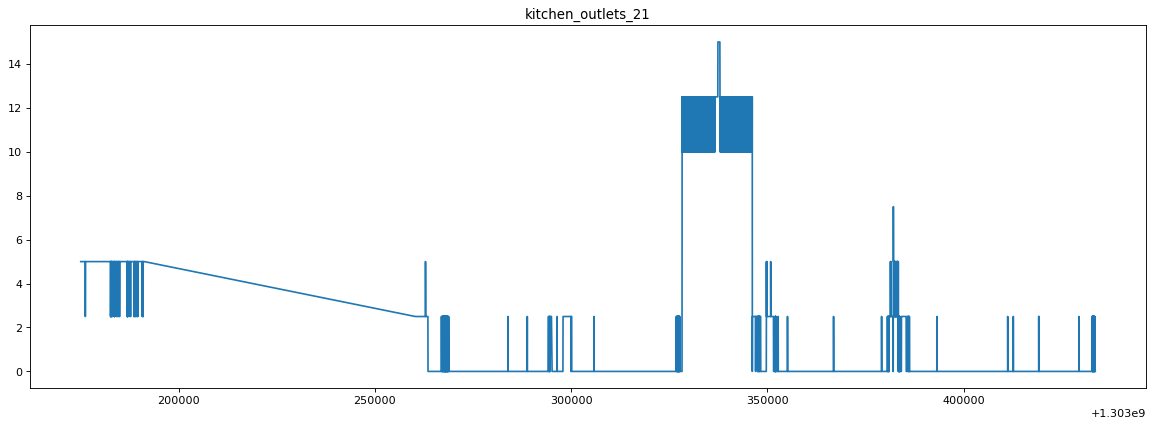

In [382]:
seccion = dispositivo_H3L21.iloc[44900:89800, :]
tiempo = seccion['UTC_Unix']
potencia =  seccion[seccion.columns[1]]
#Grafica tiempo vs potencia
plt.figure(figsize=(18, 6), dpi=80)
plt.plot(tiempo, potencia)
plt.title(seccion.columns[1])
plt.show()

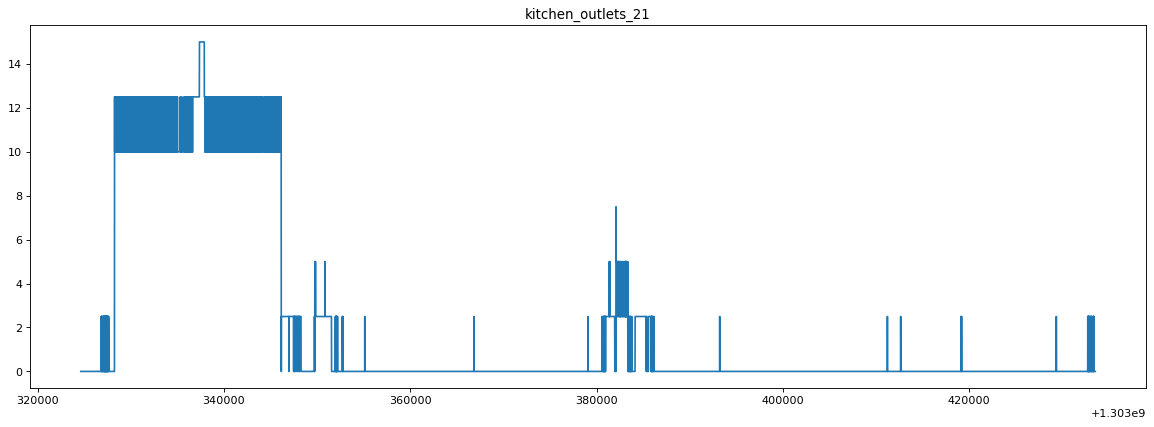

In [388]:
seccion = dispositivo_H3L21.iloc[62900:89800, :]
tiempo = seccion['UTC_Unix']
potencia =  seccion[seccion.columns[1]]
#Grafica tiempo vs potencia
plt.figure(figsize=(18, 6), dpi=80)
plt.plot(tiempo, potencia)
plt.title(seccion.columns[1])
plt.show()

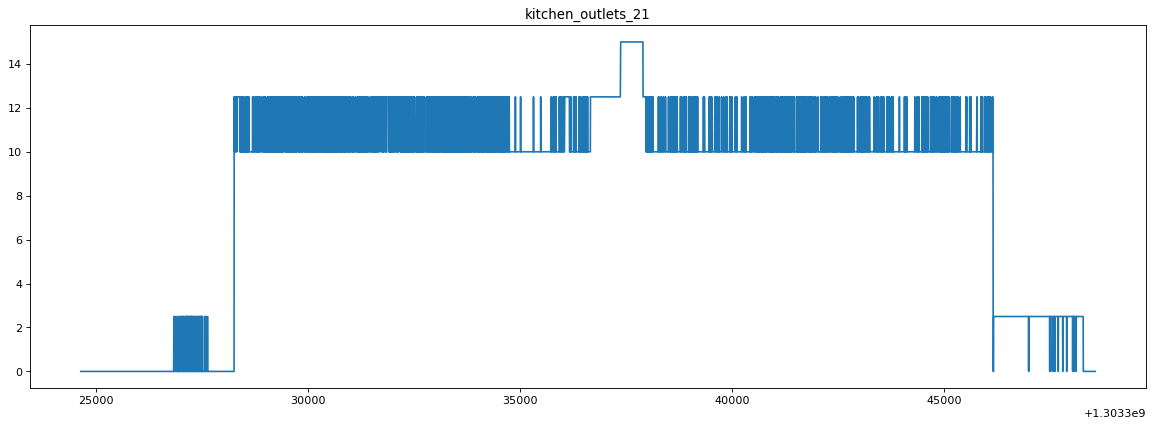

In [395]:
seccion = dispositivo_H3L21.iloc[62900:69200, :]
tiempo = seccion['UTC_Unix']
potencia =  seccion[seccion.columns[1]]
#Grafica tiempo vs potencia
plt.figure(figsize=(18, 6), dpi=80)
plt.plot(tiempo, potencia)
plt.title(seccion.columns[1])
plt.show()

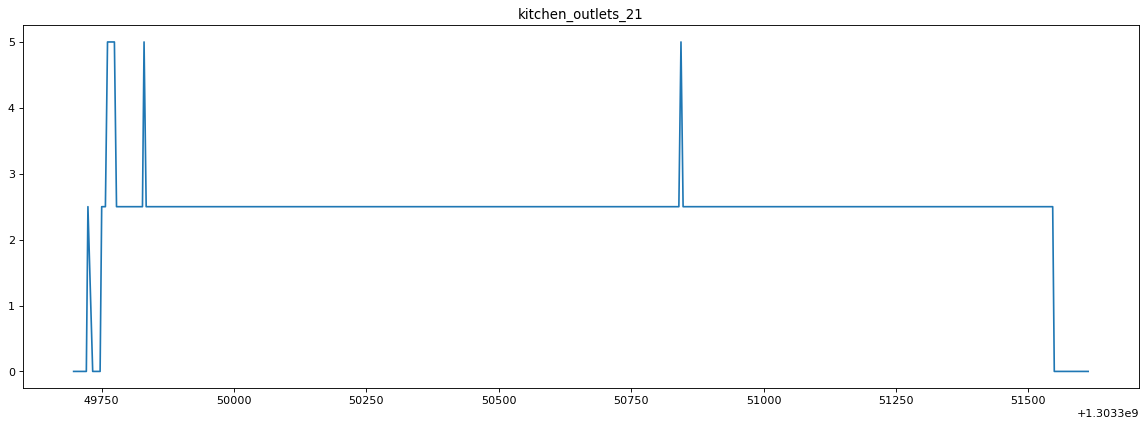

In [401]:
seccion = dispositivo_H3L21.iloc[69500:70000, :]
tiempo = seccion['UTC_Unix']
potencia =  seccion[seccion.columns[1]]
#Grafica tiempo vs potencia
plt.figure(figsize=(18, 6), dpi=80)
plt.plot(tiempo, potencia)
plt.title(seccion.columns[1])
plt.show()

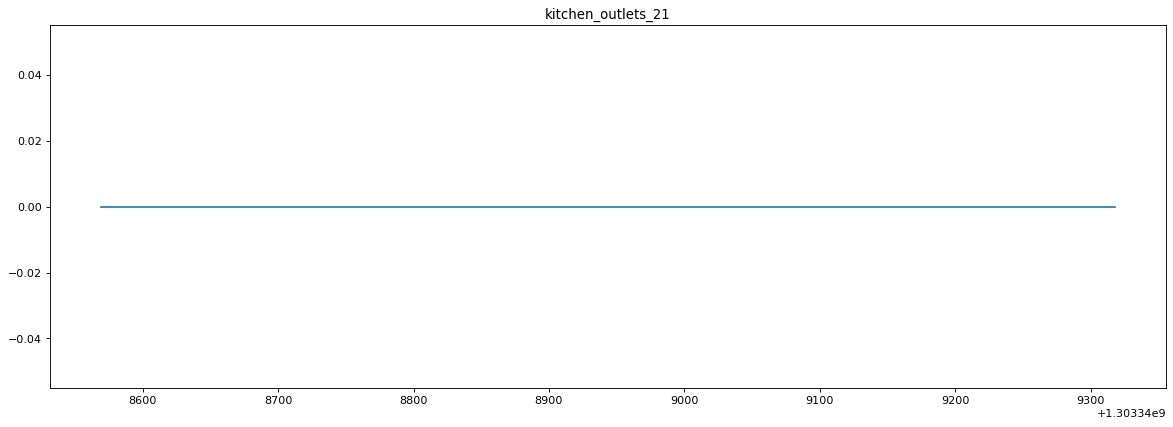

In [396]:
seccion = dispositivo_H3L21.iloc[69200:69400, :]
tiempo = seccion['UTC_Unix']
potencia =  seccion[seccion.columns[1]]
#Grafica tiempo vs potencia
plt.figure(figsize=(18, 6), dpi=80)
plt.plot(tiempo, potencia)
plt.title(seccion.columns[1])
plt.show()

**Conclusión:** On > 0 Off <= 0

**22: kitchen_outlets_22**

In [402]:
media = dispositivo_H3L22[labels_casa_3[22]].mean() #Promedio media
mediana = dispositivo_H3L22[labels_casa_3[22]].median() #Dato central mediana
moda = dispositivo_H3L22[labels_casa_3[22]].mode()
maximo = dispositivo_H3L22[labels_casa_3[22]].max()
minimo = dispositivo_H3L22[labels_casa_3[22]].min()
print(f'\nmedia = {media} \nmediana = {mediana} \nmoda = {moda} \nmax = {maximo} \nmin  = {minimo}')


media = 12.127696377444588 
mediana = 2.5 
moda = 0    2.5
dtype: float64 
max = 2115.0 
min  = 0.0


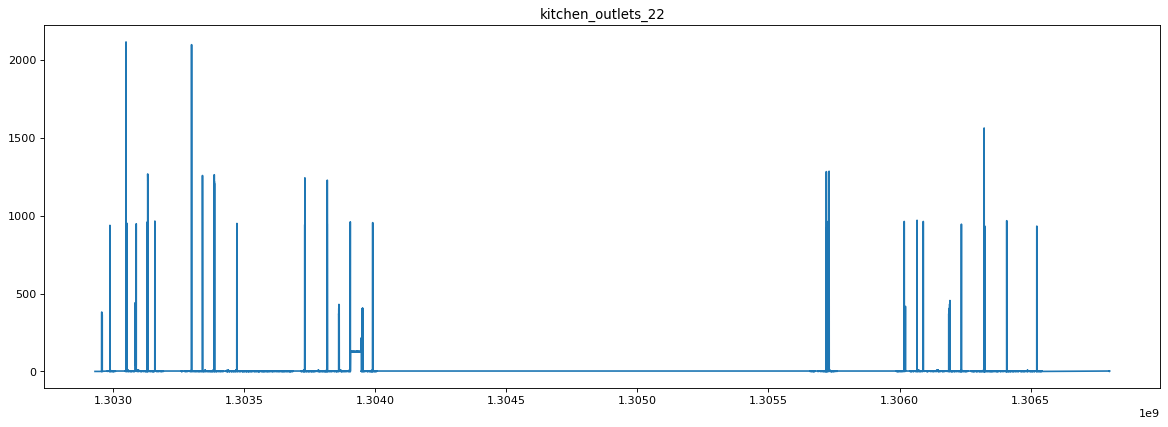

In [403]:
seccion = dispositivo_H3L22.iloc[:, :]
tiempo = seccion['UTC_Unix']
potencia =  seccion[seccion.columns[1]]
#Grafica tiempo vs potencia
plt.figure(figsize=(18, 6), dpi=80)
plt.plot(tiempo, potencia)
plt.title(seccion.columns[1])
plt.show()

In [410]:
#La zona pequeña tambien cumple con un patron, en apariencia se conectan dos o mas dispositivos al mismo tomacorriente

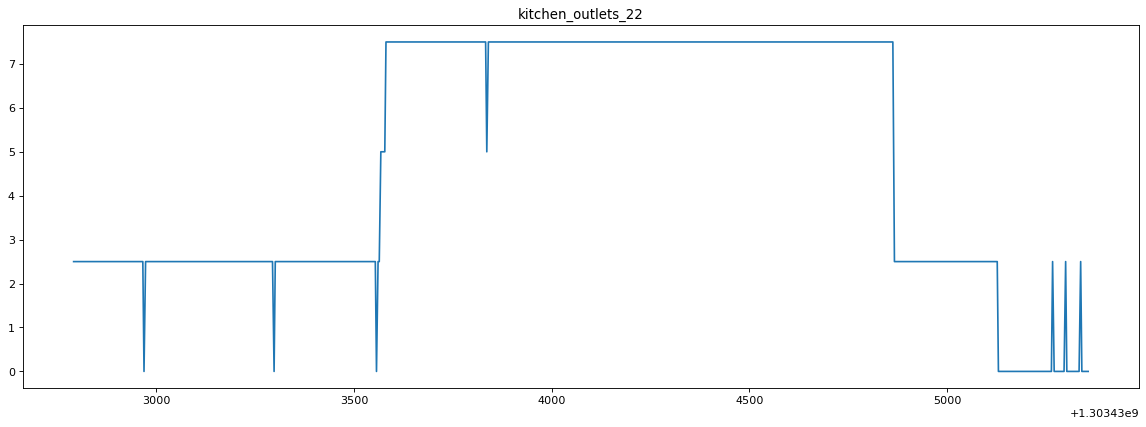

In [411]:
seccion = dispositivo_H3L22.iloc[89600:90280, :]
tiempo = seccion['UTC_Unix']
potencia =  seccion[seccion.columns[1]]
#Grafica tiempo vs potencia
plt.figure(figsize=(18, 6), dpi=80)
plt.plot(tiempo, potencia)
plt.title(seccion.columns[1])
plt.show()

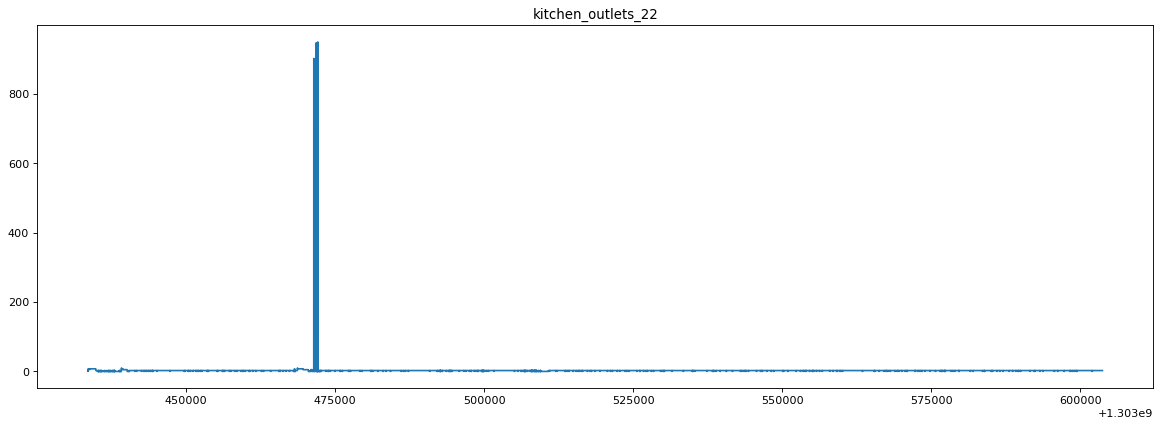

In [404]:
seccion = dispositivo_H3L22.iloc[89800:134700, :]
tiempo = seccion['UTC_Unix']
potencia =  seccion[seccion.columns[1]]
#Grafica tiempo vs potencia
plt.figure(figsize=(18, 6), dpi=80)
plt.plot(tiempo, potencia)
plt.title(seccion.columns[1])
plt.show()

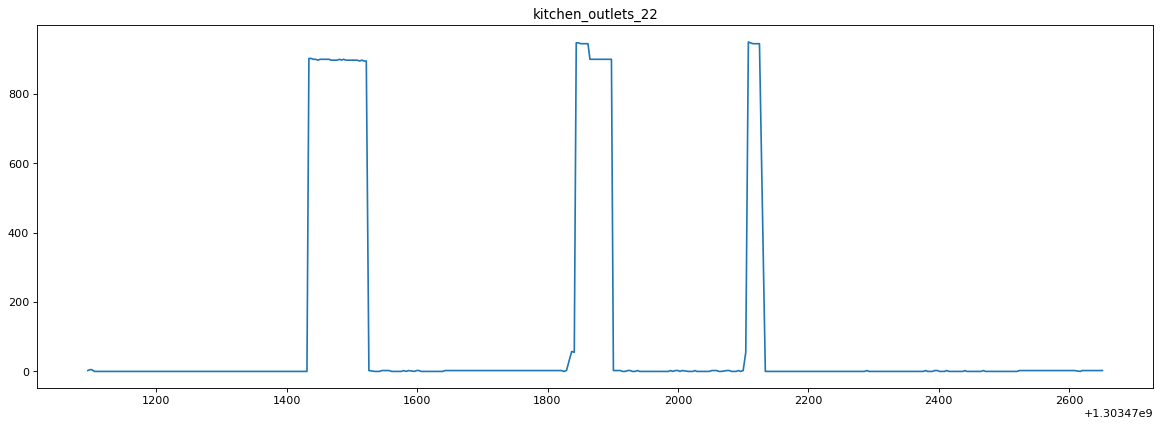

In [433]:
seccion = dispositivo_H3L22.iloc[99700:100100, :]
tiempo = seccion['UTC_Unix']
potencia =  seccion[seccion.columns[1]]
#Grafica tiempo vs potencia
plt.figure(figsize=(18, 6), dpi=80)
plt.plot(tiempo, potencia)
plt.title(seccion.columns[1])
plt.show()

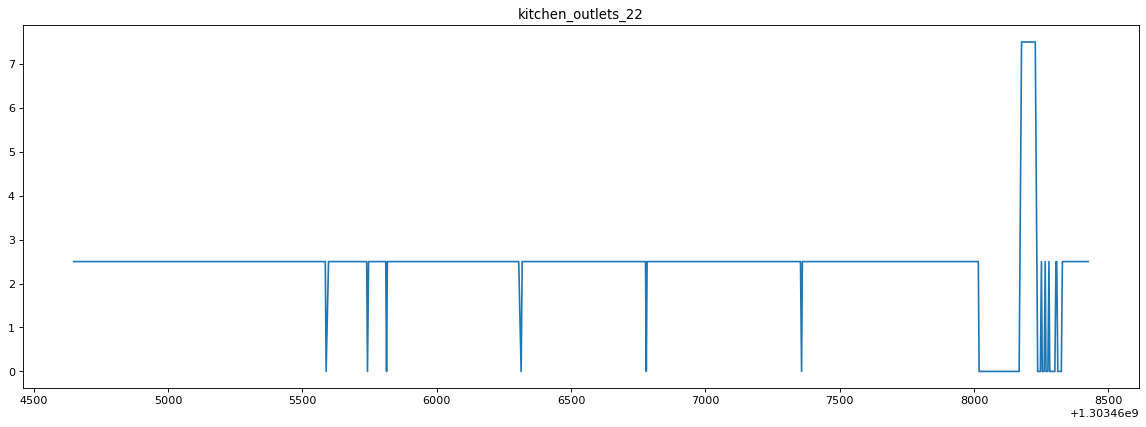

In [418]:
seccion = dispositivo_H3L22.iloc[98000:99000, :]
tiempo = seccion['UTC_Unix']
potencia =  seccion[seccion.columns[1]]
#Grafica tiempo vs potencia
plt.figure(figsize=(18, 6), dpi=80)
plt.plot(tiempo, potencia)
plt.title(seccion.columns[1])
plt.show()

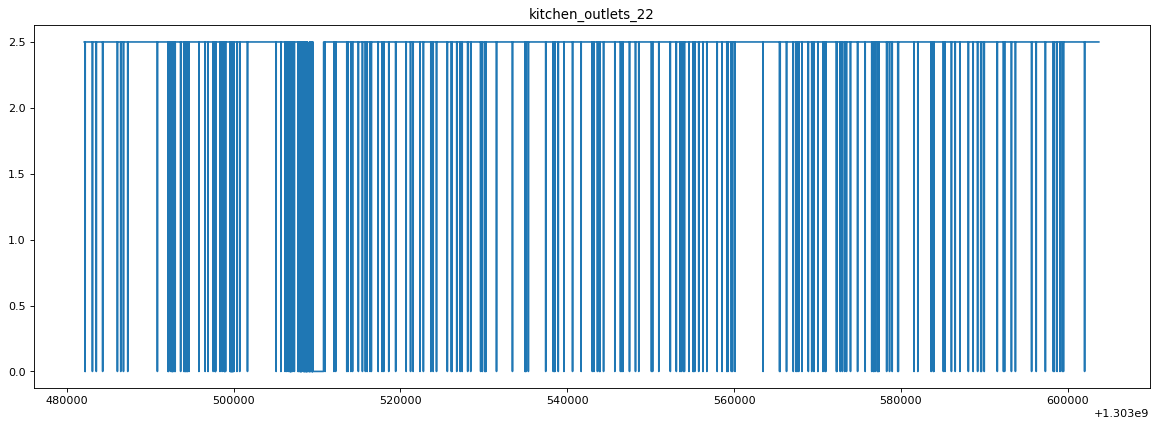

In [412]:
seccion = dispositivo_H3L22.iloc[102600:134700, :]
tiempo = seccion['UTC_Unix']
potencia =  seccion[seccion.columns[1]]
#Grafica tiempo vs potencia
plt.figure(figsize=(18, 6), dpi=80)
plt.plot(tiempo, potencia)
plt.title(seccion.columns[1])
plt.show()

**Conclusión:** De nuevo en el tomacorriente aparentemente se conectan diferentes dispositivos. On > 0 Off <= 0

**Paso 3: Encontrar las huellas On Off**

In [436]:
huellas_H3L3 = huellas(dispositivo_H3L3, labels_casa_3[3], 0, 0)
print(f'Huella H1L5: {len(huellas_H3L3)}')

Huella H1L5: 7047


outlets_unknown_3


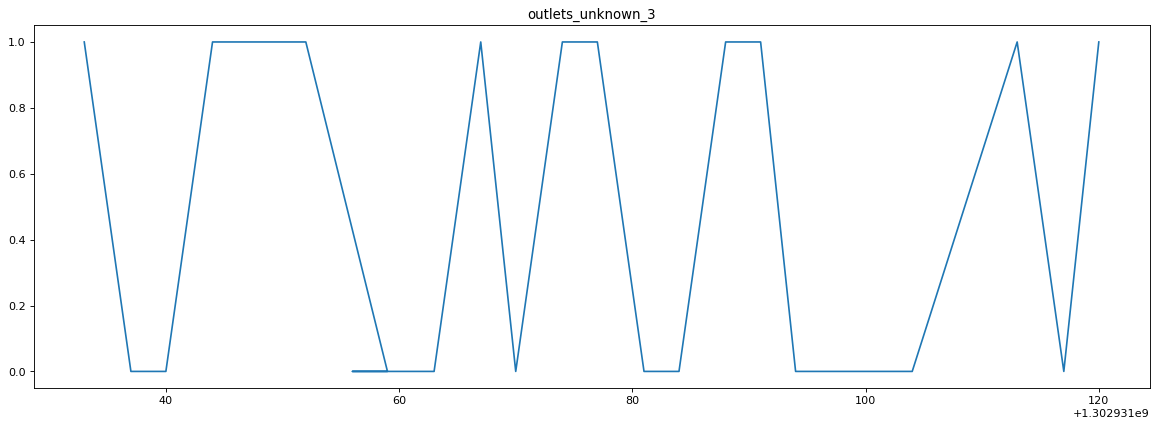

In [437]:
huellas_chanel_3 = DataFrame(huellas_H3L3,columns=['on', 'off', 'UTC_Unix_1','UTC_Unix_2'])
huellas_chanel_3.to_csv(raiz + "\\house_3\\huellas_chanel_3.csv", index=True,sep=r' ',header= True, encoding='utf-8' )
graficar_huella(dispositivo_H3L3, huellas_H3L3, 6)

In [439]:
huellas_H3L4 = huellas(dispositivo_H3L4, labels_casa_3[4], 0, 0)
print(f'Huella H1L5: {len(huellas_H3L4)}')

Huella H1L5: 6080


outlets_unknown_4


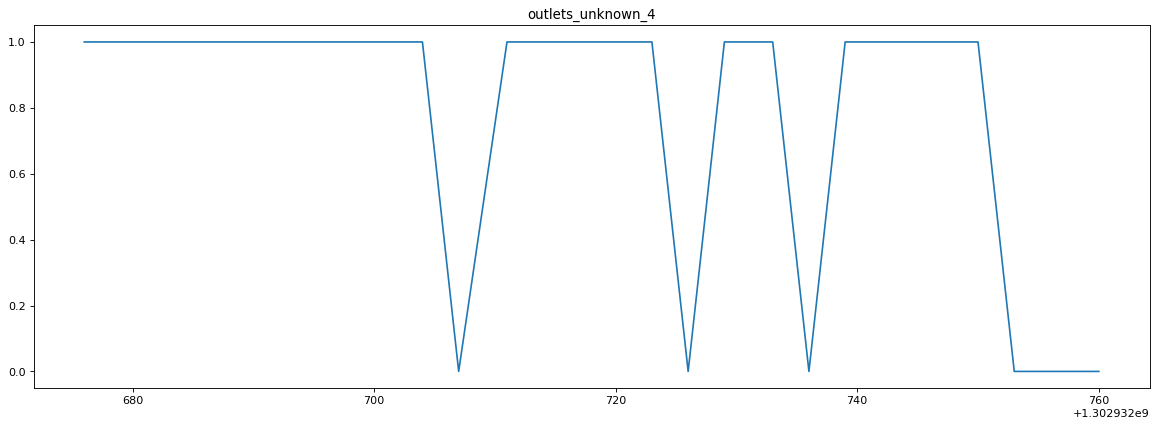

In [440]:
huellas_chanel_4 = DataFrame(huellas_H3L4,columns=['on', 'off', 'UTC_Unix_1','UTC_Unix_2'])
huellas_chanel_4.to_csv(raiz + "\\house_3\\huellas_chanel_4.csv", index=True,sep=r' ',header= True, encoding='utf-8' )
graficar_huella(dispositivo_H3L4, huellas_H3L4, 6)

In [441]:
huellas_H3L5 = huellas(dispositivo_H3L5, labels_casa_3[5], 0, 0)
print(f'Huella H1L5: {len(huellas_H3L5)}')

Huella H1L5: 4272


lighting_5


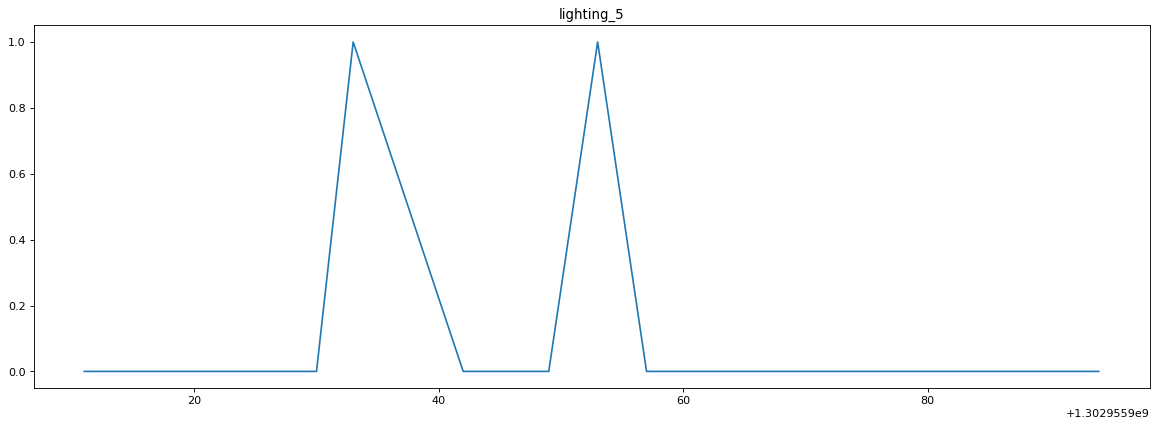

In [442]:
huellas_chanel_5 = DataFrame(huellas_H3L5,columns=['on', 'off', 'UTC_Unix_1','UTC_Unix_2'])
huellas_chanel_5.to_csv(raiz + "\\house_3\\huellas_chanel_5.csv", index=True,sep=r' ',header= True, encoding='utf-8' )
graficar_huella(dispositivo_H3L5, huellas_H3L5, 6)

In [445]:
#huellas_H3L6 = huellas(dispositivo_H3L6, labels_casa_3[6], 0, 0)
#print(f'huellas_H3L6: {len(huellas_H3L6)}')

huellas_H3L6: 0


In [447]:
#huellas_chanel_6 = DataFrame(huellas_H3L6,columns=['on', 'off', 'UTC_Unix_1','UTC_Unix_2'])
#huellas_chanel_6.to_csv(raiz + "\\house_3\\huellas_chanel_6.csv", index=True,sep=r' ',header= True, encoding='utf-8' )
#graficar_huella(dispositivo_H3L6, huellas_H3L6, 6)

In [449]:
huellas_H3L7 = huellas(dispositivo_H3L7, labels_casa_3[7], 40, 40)
print(f'huellas_H3L7: {len(huellas_H3L7)}')

huellas_H3L7: 903


refrigerator_7


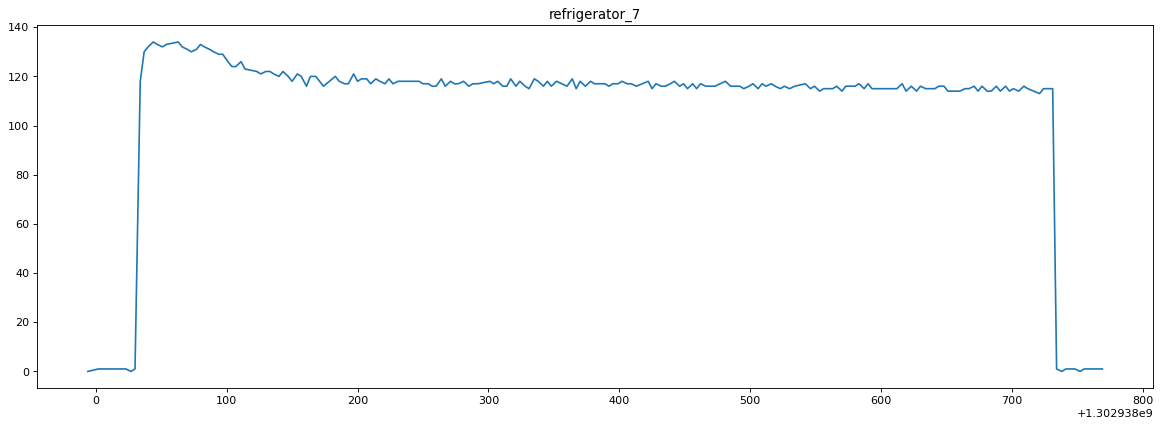

In [450]:
huellas_chanel_7 = DataFrame(huellas_H3L7,columns=['on', 'off', 'UTC_Unix_1','UTC_Unix_2'])
huellas_chanel_7.to_csv(raiz + "\\house_3\\huellas_chanel_7.csv", index=True,sep=r' ',header= True, encoding='utf-8' )
graficar_huella(dispositivo_H3L7, huellas_H3L7, 6)

In [451]:
huellas_H3L8 = huellas(dispositivo_H3L8, labels_casa_3[8], 0, 0)
print(f'huellas_H3L8: {len(huellas_H3L8)}')

huellas_H3L8: 2443


disposal_8


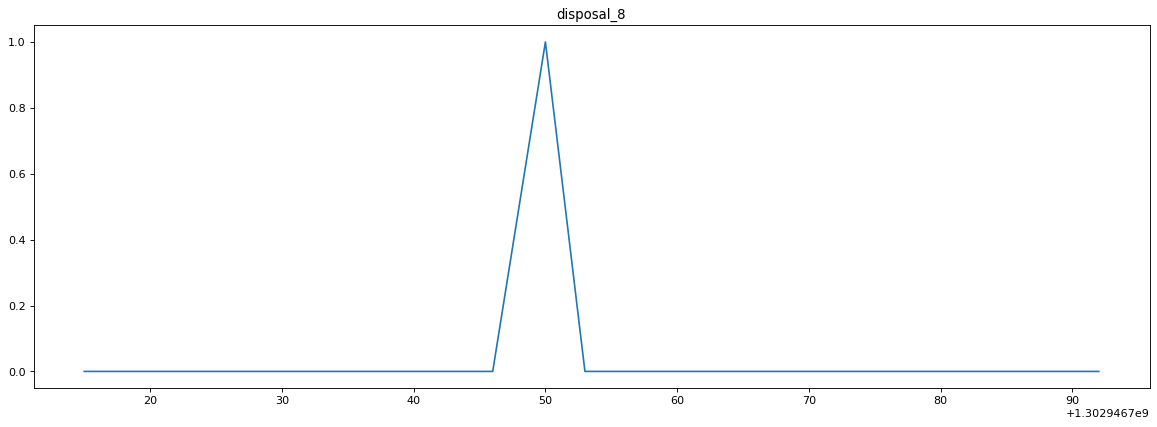

In [452]:
huellas_chanel_8 = DataFrame(huellas_H3L8,columns=['on', 'off', 'UTC_Unix_1','UTC_Unix_2'])
huellas_chanel_8.to_csv(raiz + "\\house_3\\huellas_chanel_5.csv", index=True,sep=r' ',header= True, encoding='utf-8' )
graficar_huella(dispositivo_H3L8, huellas_H3L8, 6)

In [453]:
huellas_H3L9 = huellas(dispositivo_H3L9, labels_casa_3[9], 0, 0)
print(f'huellas_H3L9: {len(huellas_H3L9)}')

huellas_H3L9: 12697


dishwaser_9


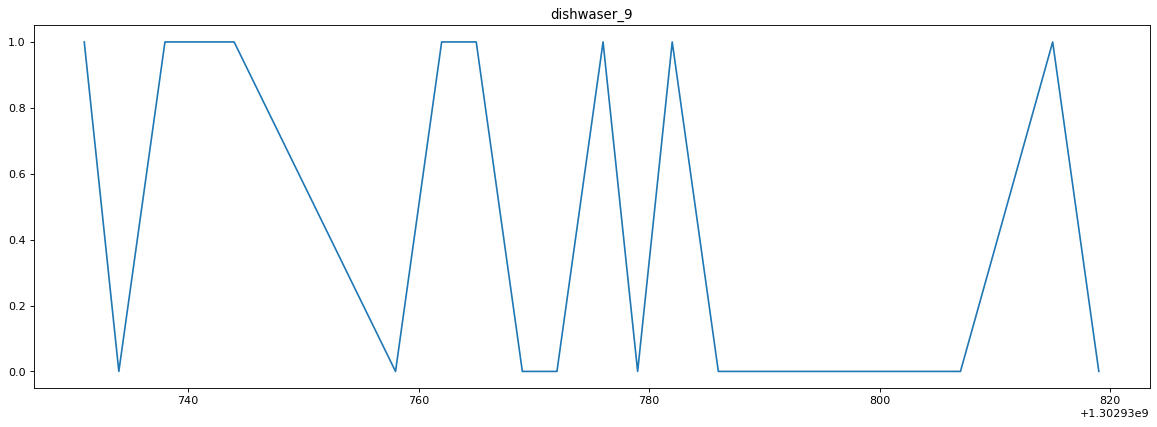

In [454]:
huellas_chanel_9 = DataFrame(huellas_H3L9,columns=['on', 'off', 'UTC_Unix_1','UTC_Unix_2'])
huellas_chanel_9.to_csv(raiz + "\\house_3\\huellas_chanel_9.csv", index=True,sep=r' ',header= True, encoding='utf-8' )
graficar_huella(dispositivo_H3L9, huellas_H3L9, 6)

In [456]:
huellas_H3L10 = huellas(dispositivo_H3L10, labels_casa_3[10], 0, 0)
print(f'huellas_H3L10: {len(huellas_H3L10)}')

huellas_H3L10: 34


furance_10


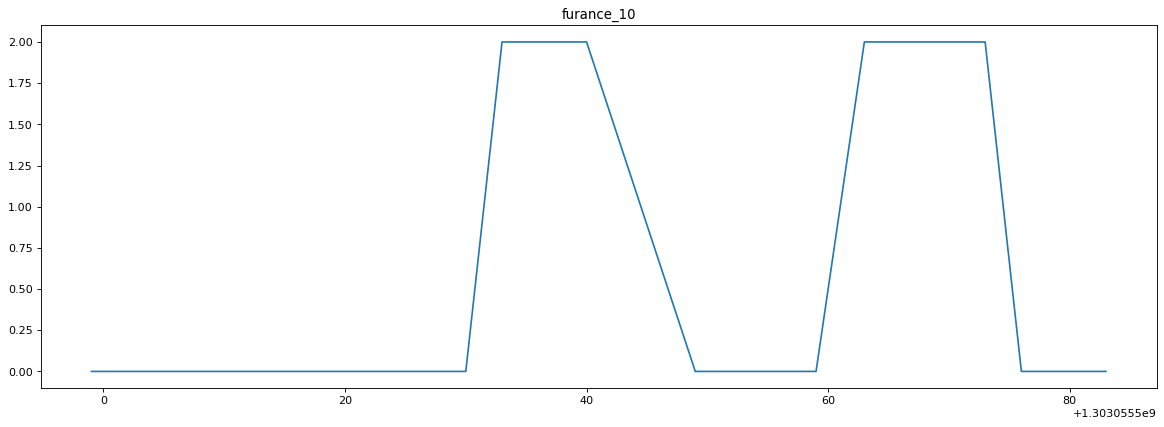

In [457]:
huellas_chanel_10 = DataFrame(huellas_H3L10,columns=['on', 'off', 'UTC_Unix_1','UTC_Unix_2'])
huellas_chanel_10.to_csv(raiz + "\\house_3\\huellas_chanel_10.csv", index=True,sep=r' ',header= True, encoding='utf-8' )
graficar_huella(dispositivo_H3L10, huellas_H3L10, 6)

In [458]:
huellas_H3L11 = huellas(dispositivo_H3L11, labels_casa_3[11], 0, 0)
print(f'huellas_H3L11: {len(huellas_H3L11)}')

huellas_H3L11: 408


lighting_11


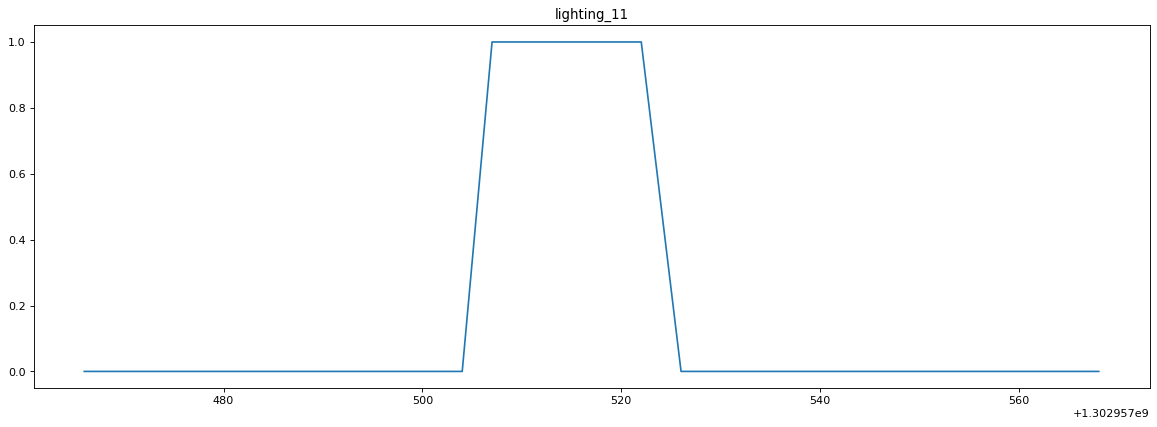

In [459]:
huellas_chanel_11 = DataFrame(huellas_H3L11,columns=['on', 'off', 'UTC_Unix_1','UTC_Unix_2'])
huellas_chanel_11.to_csv(raiz + "\\house_3\\huellas_chanel_11.csv", index=True,sep=r' ',header= True, encoding='utf-8' )
graficar_huella(dispositivo_H3L11, huellas_H3L11, 6)

In [460]:
huellas_H3L12 = huellas(dispositivo_H3L12, labels_casa_3[12], 0, 0)
print(f'huellas_H3L12: {len(huellas_H3L12)}')

huellas_H3L12: 6680


outlets_unknown_12


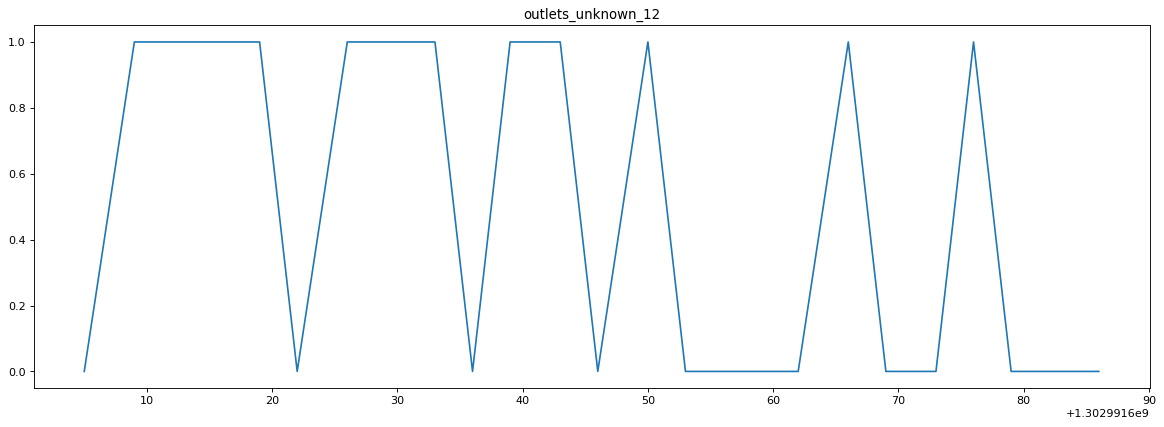

In [461]:
huellas_chanel_12 = DataFrame(huellas_H3L12,columns=['on', 'off', 'UTC_Unix_1','UTC_Unix_2'])
huellas_chanel_12.to_csv(raiz + "\\house_3\\huellas_chanel_12.csv", index=True,sep=r' ',header= True, encoding='utf-8' )
graficar_huella(dispositivo_H3L12, huellas_H3L12, 6)

In [462]:
huellas_H3L13 = huellas(dispositivo_H3L13, labels_casa_3[13], 0, 0)
print(f'huellas_H3L13: {len(huellas_H3L13)}')

huellas_H3L13: 834


washer_dryer_13


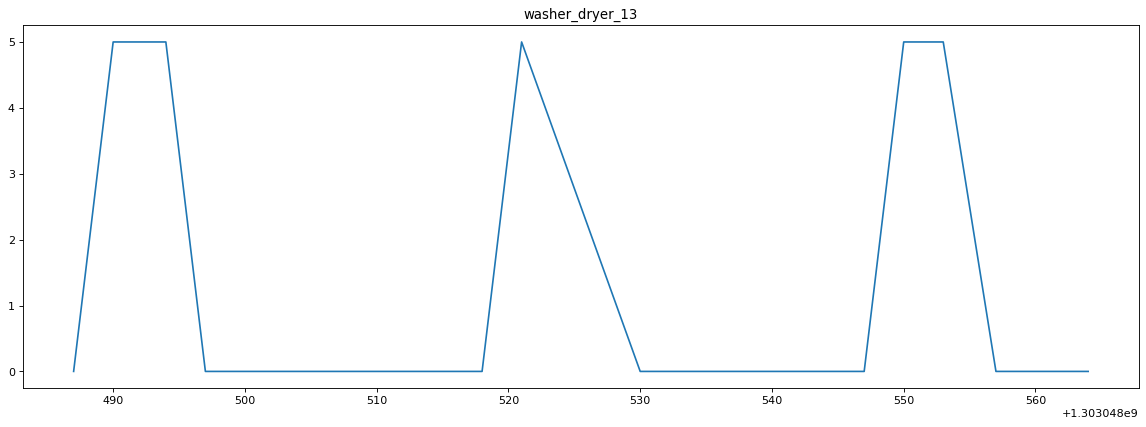

In [463]:
huellas_chanel_13 = DataFrame(huellas_H3L13,columns=['on', 'off', 'UTC_Unix_1','UTC_Unix_2'])
huellas_chanel_13.to_csv(raiz + "\\house_3\\huellas_chanel_13.csv", index=True,sep=r' ',header= True, encoding='utf-8' )
graficar_huella(dispositivo_H3L13, huellas_H3L13, 6)

In [464]:
huellas_H3L14 = huellas(dispositivo_H3L14, labels_casa_3[14], 0, 0)
print(f'huellas_H3L14: {len(huellas_H3L14)}')

huellas_H3L14: 607


washer_dryer_14


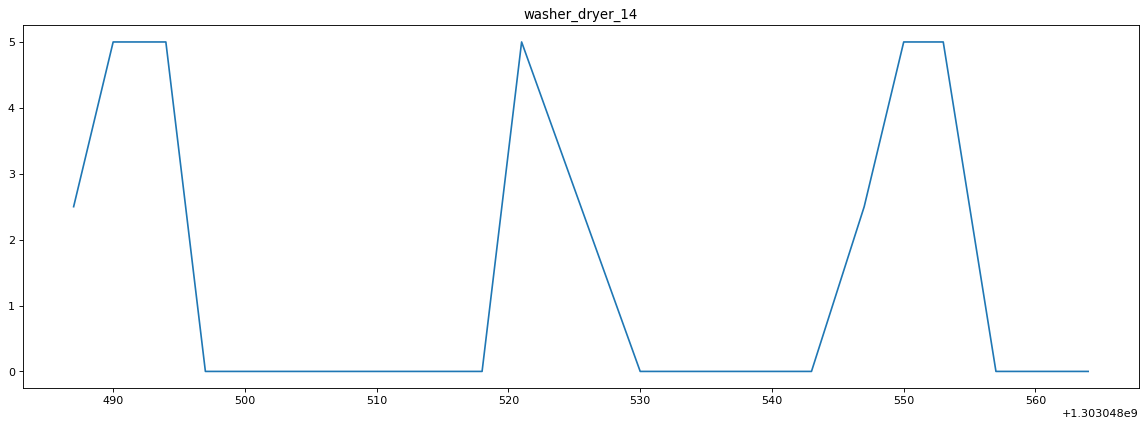

In [465]:
huellas_chanel_14 = DataFrame(huellas_H3L14,columns=['on', 'off', 'UTC_Unix_1','UTC_Unix_2'])
huellas_chanel_14.to_csv(raiz + "\\house_3\\huellas_chanel_14.csv", index=True,sep=r' ',header= True, encoding='utf-8' )
graficar_huella(dispositivo_H3L14, huellas_H3L14, 6)

In [466]:
huellas_H3L15 = huellas(dispositivo_H3L15, labels_casa_3[15], 0, 0)
print(f'huellas_H3L15: {len(huellas_H3L15)}')

huellas_H3L15: 3807


lighting_15


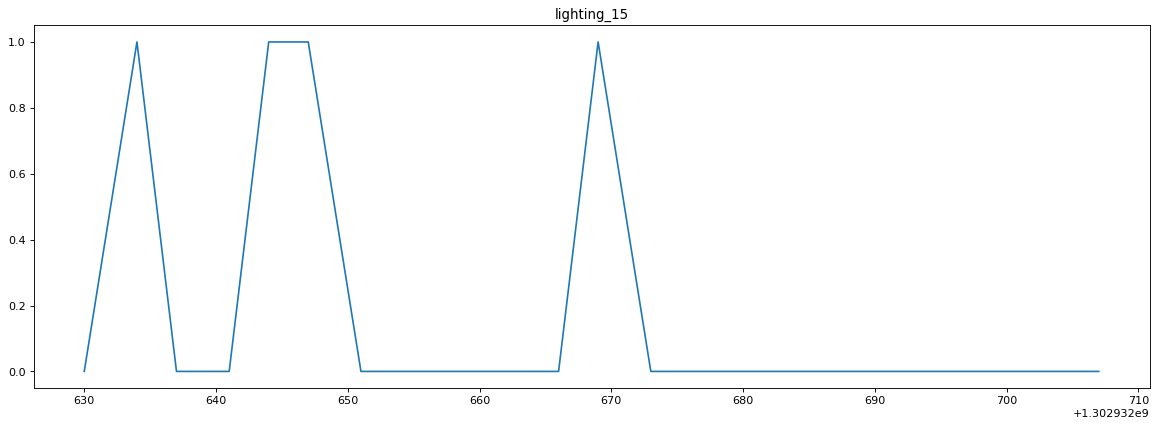

In [467]:
huellas_chanel_15 = DataFrame(huellas_H3L15,columns=['on', 'off', 'UTC_Unix_1','UTC_Unix_2'])
huellas_chanel_15.to_csv(raiz + "\\house_3\\huellas_chanel_15.csv", index=True,sep=r' ',header= True, encoding='utf-8' )
graficar_huella(dispositivo_H3L15, huellas_H3L15, 6)

In [468]:
huellas_H3L16 = huellas(dispositivo_H3L16, labels_casa_3[16], 0, 0)
print(f'huellas_H3L16: {len(huellas_H3L16)}')

huellas_H3L16: 267


microwave_16


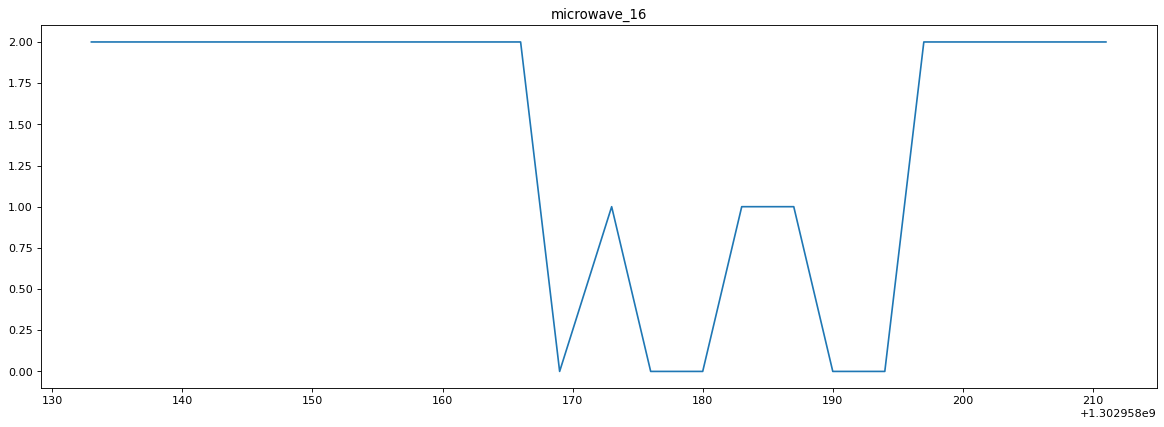

In [469]:
huellas_chanel_16 = DataFrame(huellas_H3L16,columns=['on', 'off', 'UTC_Unix_1','UTC_Unix_2'])
huellas_chanel_16.to_csv(raiz + "\\house_3\\huellas_chanel_16.csv", index=True,sep=r' ',header= True, encoding='utf-8' )
graficar_huella(dispositivo_H3L16, huellas_H3L16, 6)

In [470]:
huellas_H3L17 = huellas(dispositivo_H3L17, labels_casa_3[17], 0, 0)
print(f'huellas_H3L17: {len(huellas_H3L17)}')

huellas_H3L17: 878


lighting_17


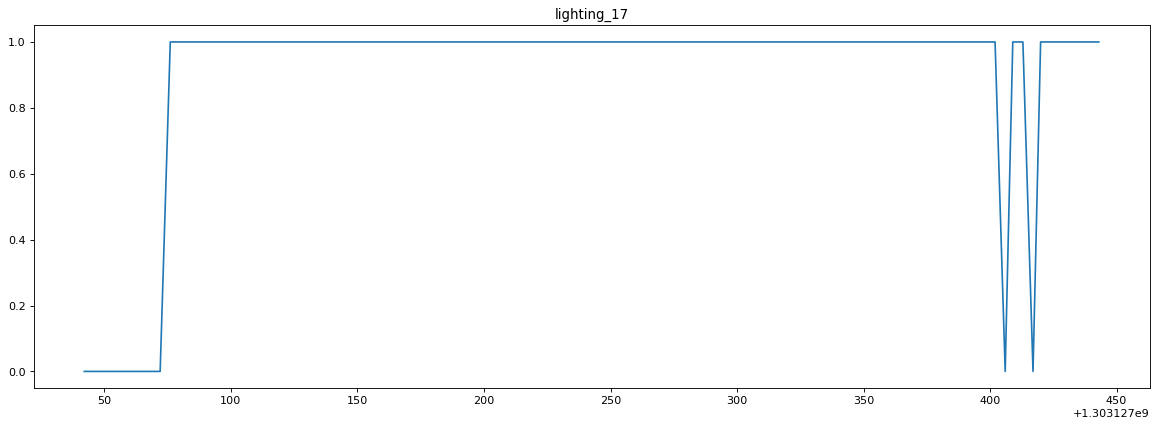

In [471]:
huellas_chanel_17 = DataFrame(huellas_H3L17,columns=['on', 'off', 'UTC_Unix_1','UTC_Unix_2'])
huellas_chanel_17.to_csv(raiz + "\\house_3\\huellas_chanel_17.csv", index=True,sep=r' ',header= True, encoding='utf-8' )
graficar_huella(dispositivo_H3L17, huellas_H3L17, 6)

In [472]:
huellas_H3L18 = huellas(dispositivo_H3L18, labels_casa_3[18], 0, 0)
print(f'huellas_H3L18: {len(huellas_H3L18)}')

huellas_H3L18: 16411


smoke_alarms_18


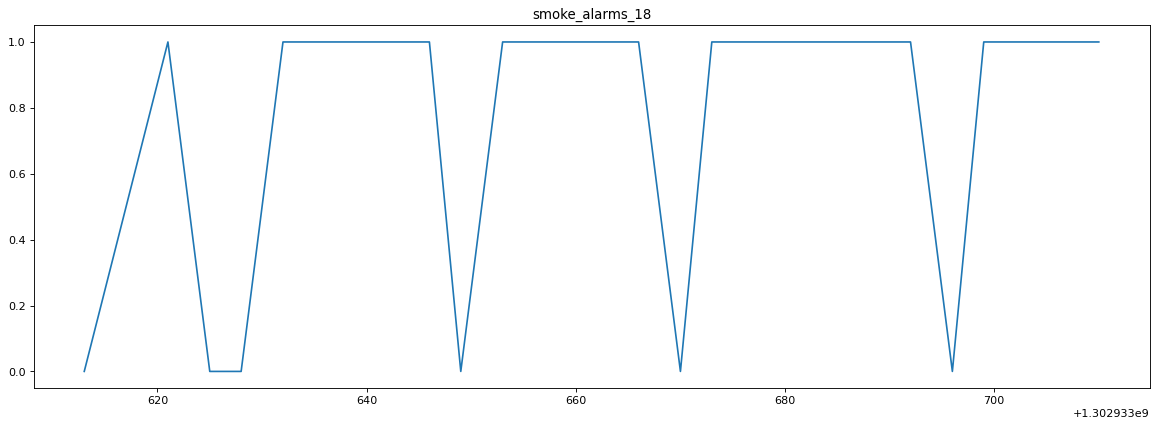

In [473]:
huellas_chanel_18 = DataFrame(huellas_H3L18,columns=['on', 'off', 'UTC_Unix_1','UTC_Unix_2'])
huellas_chanel_18.to_csv(raiz + "\\house_3\\huellas_chanel_18.csv", index=True,sep=r' ',header= True, encoding='utf-8' )
graficar_huella(dispositivo_H3L18, huellas_H3L18, 6)

smoke_alarms_18


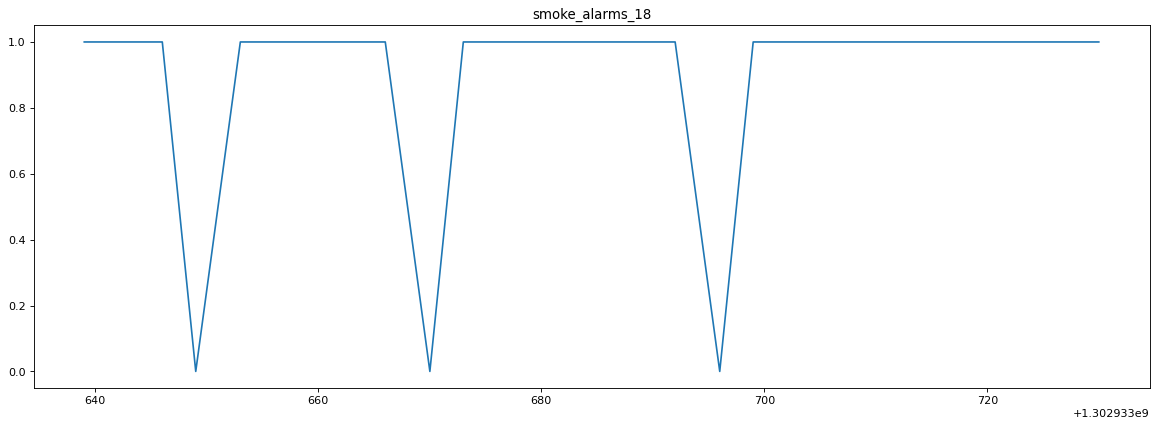

In [486]:
graficar_huella(dispositivo_H3L18, huellas_H3L18, 7)

In [474]:
huellas_H3L19 = huellas(dispositivo_H3L19, labels_casa_3[19], 0, 0)
print(f'huellas_H3L19: {len(huellas_H3L19)}')

huellas_H3L19: 20569


lighting_19


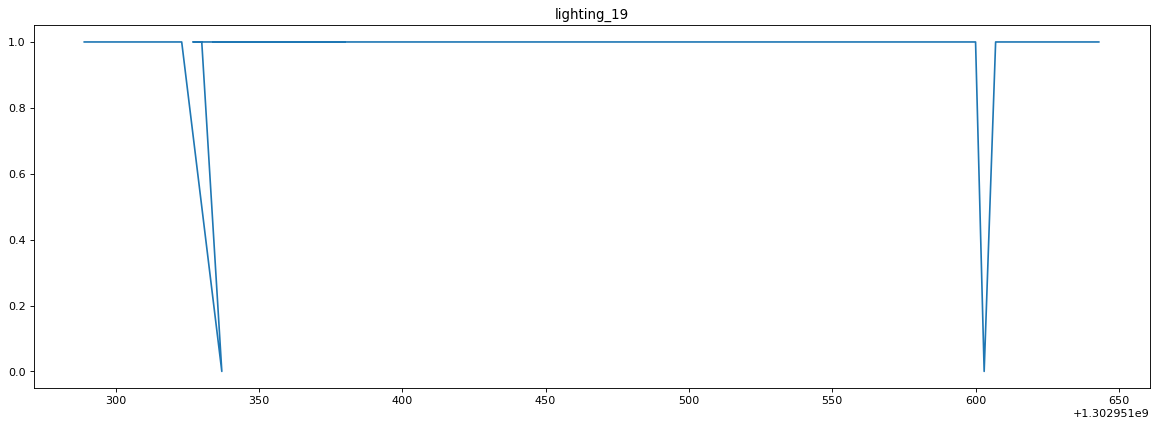

In [475]:
huellas_chanel_19 = DataFrame(huellas_H3L19,columns=['on', 'off', 'UTC_Unix_1','UTC_Unix_2'])
huellas_chanel_19.to_csv(raiz + "\\house_3\\huellas_chanel_19.csv", index=True,sep=r' ',header= True, encoding='utf-8' )
graficar_huella(dispositivo_H3L19, huellas_H3L19, 6)

In [476]:
huellas_H3L20 = huellas(dispositivo_H3L20, labels_casa_3[20], 0, 0)
print(f'huellas_H3L20: {len(huellas_H3L20)}')

huellas_H3L20: 278


bathroom_gfi_20


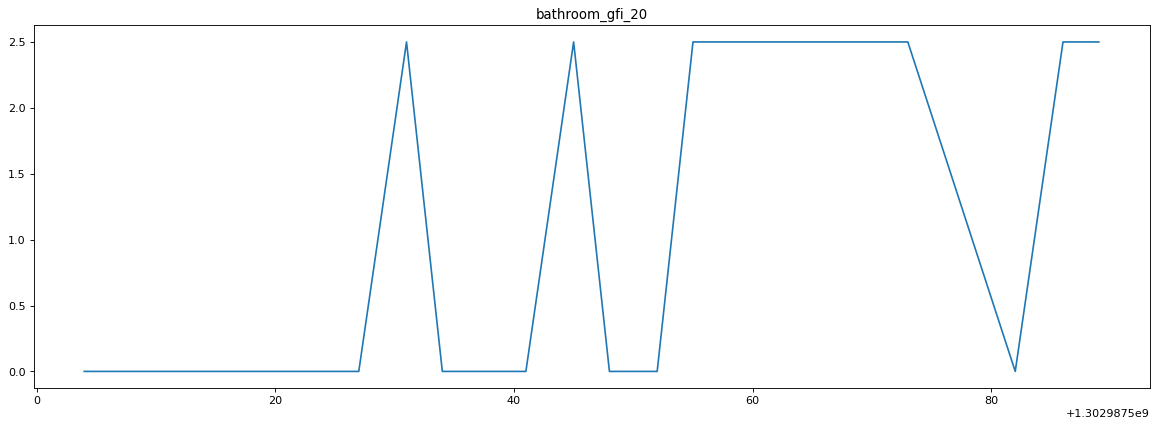

In [477]:
huellas_chanel_20 = DataFrame(huellas_H3L20,columns=['on', 'off', 'UTC_Unix_1','UTC_Unix_2'])
huellas_chanel_20.to_csv(raiz + "\\house_3\\huellas_chanel_20.csv", index=True,sep=r' ',header= True, encoding='utf-8' )
graficar_huella(dispositivo_H3L20, huellas_H3L20, 6)

In [478]:
huellas_H3L21 = huellas(dispositivo_H3L21, labels_casa_3[21], 0, 0)
print(f'huellas_H3L21: {len(huellas_H3L21)}')

huellas_H3L21: 2369


kitchen_outlets_21


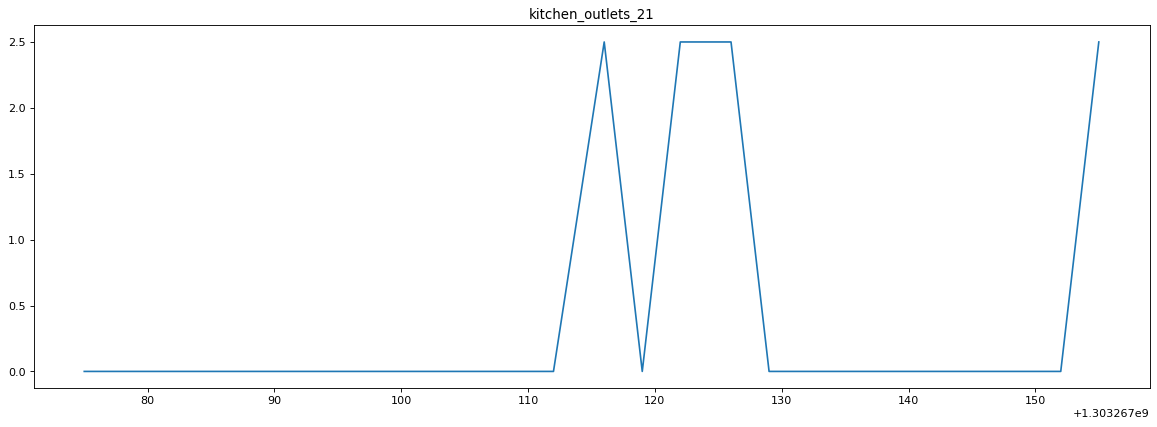

In [479]:
huellas_chanel_21 = DataFrame(huellas_H3L21,columns=['on', 'off', 'UTC_Unix_1','UTC_Unix_2'])
huellas_chanel_21.to_csv(raiz + "\\house_3\\huellas_chanel_21.csv", index=True,sep=r' ',header= True, encoding='utf-8' )
graficar_huella(dispositivo_H3L21, huellas_H3L21, 6)

In [480]:
huellas_H3L22 = huellas(dispositivo_H3L22, labels_casa_3[22], 0, 0)
print(f'huellas_H3L22: {len(huellas_H3L22)}')

huellas_H3L22: 3373


kitchen_outlets_22


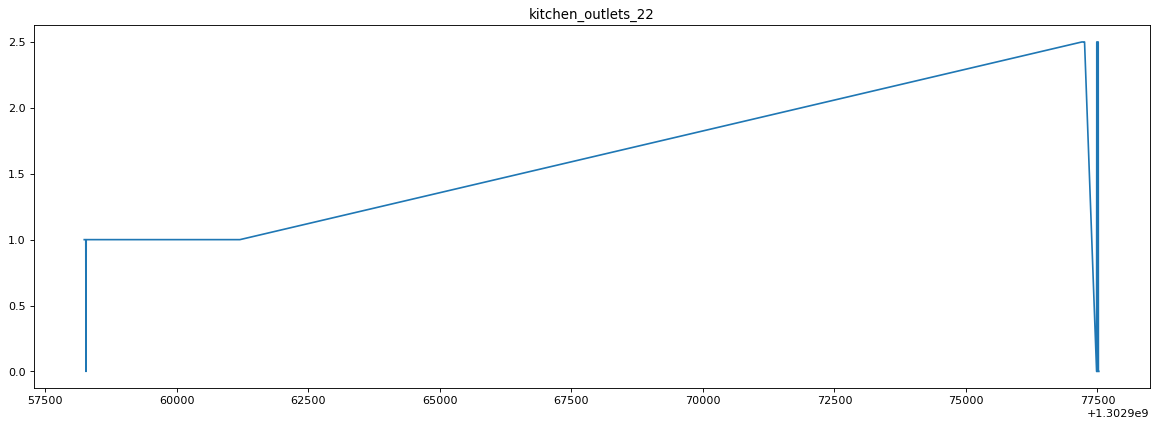

In [481]:
huellas_chanel_22 = DataFrame(huellas_H3L22,columns=['on', 'off', 'UTC_Unix_1','UTC_Unix_2'])
huellas_chanel_22.to_csv(raiz + "\\house_3\\huellas_chanel_22.csv", index=True,sep=r' ',header= True, encoding='utf-8' )
graficar_huella(dispositivo_H3L22, huellas_H3L22, 6)

kitchen_outlets_22


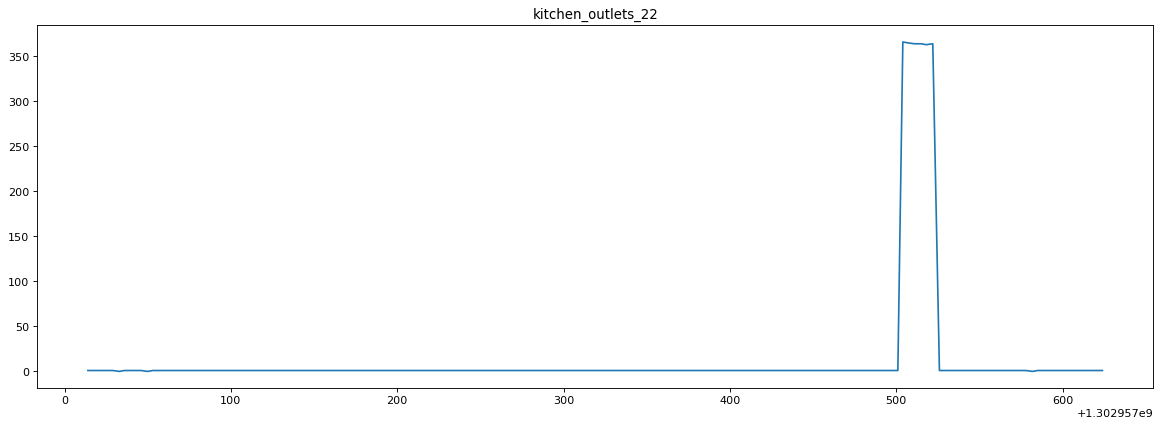

In [485]:
graficar_huella(dispositivo_H3L22, huellas_H3L22, 4)